<a href="https://colab.research.google.com/github/YINZihua/YINZihua-Image_mining_deep_learning_LAB/blob/main/Copie_de_PyTorch_cifar10_tutorial_ROB313_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning for Image Classification

Welcome to deep learning for image classification tutorial!
**In this notebook, you will**:
- Learn the basics of PyTorch, a powerful but easy to use package for scientific computing (and deep learning)
- Learn how to build and train a convolutional neural network for image classification.

If you have never used jupyter notebooks, nor Colab notebooks, [here](https://colab.research.google.com/notebooks/welcome.ipynb) is a short intro.


## I. PyTorch Tutorial

We will briefly go through the basics of the PyTorch package, playing with toy examples.

If you know already how to use PyTorch, then you can directly go to the second part of this tutorial

## II. Training a classifier

In this part, we will train a Convolutional Neural Network to classify images of 10 different classes (dogs, cats, car, ...) and see how our model performs on the test set.  


## III. Exploring CNN Architectures

This is the part where you get your hands dirty ;). Your mission is to experiment different CNN architectures and set hyperparameters in order to obtain the best accuracy on the test set!


The following command sets the backend of matplotlib to the 'inline' backend so that the output of plotting commands is displayed inline within frontends like the Jupyter notebook, directly below the code cell that produced it:

In [ ]:
%matplotlib inline

### Plotting functions and useful imports

You can skip this part

In [ ]:
# Python 2/3 compatibility
from __future__ import print_function, division

import itertools
import time


import numpy as np
import matplotlib.pyplot as plt

# Colors from Colorbrewer Paired_12
colors = [[31, 120, 180], [51, 160, 44]]
colors = [(r / 255, g / 255, b / 255) for (r, g, b) in colors]

# functions to show an image
def imshow(img):
    """
    :param img: (PyTorch Tensor)
    """
    # unnormalize
    img = img / 2 + 0.5     
    # Convert tensor to numpy array
    npimg = img.numpy()
    # Color channel first -> color channel last
    plt.imshow(np.transpose(npimg, (1, 2, 0)))



def plot_losses(train_history, val_history):
    x = np.arange(1, len(train_history) + 1)

    plt.figure(figsize=(8, 6))
    plt.plot(x, train_history, color=colors[0], label="Training loss", linewidth=2)
    plt.plot(x, val_history, color=colors[1], label="Validation loss", linewidth=2)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')
    plt.title("Evolution of the training and validation loss")
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function p
    rints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    :param cm: (numpy matrix) confusion matrix
    :param classes: [str]
    :param normalize: (bool)
    :param title: (str)
    :param cmap: (matplotlib color map)
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(8, 8))   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# I. What is PyTorch ?

It’s a Python based scientific computing package targeted at two sets of audiences:

- A replacement for numpy to use the power of GPUs
- A deep learning research platform that provides maximum flexibility and speed


## PyTorch Basics

In the next steps, we will briefly see how to use PyTorch and exploit its power:

1. PyTorch Installation
2. PyTorch Tensors
3. Numpy Bridge
4. Automatic differentiation
5. PyTorch and GPU (CUDA support)


### 1. Install PyTorch and Torchvision



In [ ]:
import numpy as np
# Import torch and create the alias "th"
# instead of writing torch.name_of_a_method() , we only need to write th.name_of_a_method()
# (similarly to numpy imported as np)
import torch as th

In [ ]:
# Create tensor of ones (FloatTensor by default)
ones = th.ones(3, 2)
print(ones)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]])


### 2. PyTorch Tensors

A `torch.Tensor` is a multi-dimensional matrix containing elements of a single data type.

Tensors are similar to numpy’s ndarrays, but they have a super-power: Tensors can also be used on a GPU to accelerate computing.

#### Tensor Shape
To know the shape of a given tensor, you can use the `.size()` method (the numpy equivalent is `.shape`)

In [ ]:
# Display the shape of a tensor
# it can be used as a tuple
print("Tensor Shape: {}".format(ones.size()))

Tensor Shape: torch.Size([3, 2])


#### Reshape tensors

To reshape tensors (e.g. flatten a 3D tensor to a 1D array), you can use the `.view()` method:

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

[WARNING] when precising a new shape, you have to make sure that the number of elements is constant.
For example, a 2D matrix of size 3x3 can only be viewed as a 1D array of size $3 \cdot 3 = 9$

In [ ]:
# Create a 3D tensor of size 3x2x2
zeros_3d_tensor = th.zeros(3, 2, 2)
print("Original size:", zeros_3d_tensor.size())

# Reshape it to a 1D array of size 3*2*2 = 12
zeros_1d_array = zeros_3d_tensor.view(3 * 2 * 2)
print("Reshaped tensor:", zeros_1d_array.size())


# Let's view our original tensor as a 2D matrix
# If you want PyTorch to guess one remaining dimension,
# you specify '-1' instead of the actual size
zeros_2d_matrix = zeros_3d_tensor.view(-1, 2 * 2)

print("Matrix shape:", zeros_2d_matrix.size())

Original size: torch.Size([3, 2, 2])
Reshaped tensor: torch.Size([12])
Matrix shape: torch.Size([3, 4])


#### Basic Operations on tensors

Tensor support all basic linear algebra operations. You can read the full documentation [here](http://pytorch.org/docs/master/tensors.html)

In [ ]:
2 * ones + 1

tensor([[3., 3.],
        [3., 3.],
        [3., 3.]])

PyTorch tensors also supports numpy indexing:

In [ ]:
print("\n Indexing Demo:")
print(ones[:, 1])


 Indexing Demo:
tensor([1., 1., 1.])


### 3. Numpy Bridge
WARNING: PyTorch Tensors are different from numpy arrays
even if they have a lot in common

Though, it is **easy with PyTorch to tranform Tensors to Numpy arrays and vice versa**

#### Numpy <-> PyTorch

Creating PyTorch tensors from numpy array is done via the `torch.from_numpy()` function  
(here `th.from_numpy()` because we renamed *torch* as *th*)

To transform a PyTorch tensor to a numpy array, you can simply call `.numpy()` method.

In [ ]:
# np.float32 -> th.FloatTensor
ones_matrix = np.ones((2, 2), dtype=np.float32)

# the matrix is passed by reference:
# if we modify the original numpy array, the tensor is also edited
ones_tensor = th.from_numpy(ones_matrix)
# Convert back to a numpy matrix
numpy_matrix = ones_tensor.numpy()

print("PyTorch Tensor:")
print(ones_tensor)

print("Numpy Matrix:")
print(numpy_matrix)

PyTorch Tensor:
tensor([[1., 1.],
        [1., 1.]])
Numpy Matrix:
[[1. 1.]
 [1. 1.]]


### 4. Automatic Differentiation

Pytorch tensors allow to **automatically compute gradients**. That is particulary useful for backpropagation.

Once you finish your computation you can call `.backward()` and have all the gradients computed automatically.

You can access the gradient w.r.t. this variable using `.grad`.


In [ ]:
# We need to specify that we want to compute the gradient
# as it requires extra memory and computation
ones_tensor = th.ones(2,2, requires_grad=True)

print(ones_tensor)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


To demonstrate the use of PyTorch Variable,
let's define a simple linear transformation of a variable $x$ :

$$y = a \cdot x + b$$

PyTorch will allows us to automatically compute $$\frac{dy}{dx} $$

In [ ]:
# Create a tensor and tell PyTorch
# that we want to compute the gradient
x = th.ones(1, requires_grad=True)

# Transformation constants
a = 2
b = 5

# Define the tranformation and store the result
# in a new variable
y = a * x + b

print(y)

tensor([7.], grad_fn=<AddBackward0>)


Let's backprop!

In [ ]:
y.backward()

`x.grad` prints the gradient:

$$\frac{dy}{dx} = a$$

because:

$$y = a \cdot x + b$$

In [ ]:
x.grad

tensor([2.])

You can now change the values of $a$ and $b$ see their effects on the gradient
(HINT: `x.grad` only depends on the value of `a`)

### 5. PyTorch and GPU (CUDA support)

Google colab provides a CUDA enabled GPU, so we are going to use its power. 
You can move tensor to the GPU by simply using the `to()` method.
Otherwise, PyTorch will use the CPU.

Here, we will demonstrate the usefulness of the GPU on a simple matrix multiplication:

In [ ]:
import time

if th.cuda.is_available():
  # Create tensors
  x = th.ones(1000, 1000)
  y = 2 * x + 3
  # Do the calculation on cpu (default)
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_cpu = time.time() - start_time
  
  # Do the same calculation but on the gpu
  # First move tensors to gpu
  x = x.to("cuda")
  y = y.to("cuda")
  start_time = time.time()
  # Matrix multiplication (for benchmark purpose)
  results = th.mm(x, y)
  time_gpu = time.time() - start_time
  
  print("Time on CPU: {:.5f}s \t Time on GPU: {:.5f}s".format(time_cpu, time_gpu))
  print("Speed up: Computation was {:.0f}X faster on GPU!".format(time_cpu / time_gpu))
  
else:
  print("You need to enable GPU accelaration in colab (runtime->change runtime type)")

Time on CPU: 0.06499s 	 Time on GPU: 0.00503s
Speed up: Computation was 13X faster on GPU!


As expected, matrix multiplication is way faster on a GPU, so we'd better use it.


# II. Training a classifier


For this tutorial, we will use the CIFAR10 dataset.
There are 10 classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.


![CIFAR10](http://pytorch.org/tutorials/_images/cifar10.png)


Training an image classifier
----------------------------

We will do the following steps in order:

1. Load and normalize the CIFAR10 training and test datasets using
   ``torchvision``
2. Define a Convolution Neural Network
3. Define a loss function
4. Train the network on the training data
5. Test the network on the test data

### 1. Loading and normalizing CIFAR10 Dataset

Using ``torchvision``, it’s extremely easy to load CIFAR10.

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

Seed the random generator to have reproducible results:

In [ ]:
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

if th.cuda.is_available():
  # Make CuDNN Determinist
  th.backends.cudnn.deterministic = True
  th.cuda.manual_seed(seed)

# Define default device, we should use the GPU (cuda) if available
device = th.device("cuda" if th.cuda.is_available() else "cpu")


### Define subset of the dataset (so it is faster to train)

In [ ]:
from torch.utils.data.sampler import SubsetRandomSampler

n_training_samples = 40000 # Max: 50 000 - n_val_samples
n_val_samples = 10000


train_sampler = SubsetRandomSampler(np.arange(n_training_samples, dtype=np.int64))
val_sampler = SubsetRandomSampler(np.arange(n_training_samples, n_training_samples + n_val_samples, dtype=np.int64))
#test_sampler = SubsetRandomSampler(np.arange(n_test_samples, dtype=np.int64))  # we can use it to test on a subset
# (In the last case, indexes do not need to account for training ones because the train=False parameter in datasets.CIFAR will select from the test set)

The output of torchvision datasets are PILImage images of range [0, 1].
We transform them to Tensors of normalized range [-1, 1]



In [ ]:
num_workers = 5
test_batch_size = 4

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))])

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=test_batch_size, sampler=train_sampler,
                                          num_workers=num_workers)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=test_batch_size,
                                         num_workers=num_workers)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Let us show some of the training images, for fun.



In [ ]:
import matplotlib.pyplot as plt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


     horse        cat        cat      horse


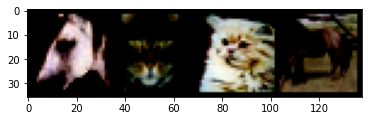

In [ ]:
# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
plt.imshow(torchvision.utils.make_grid(images).permute(1, 2, 0))
# print labels
print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

### 2. Define a Convolution Neural Network


In [ ]:
# Useful imports
import torch.nn as nn
import torch.nn.functional as F

####  Forward propagation

In PyTorch, there are built-in functions that carry out the convolution steps for you.

- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the elementwise ReLU of Z1 (which can be any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

#### Simple Convolutional Neural Network

ConvNet with one convolution layer followed by a max pooling operation,
one fully connected layer and an output layer

In [ ]:
class SimpleConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(SimpleConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        
        # cf comments in forward() to have step by step comments
        # on the shape (how we pass from a 3x32x32 input image to a 18x16x16 volume)
        self.fc1 = nn.Linear(18 * 16 * 16, 64) 
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        # 18x16x16 -> 4608
        x = x.view(-1, 18 * 16 * 16)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        # The softmax non-linearity is applied later (cf createLossAndOptimizer() fn)
        x = self.fc2(x)
        return x

#### Linear Classifier

In [ ]:
class LinearClassifier(nn.Module):
    """
    Linear Classifier
    """
    def __init__(self):
        super(LinearClassifier, self).__init__()
        self.linear = nn.Linear(32 * 32 * 3, 10)

    def forward(self, x):
        # Flatten input 3x32x32 -> 3072
        x = x.view(x.size(0), -1)
        return self.linear(x)

### 3. Define a loss function and optimizer

Let's use a Classification Cross-Entropy loss and ADAM (optionally, SGD with momentum). You can read more about  [optimization methods](https://pytorch.org/docs/stable/optim.html).



In [ ]:
import torch.optim as optim

def createLossAndOptimizer(net, learning_rate=0.001):
    # it combines softmax with negative log likelihood loss
    criterion = nn.CrossEntropyLoss()  
    #optimizer = optim.SGD(net.parameters(), lr=learning_rate, momentum=0.9)
    optimizer = optim.Adam(net.parameters(), lr=learning_rate)
    return criterion, optimizer

### 4. Train the network


This is when things start to get interesting.
We simply have to loop over our data iterator, feed the inputs to the network, and optimize



#### Data loader

In [ ]:
def get_train_loader(batch_size):
    return torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=train_sampler,
                                              num_workers=num_workers)

# Use larger batch size for validation to speed up computation
val_loader = torch.utils.data.DataLoader(train_set, batch_size=128, sampler=val_sampler,
                                          num_workers=num_workers)

#### Training loop
The training script: it takes ~10s per epoch with batch_size = 32

In [ ]:
def train(net, batch_size, n_epochs, learning_rate):
    """
    Train a neural network and print statistics of the training
    
    :param net: (PyTorch Neural Network)
    :param batch_size: (int)
    :param n_epochs: (int)  Number of iterations on the training set
    :param learning_rate: (float) learning rate used by the optimizer
    """
    print("===== HYPERPARAMETERS =====")
    print("batch_size=", batch_size)
    print("n_epochs=", n_epochs)
    print("learning_rate=", learning_rate)
    print("=" * 30)
    
    train_loader = get_train_loader(batch_size)
    n_minibatches = len(train_loader)

    criterion, optimizer = createLossAndOptimizer(net, learning_rate)
    # Init variables used for plotting the loss
    train_history = []
    val_history = []

    training_start_time = time.time()
    best_error = np.inf
    best_model_path = "best_model.pth"
    
    # Move model to gpu if possible
    net = net.to(device)

    for epoch in range(n_epochs):  # loop over the dataset multiple times

        running_loss = 0.0
        print_every = n_minibatches // 10
        start_time = time.time()
        total_train_loss = 0
        
        for i, (inputs, labels) in enumerate(train_loader):

            # Move tensors to correct device
            inputs, labels = inputs.to(device), labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            # print statistics
            running_loss += loss.item()
            total_train_loss += loss.item()

            # print every 10th of epoch
            if (i + 1) % (print_every + 1) == 0:    
                print("Epoch {}, {:d}% \t train_loss: {:.2f} took: {:.2f}s".format(
                      epoch + 1, int(100 * (i + 1) / n_minibatches), running_loss / print_every,
                      time.time() - start_time))
                running_loss = 0.0
                start_time = time.time()

        train_history.append(total_train_loss / len(train_loader))

        total_val_loss = 0
        # Do a pass on the validation set
        # We don't need to compute gradient,
        # we save memory and computation using th.no_grad()
        with th.no_grad():
          for inputs, labels in val_loader:
              # Move tensors to correct device
              inputs, labels = inputs.to(device), labels.to(device)
              # Forward pass
              predictions = net(inputs)
              val_loss = criterion(predictions, labels)
              total_val_loss += val_loss.item()
            
        val_history.append(total_val_loss / len(val_loader))
        # Save model that performs best on validation set
        if total_val_loss < best_error:
            best_error = total_val_loss
            th.save(net.state_dict(), best_model_path)

        print("Validation loss = {:.2f}".format(total_val_loss / len(val_loader)))

    print("Training Finished, took {:.2f}s".format(time.time() - training_start_time))
    
    # Load best model
    net.load_state_dict(th.load(best_model_path))
    
    return train_history, val_history

In [ ]:
net = SimpleConvolutionalNetwork()

train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.96 took: 1.29s
Epoch 1, 20% 	 train_loss: 1.64 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.52 took: 1.01s
Epoch 1, 40% 	 train_loss: 1.44 took: 1.04s
Epoch 1, 50% 	 train_loss: 1.40 took: 1.05s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.35 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.28 took: 1.15s
Epoch 1, 90% 	 train_loss: 1.30 took: 1.18s
Validation loss = 1.23
Epoch 2, 10% 	 train_loss: 1.19 took: 1.23s
Epoch 2, 20% 	 train_loss: 1.21 took: 1.00s
Epoch 2, 30% 	 train_loss: 1.21 took: 1.00s
Epoch 2, 40% 	 train_loss: 1.18 took: 1.01s
Epoch 2, 50% 	 train_loss: 1.14 took: 0.99s
Epoch 2, 60% 	 train_loss: 1.18 took: 1.00s
Epoch 2, 70% 	 train_loss: 1.14 took: 1.05s
Epoch 2, 80% 	 train_loss: 1.14 took: 1.06s
Epoch 2, 90% 	 train_loss: 1.17 took: 1.10s
Validation loss = 1.21
Epoch 3, 10% 	 train_loss: 1.04 took: 1.34s
Epoch 3, 20% 	 train_loss: 1.05 took: 1.1

Now, let's look at the evolution of the losses

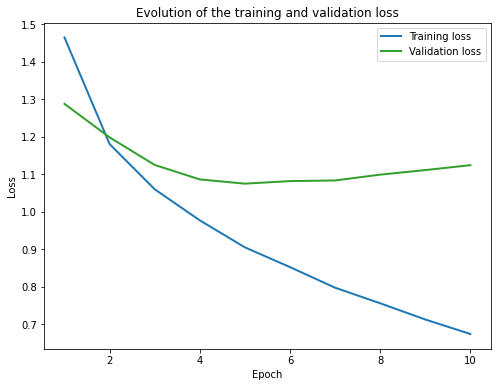

In [ ]:
plot_losses(train_history, val_history)

### 5. Test the network on the test data


We have trained the network for 2 passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



Ground truth:

       cat       ship       ship      plane


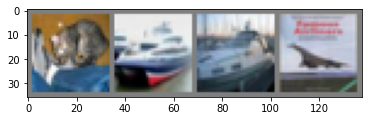

In [ ]:
try:
  images, labels = next(iter(test_loader))
except EOFError:
  pass

# print images
imshow(torchvision.utils.make_grid(images))
print("Ground truth:\n")

print(' '.join('{:>10}'.format(classes[labels[j]]) for j in range(test_batch_size)))

Okay, now let us see what the neural network thinks these examples above are:



In [ ]:
outputs = net(images.to(device))
print(outputs.size())

torch.Size([4, 10])


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is from that particular class.
So, let's get the index of the highest energy:



Predicted:

       cat       ship      plane      plane


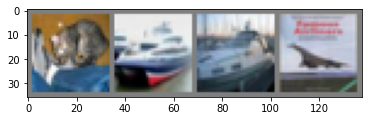

In [ ]:
_, predicted = torch.max(outputs, 1)

print("Predicted:\n")
imshow(torchvision.utils.make_grid(images))

print(' '.join('{:>10}'.format(classes[predicted[j]]) for j in range(test_batch_size)))

The results seem pretty good.

Let us look at how the network performs on the whole test set.



In [ ]:
def dataset_accuracy(net, data_loader, name=""):
    net = net.to(device)
    correct = 0
    total = 0
    for images, labels in data_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy = 100 * float(correct) / total
    print('Accuracy of the network on the {} {} images: {:.2f} %'.format(total, name, accuracy))

def train_set_accuracy(net):
    dataset_accuracy(net, train_loader, "train")

def val_set_accuracy(net):
    dataset_accuracy(net, val_loader, "validation")  
    
def test_set_accuracy(net):
    dataset_accuracy(net, test_loader, "test")

def compute_accuracy(net):
    train_set_accuracy(net)
    val_set_accuracy(net)
    test_set_accuracy(net)
    
print("Computing accuracy...")
compute_accuracy(net)

That initial 63.78 % on the test set of images looks waaay better than chance, which is 10% accuracy (randomly picking
a class out of 10 classes).
Seems like the network learnt something.
As a baseline, a linear model achieves around 30% accuracy.

What are the classes that performed well, and the classes that did not perform well?



In [ ]:
def accuracy_per_class(net):
    net = net.to(device)
    n_classes = 10
    # (real, predicted)
    confusion_matrix = np.zeros((n_classes, n_classes), dtype=np.int64)

    for images, labels in test_loader:
        images, labels = images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        for i in range(test_batch_size):
            confusion_matrix[labels[i], predicted[i]] += 1
            label = labels[i]

    print("{:<10} {:^10}".format("Class", "Accuracy (%)"))
    for i in range(n_classes):
        class_total = confusion_matrix[i, :].sum()
        class_correct = confusion_matrix[i, i]
        percentage_correct = 100.0 * float(class_correct) / class_total
        
        print('{:<10} {:^10.2f}'.format(classes[i], percentage_correct))
    return confusion_matrix

confusion_matrix = accuracy_per_class(net)

### Confusion Matrix

Let's look at what type of error our networks makes... 
It seems that our network is pretty good at classifying ships,
but has some difficulties to differentiate cats and dogs.
Also, it classifies a lot of trucks as cars.

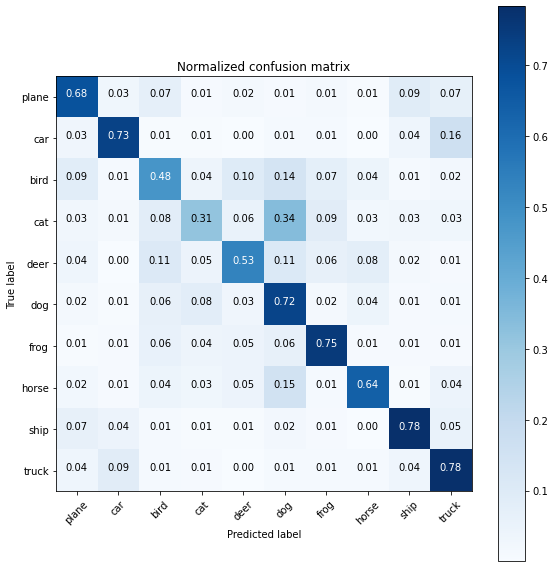

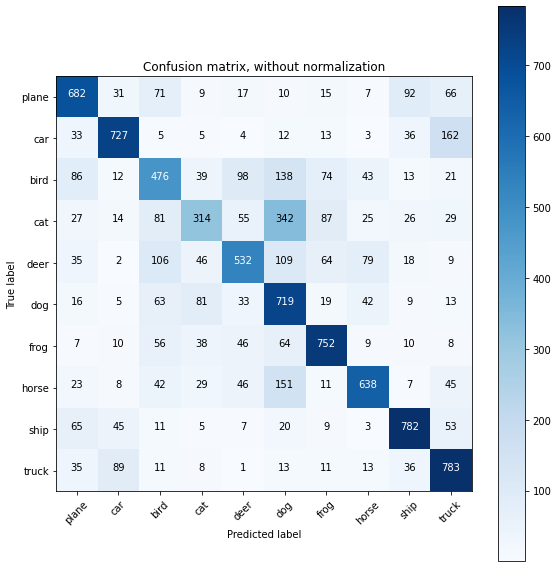

In [ ]:
# Plot normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

# Plot non-normalized confusion matrix
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

# III. Exploring CNN Architectures

Now, it is your turn to build a Convolutional Neural Network. The goal of this section is to explore different CNN architectures and set hyperparameters in order to obtain the best accuracy on the **test** set!

The network that you have to tweak is called **MyConvolutionalNetwork**.

You can start changing the batch_size, number of epochs and then try adding more convolutional layers.

### PyTorch functions to build the network
- **nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0):** Convolution layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#conv2d)

- **nn.MaxPool2d(kernel_size, stride=None, padding=0):** Max pooling layer. You can read the full documentation [here](http://pytorch.org/docs/master/nn.html#maxpool2d)

- **F.relu(Z1):** computes the element-wise ReLU of Z1 (which can be of any shape). You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#torch.nn.ReLU)

- **x.view(new_shape)**: Returns a new tensor with the same data but different size. It is the equivalent of numpy function *reshape* (Gives a new shape to an array without changing its data.). You can read the full documentation [here.](http://pytorch.org/docs/master/tensors.html#torch.Tensor.view)

- **nn.Linear(in_features, out_features):** Applies a linear transformation to the incoming data: $y = Ax + b$, it is also called a fully connected (fc) layer. You can read the full documentation [here.](http://pytorch.org/docs/master/nn.html#linear-layers)

**Convolution Formulas**:

The formulas relating the output shape $(C_2, H_2, W_2)$ of the convolution to the input shape $(C_1, H_1, W_1)$ are:


$$ H_2 = \lfloor \frac{H_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ W_2 = \lfloor \frac{W_1 - kernel\_size + 2 \times padding}{stride} \rfloor +1 $$

$$ C_2 = \text{number of filters used in the convolution}$$

NOTE: $C_2 = C_1$ in the case of max pooling

where:
- $H_2$: height of the output volume  
- $W_2$: width of the output volume  
- $C_1$: in_channels, number of channels in the input volume
- $C_2$: out_channels

In [ ]:
def get_output_size(in_size, kernel_size, stride=1, padding=0):
    """
    Get the output size given all the parameters of the convolution
    :param in_size: (int) input size
    :param kernel_size: (int)
    :param stride: (int)
    :param paddind: (int)
    :return: (int)
    """
    return int((in_size - kernel_size + 2 * padding) / stride) + 1

#### Example of use of helper method get_output_size() 

Let's assume you have an *input volume of size 3x32x32* (where 3 is the number of channels)
and you use a 2D convolution with the following parameters:

```python
conv1 = nn.Conv2d(3, 18, kernel_size=7, stride=2, padding=1)
```
then, the size of the output volume is 18x?x? (because we have 18 filters) where ? is given by the convolution formulas (see above).

**get_output_size()** function allows to compute that size:

```
out_size = get_output_size(in_size=32, kernel_size=7, stride=2, padding=1)
print(out_size) # prints 14
```

That is to say, *the output volume is 18x14x14*

In [ ]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


Below is the neural network you have to edit:

In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        # self.conv2 = ...
        
        # Size of the output of the last convolution:
        self.flattened_size = 18 * 16 * 16
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # x = ...
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

In [ ]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.90 took: 1.32s
Epoch 1, 20% 	 train_loss: 1.61 took: 1.02s
Epoch 1, 30% 	 train_loss: 1.50 took: 1.09s
Epoch 1, 40% 	 train_loss: 1.41 took: 1.02s
Epoch 1, 50% 	 train_loss: 1.37 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.33 took: 1.12s
Epoch 1, 70% 	 train_loss: 1.33 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.31 took: 1.07s
Epoch 1, 90% 	 train_loss: 1.27 took: 1.05s
Validation loss = 1.22
Epoch 2, 10% 	 train_loss: 1.19 took: 1.25s
Epoch 2, 20% 	 train_loss: 1.17 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.07s
Epoch 2, 40% 	 train_loss: 1.11 took: 1.12s
Epoch 2, 50% 	 train_loss: 1.11 took: 1.04s
Epoch 2, 60% 	 train_loss: 1.11 took: 1.09s
Epoch 2, 70% 	 train_loss: 1.12 took: 1.05s
Epoch 2, 80% 	 train_loss: 1.11 took: 1.16s
Epoch 2, 90% 	 train_loss: 1.09 took: 1.04s
Validation loss = 1.12
Epoch 3, 10% 	 train_loss: 1.02 took: 1.34s
Epoch 3, 20% 	 train_loss: 1.00 took: 1.0

### Losses Plot

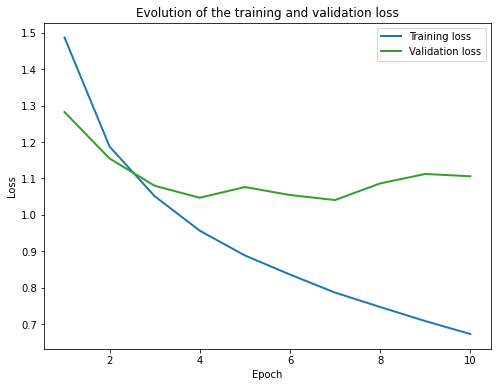

In [ ]:
plot_losses(train_history, val_history)

### Accuracy of the trained model

In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 73.36 %
Accuracy of the network on the 10000 validation images: 64.75 %
Accuracy of the network on the 10000 test images: 64.02 %


**Baseline: Simple Convolutional Neural Network (form part II)**

<table>
<tr>
    <td>Accuracy on the test set:</td>
    <td>59.98 %</td>
</tr>
</table>

In [ ]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        72.00   
car          76.70   
bird         51.20   
cat          31.80   
deer         69.80   
dog          62.70   
frog         74.10   
horse        62.10   
ship         74.40   
truck        73.80   


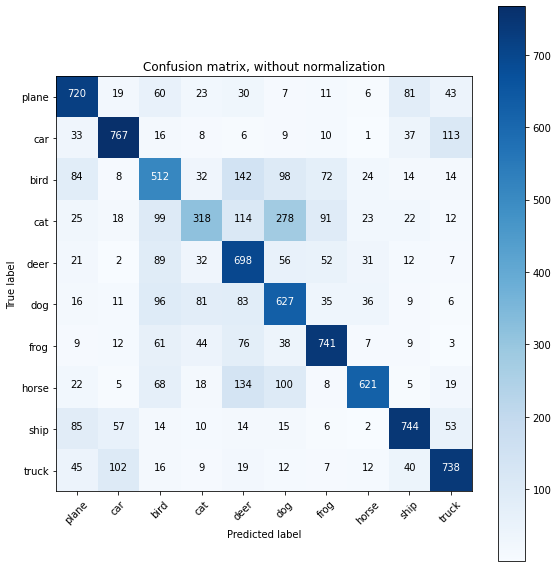

In [ ]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### Going further

- [Coursera Course on CNN](https://www.coursera.org/learn/convolutional-neural-networks)
- [Stanford Course](http://cs231n.stanford.edu/syllabus.html)
- [PyTorch Tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)
- [How backpropagation works](http://michaelnielsen.org/blog/how-the-backpropagation-algorithm-works/) (Michael Nielsen)

If you feel like this was too easy peasy:

-Investigate further [optimization methods](https://pytorch.org/docs/stable/optim.html) beyond SGD, and Adam and their parameters.

-Look at ways to improve your network using regularization techniques

-Look at ways to visualize network activations for model interpretability

-Use transfer learning, in order to use torchvision with pretrained=True with some pretrained models


Acknowledgements: 
This tutorial is based on the [original PyTorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) and was adapted by [Antonin Raffin](http://araffin.github.io/) for the ROB313 course at ENSTA Paris. Thanks to Clement Pinard for feedback!


### More documentation/ questions to explore about Google Colab: 

-How to connect your Google Drive with Google Colab?

-How to import a new notebook and save it to your GDrive?

-How to use files which are contained in your GDrive?

Some tips [here](https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d)




## Extras to read later
### Visualizing Convolution parameters:
[A guide to convolution arithmetic for deep learning](https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md) 
by Vincent Dumoulin, Francesco Visin 


### Documentation of autograd and Function: 
[Autograd](http://pytorch.org/docs/autograd)


#  <font size=10><center>**Student Testing**</center> </font>

## single convolutional layer #1


1st NN properties:
<br> 


1.   kernel size = 3
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)
3.   number of convolutional layers = 1
4.   size of fully connected layers (nn.linear) = flattened_size -> 64 -> 10


Conv1 + Relu + Maxpool2d + view + fc1 + Relu + fc2

In [ ]:
out_size = get_output_size(in_size=32, kernel_size=3, stride=1, padding=1)
print(out_size)

32


In [ ]:
class MyConvolutionalNetwork(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 16 * 16
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x32x32
        x = F.relu(self.conv1(x))
        # 18x32x32 -> 18x16x16
        x = self.pool(x)
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x16x16 -> 4608
        x = x.view(-1, self.flattened_size)
        # 4608 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10
        x = self.fc2(x)
        return x

### settings:   *batch_size=32, n_epochs=10, learning_rate=0.001* 


In [ ]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=10, learning_rate=0.001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.64 took: 1.15s
Epoch 1, 30% 	 train_loss: 1.52 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.45 took: 1.00s
Epoch 1, 50% 	 train_loss: 1.41 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.35 took: 1.07s
Epoch 1, 70% 	 train_loss: 1.35 took: 0.98s
Epoch 1, 80% 	 train_loss: 1.32 took: 0.99s
Epoch 1, 90% 	 train_loss: 1.29 took: 0.99s
Validation loss = 1.25
Epoch 2, 10% 	 train_loss: 1.23 took: 1.21s
Epoch 2, 20% 	 train_loss: 1.20 took: 1.15s
Epoch 2, 30% 	 train_loss: 1.22 took: 1.13s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.08s
Epoch 2, 50% 	 train_loss: 1.15 took: 1.05s
Epoch 2, 60% 	 train_loss: 1.16 took: 0.99s
Epoch 2, 70% 	 train_loss: 1.21 took: 1.07s
Epoch 2, 80% 	 train_loss: 1.14 took: 0.99s
Epoch 2, 90% 	 train_loss: 1.16 took: 1.01s
Validation loss = 1.16
Epoch 3, 10% 	 train_loss: 1.05 took: 1.32s
Epoch 3, 20% 	 train_loss: 1.06 took: 1.0

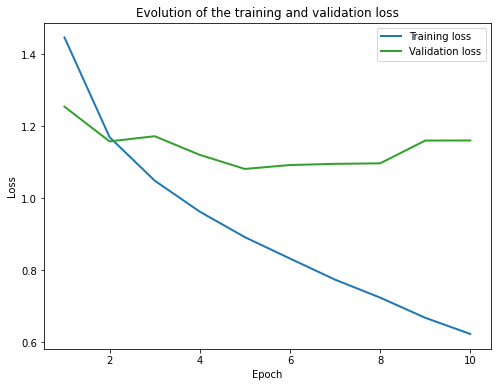

In [ ]:
plot_losses(train_history, val_history)

In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 72.40 %
Accuracy of the network on the 10000 validation images: 62.35 %
Accuracy of the network on the 10000 test images: 61.75 %


In [ ]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        64.60   
car          78.60   
bird         44.60   
cat          53.10   
deer         47.40   
dog          46.80   
frog         68.10   
horse        71.50   
ship         76.50   
truck        66.30   


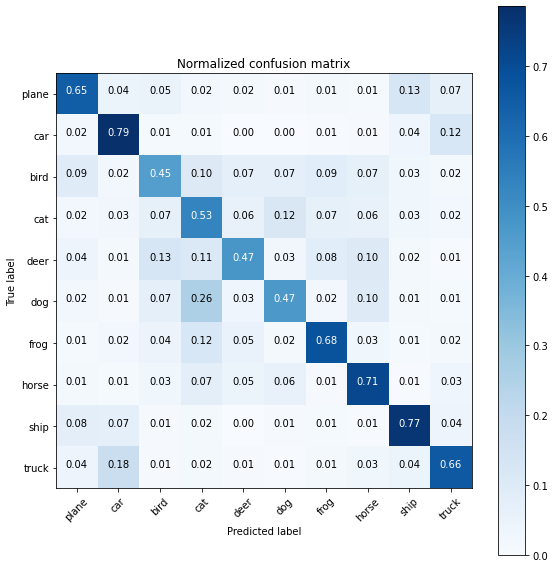

In [ ]:
plot_confusion_matrix(confusion_matrix, classes, normalize=True,
                      title='Normalized confusion matrix')

### settings:   *batch_size=32, n_epochs=20, learning_rate=0.0005* 



In [ ]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=20, learning_rate=0.0005)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.35s
Epoch 1, 20% 	 train_loss: 1.75 took: 1.15s
Epoch 1, 30% 	 train_loss: 1.63 took: 1.11s
Epoch 1, 40% 	 train_loss: 1.53 took: 1.09s
Epoch 1, 50% 	 train_loss: 1.49 took: 1.15s
Epoch 1, 60% 	 train_loss: 1.46 took: 1.12s
Epoch 1, 70% 	 train_loss: 1.40 took: 1.20s
Epoch 1, 80% 	 train_loss: 1.39 took: 1.15s
Epoch 1, 90% 	 train_loss: 1.36 took: 1.12s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.28 took: 1.32s
Epoch 2, 20% 	 train_loss: 1.29 took: 1.19s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.13s
Epoch 2, 40% 	 train_loss: 1.24 took: 1.08s
Epoch 2, 50% 	 train_loss: 1.25 took: 1.10s
Epoch 2, 60% 	 train_loss: 1.22 took: 1.11s
Epoch 2, 70% 	 train_loss: 1.22 took: 1.08s
Epoch 2, 80% 	 train_loss: 1.22 took: 1.13s
Epoch 2, 90% 	 train_loss: 1.23 took: 1.10s
Validation loss = 1.22
Epoch 3, 10% 	 train_loss: 1.13 took: 1.35s
Epoch 3, 20% 	 train_loss: 1.15 took: 1.

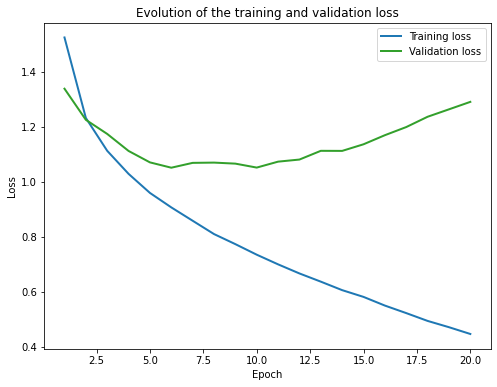

In [ ]:
plot_losses(train_history, val_history)

In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 71.75 %
Accuracy of the network on the 10000 validation images: 63.21 %
Accuracy of the network on the 10000 test images: 63.63 %


In [ ]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        75.30   
car          76.20   
bird         49.50   
cat          34.70   
deer         59.40   
dog          56.20   
frog         71.40   
horse        69.70   
ship         72.10   
truck        71.80   


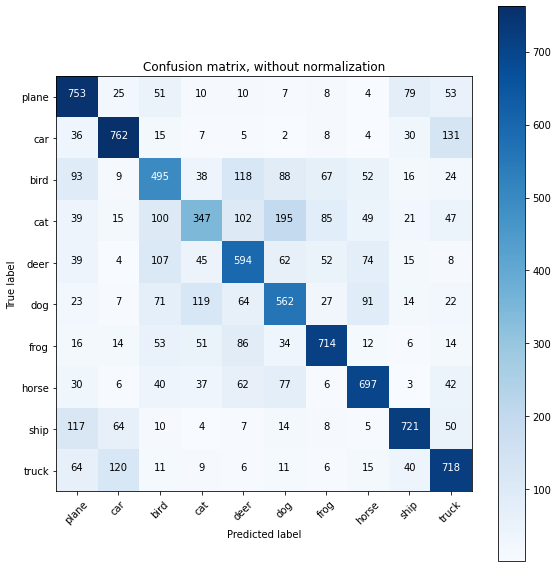

In [ ]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

Here, as descreasing the loss over the train set, the validation loss finally inscreases extremely. This is due to the model's overfitting. While the test score has been better than before.

### settings:   *batch_size=32, n_epochs=20, learning_rate=0.0001* 




In [ ]:
net = MyConvolutionalNetwork()
train_history, val_history = train(net, batch_size=32, n_epochs=20, learning_rate=0.0001)

===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.18 took: 1.55s
Epoch 1, 20% 	 train_loss: 1.96 took: 1.38s
Epoch 1, 30% 	 train_loss: 1.88 took: 1.22s
Epoch 1, 40% 	 train_loss: 1.81 took: 1.06s
Epoch 1, 50% 	 train_loss: 1.77 took: 1.10s
Epoch 1, 60% 	 train_loss: 1.75 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.70 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.68 took: 1.08s
Epoch 1, 90% 	 train_loss: 1.66 took: 1.08s
Validation loss = 1.62
Epoch 2, 10% 	 train_loss: 1.61 took: 1.31s
Epoch 2, 20% 	 train_loss: 1.59 took: 1.08s
Epoch 2, 30% 	 train_loss: 1.57 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.55 took: 1.08s
Epoch 2, 50% 	 train_loss: 1.54 took: 1.16s
Epoch 2, 60% 	 train_loss: 1.51 took: 1.22s
Epoch 2, 70% 	 train_loss: 1.50 took: 1.26s
Epoch 2, 80% 	 train_loss: 1.51 took: 1.23s
Epoch 2, 90% 	 train_loss: 1.48 took: 1.12s
Validation loss = 1.47
Epoch 3, 10% 	 train_loss: 1.46 took: 1.26s
Epoch 3, 20% 	 train_loss: 1.43 took: 1.

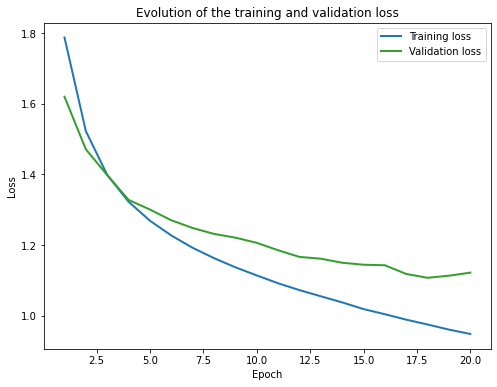

In [ ]:
plot_losses(train_history, val_history)

In [ ]:
compute_accuracy(net)

Accuracy of the network on the 40000 train images: 67.78 %
Accuracy of the network on the 10000 validation images: 60.91 %
Accuracy of the network on the 10000 test images: 61.31 %


In [ ]:
confusion_matrix = accuracy_per_class(net)

Class      Accuracy (%)
plane        63.40   
car          69.10   
bird         49.10   
cat          39.00   
deer         51.20   
dog          52.40   
frog         73.50   
horse        67.20   
ship         78.30   
truck        69.90   


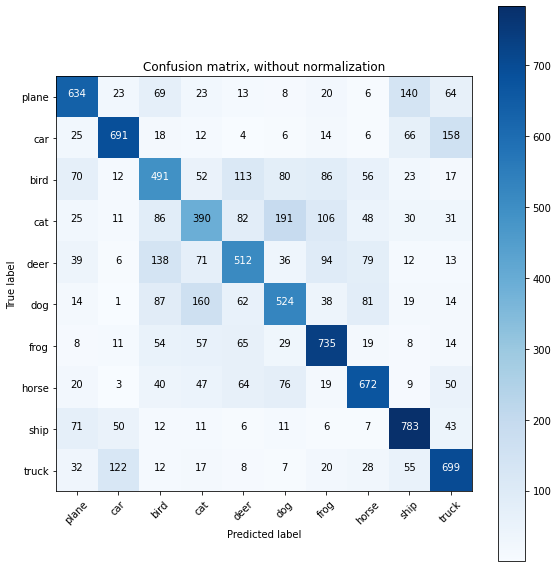

In [ ]:
plot_confusion_matrix(confusion_matrix, classes,
                      title='Confusion matrix, without normalization')

### **We then would like to automate the hyper-parameters testing**
 





############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.91 took: 1.55s
Epoch 1, 20% 	 train_loss: 1.58 took: 1.57s
Epoch 1, 30% 	 train_loss: 1.48 took: 1.41s
Epoch 1, 40% 	 train_loss: 1.44 took: 1.36s
Epoch 1, 50% 	 train_loss: 1.39 took: 1.36s
Epoch 1, 60% 	 train_loss: 1.34 took: 1.36s
Epoch 1, 70% 	 train_loss: 1.29 took: 1.36s
Epoch 1, 80% 	 train_loss: 1.31 took: 1.32s
Epoch 1, 90% 	 train_loss: 1.26 took: 1.32s
Validation loss = 1.21
Epoch 2, 10% 	 train_loss: 1.15 took: 1.52s
Epoch 2, 20% 	 train_loss: 1.16 took: 1.32s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.35s
Epoch 2, 40% 	 train_loss: 1.15 took: 1.36s
Epoch 2, 50% 	 train_loss: 1.16 took: 1.34s
Epoch 2, 60% 	 train_loss: 1.12 took: 1.44s
Epoch 2, 70% 	 train_loss: 1.10 took: 1.41s
Epoch 2, 80% 	 train_loss: 1.10 took: 1.36s
Epoch 2, 90% 	 train_loss: 1.12 took:

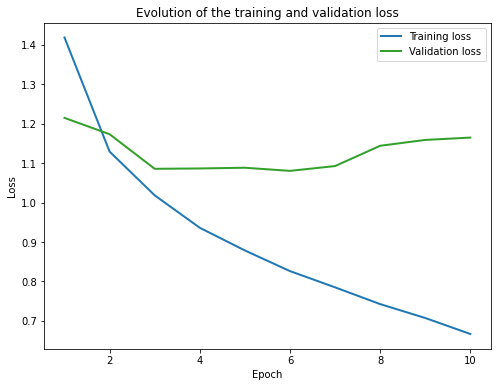

Accuracy of the network on the 40000 train images: 74.33 %
Accuracy of the network on the 10000 validation images: 62.68 %
Accuracy of the network on the 10000 test images: 63.11 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.93 took: 1.64s
Epoch 1, 20% 	 train_loss: 1.64 took: 1.57s
Epoch 1, 30% 	 train_loss: 1.55 took: 1.56s
Epoch 1, 40% 	 train_loss: 1.47 took: 1.72s
Epoch 1, 50% 	 train_loss: 1.42 took: 1.64s
Epoch 1, 60% 	 train_loss: 1.38 took: 1.47s
Epoch 1, 70% 	 train_loss: 1.37 took: 1.48s
Epoch 1, 80% 	 train_loss: 1.32 took: 1.47s
Epoch 1, 90% 	 train_loss: 1.30 took: 1.63s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.25 took: 1.74s
Epoch 2, 20% 	 train_loss: 1.23 took: 1.55s
Epoch 2, 30% 	 train_loss: 1.23 took: 1.43s
Epoch 2, 40% 	 train_loss: 1.23 took: 1.46s
Epoch 2, 50% 	 train_loss: 1.2

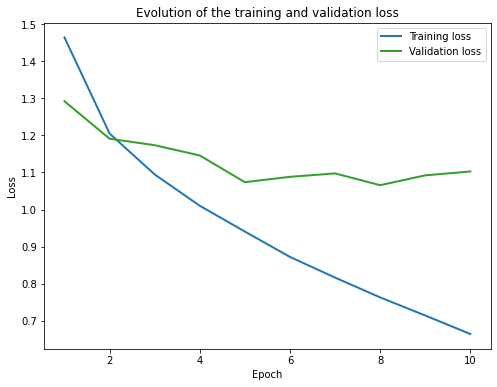

Accuracy of the network on the 40000 train images: 76.99 %
Accuracy of the network on the 10000 validation images: 64.05 %
Accuracy of the network on the 10000 test images: 63.40 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.12 took: 1.78s
Epoch 1, 20% 	 train_loss: 1.92 took: 1.65s
Epoch 1, 30% 	 train_loss: 1.84 took: 1.68s
Epoch 1, 40% 	 train_loss: 1.78 took: 1.50s
Epoch 1, 50% 	 train_loss: 1.76 took: 1.57s
Epoch 1, 60% 	 train_loss: 1.71 took: 1.56s
Epoch 1, 70% 	 train_loss: 1.70 took: 1.46s
Epoch 1, 80% 	 train_loss: 1.66 took: 1.45s
Epoch 1, 90% 	 train_loss: 1.66 took: 1.60s
Validation loss = 1.58
Epoch 2, 10% 	 train_loss: 1.53 took: 1.68s
Epoch 2, 20% 	 train_loss: 1.51 took: 1.50s
Epoch 2, 30% 	 train_loss: 1.52 took: 1.43s
Epoch 2, 40% 	 train_loss: 1.50 took: 1.48s
Epoch 2, 50% 	 train_loss: 1.4

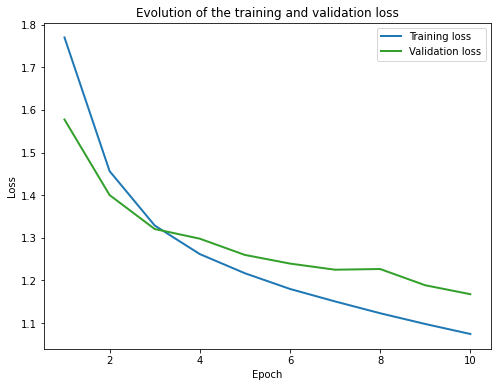

Accuracy of the network on the 40000 train images: 64.10 %
Accuracy of the network on the 10000 validation images: 59.39 %
Accuracy of the network on the 10000 test images: 59.04 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.89 took: 1.74s
Epoch 1, 20% 	 train_loss: 1.62 took: 1.57s
Epoch 1, 30% 	 train_loss: 1.49 took: 1.57s
Epoch 1, 40% 	 train_loss: 1.44 took: 1.53s
Epoch 1, 50% 	 train_loss: 1.37 took: 1.50s
Epoch 1, 60% 	 train_loss: 1.34 took: 1.53s
Epoch 1, 70% 	 train_loss: 1.31 took: 1.49s
Epoch 1, 80% 	 train_loss: 1.32 took: 1.52s
Epoch 1, 90% 	 train_loss: 1.25 took: 1.50s
Validation loss = 1.23
Epoch 2, 10% 	 train_loss: 1.13 took: 1.82s
Epoch 2, 20% 	 train_loss: 1.16 took: 1.64s
Epoch 2, 30% 	 train_loss: 1.13 took: 1.53s
Epoch 2, 40% 	 train_loss: 1.14 took: 1.57s
Epoch 2, 50% 	 train_loss: 1.15 

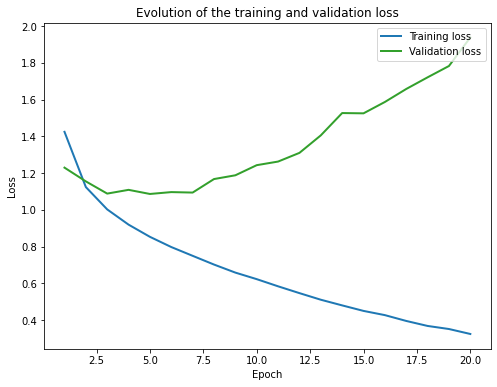

Accuracy of the network on the 40000 train images: 73.34 %
Accuracy of the network on the 10000 validation images: 62.89 %
Accuracy of the network on the 10000 test images: 62.79 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.97 took: 1.75s
Epoch 1, 20% 	 train_loss: 1.72 took: 1.50s
Epoch 1, 30% 	 train_loss: 1.59 took: 1.69s
Epoch 1, 40% 	 train_loss: 1.54 took: 1.64s
Epoch 1, 50% 	 train_loss: 1.50 took: 1.57s
Epoch 1, 60% 	 train_loss: 1.44 took: 1.52s
Epoch 1, 70% 	 train_loss: 1.44 took: 1.52s
Epoch 1, 80% 	 train_loss: 1.38 took: 1.52s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.51s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.28 took: 1.72s
Epoch 2, 20% 	 train_loss: 1.27 took: 1.56s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.77s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.59s
Epoch 2, 50% 	 train_loss: 1.2

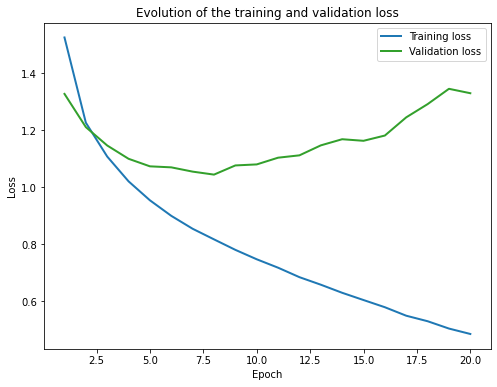

Accuracy of the network on the 40000 train images: 74.41 %
Accuracy of the network on the 10000 validation images: 64.49 %
Accuracy of the network on the 10000 test images: 63.58 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.09 took: 1.77s
Epoch 1, 20% 	 train_loss: 1.90 took: 1.56s
Epoch 1, 30% 	 train_loss: 1.79 took: 1.58s
Epoch 1, 40% 	 train_loss: 1.74 took: 1.69s
Epoch 1, 50% 	 train_loss: 1.69 took: 1.74s
Epoch 1, 60% 	 train_loss: 1.62 took: 1.49s
Epoch 1, 70% 	 train_loss: 1.61 took: 1.67s
Epoch 1, 80% 	 train_loss: 1.57 took: 1.48s
Epoch 1, 90% 	 train_loss: 1.53 took: 1.51s
Validation loss = 1.53
Epoch 2, 10% 	 train_loss: 1.50 took: 1.74s
Epoch 2, 20% 	 train_loss: 1.46 took: 1.53s
Epoch 2, 30% 	 train_loss: 1.48 took: 1.53s
Epoch 2, 40% 	 train_loss: 1.44 took: 1.52s
Epoch 2, 50% 	 train_loss: 1.4

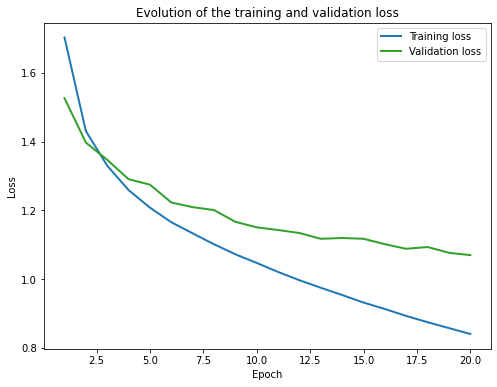

Accuracy of the network on the 40000 train images: 72.94 %
Accuracy of the network on the 10000 validation images: 63.36 %
Accuracy of the network on the 10000 test images: 62.78 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.93 took: 1.83s
Epoch 1, 20% 	 train_loss: 1.68 took: 1.63s
Epoch 1, 30% 	 train_loss: 1.54 took: 1.52s
Epoch 1, 40% 	 train_loss: 1.44 took: 1.56s
Epoch 1, 50% 	 train_loss: 1.44 took: 1.64s
Epoch 1, 60% 	 train_loss: 1.37 took: 1.52s
Epoch 1, 70% 	 train_loss: 1.38 took: 1.56s
Epoch 1, 80% 	 train_loss: 1.33 took: 1.58s
Epoch 1, 90% 	 train_loss: 1.30 took: 1.51s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.23 took: 1.78s
Epoch 2, 20% 	 train_loss: 1.18 took: 1.54s
Epoch 2, 30% 	 train_loss: 1.20 took: 1.63s
Epoch 2, 40% 	 train_loss: 1.20 took: 1.68s
Epoch 2, 50% 	 train_loss: 1.19 

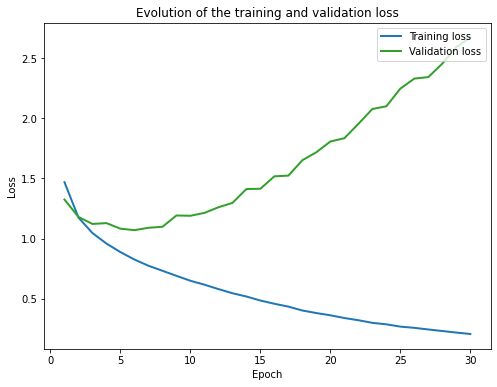

Accuracy of the network on the 40000 train images: 75.14 %
Accuracy of the network on the 10000 validation images: 63.51 %
Accuracy of the network on the 10000 test images: 63.09 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.97 took: 1.72s
Epoch 1, 20% 	 train_loss: 1.71 took: 1.56s
Epoch 1, 30% 	 train_loss: 1.58 took: 1.50s
Epoch 1, 40% 	 train_loss: 1.50 took: 1.69s
Epoch 1, 50% 	 train_loss: 1.46 took: 1.56s
Epoch 1, 60% 	 train_loss: 1.43 took: 1.51s
Epoch 1, 70% 	 train_loss: 1.36 took: 1.58s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.52s
Epoch 1, 90% 	 train_loss: 1.33 took: 1.52s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.24 took: 1.84s
Epoch 2, 20% 	 train_loss: 1.25 took: 1.65s
Epoch 2, 30% 	 train_loss: 1.20 took: 1.62s
Epoch 2, 40% 	 train_loss: 1.21 took: 1.53s
Epoch 2, 50% 	 train_loss: 1.2

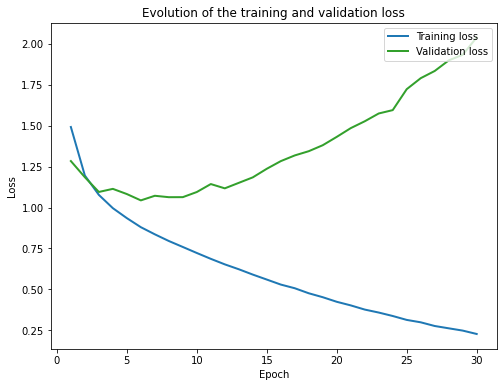

Accuracy of the network on the 40000 train images: 73.19 %
Accuracy of the network on the 10000 validation images: 64.40 %
Accuracy of the network on the 10000 test images: 63.16 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.12 took: 1.68s
Epoch 1, 20% 	 train_loss: 1.91 took: 1.56s
Epoch 1, 30% 	 train_loss: 1.77 took: 1.52s
Epoch 1, 40% 	 train_loss: 1.68 took: 1.40s
Epoch 1, 50% 	 train_loss: 1.63 took: 1.41s
Epoch 1, 60% 	 train_loss: 1.60 took: 1.43s
Epoch 1, 70% 	 train_loss: 1.56 took: 1.66s
Epoch 1, 80% 	 train_loss: 1.50 took: 1.51s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.57s
Validation loss = 1.48
Epoch 2, 10% 	 train_loss: 1.46 took: 1.65s
Epoch 2, 20% 	 train_loss: 1.45 took: 1.55s
Epoch 2, 30% 	 train_loss: 1.41 took: 1.56s
Epoch 2, 40% 	 train_loss: 1.43 took: 1.55s
Epoch 2, 50% 	 train_loss: 1.3

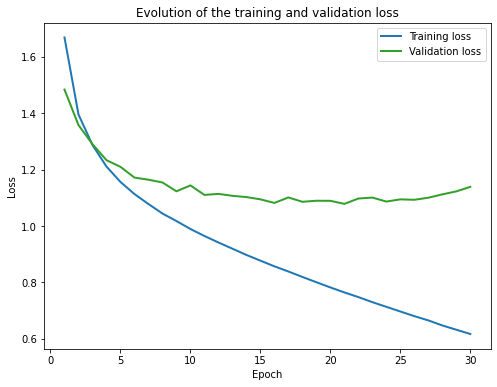

Accuracy of the network on the 40000 train images: 75.73 %
Accuracy of the network on the 10000 validation images: 63.89 %
Accuracy of the network on the 10000 test images: 63.44 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.96 took: 1.18s
Epoch 1, 20% 	 train_loss: 1.67 took: 1.03s
Epoch 1, 30% 	 train_loss: 1.53 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.97s
Epoch 1, 50% 	 train_loss: 1.42 took: 1.06s
Epoch 1, 60% 	 train_loss: 1.38 took: 1.00s
Epoch 1, 70% 	 train_loss: 1.37 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.02s
Epoch 1, 90% 	 train_loss: 1.31 took: 0.99s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.24 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.24 took: 0.97s
Epoch 2, 30% 	 train_loss: 1.19 took: 0.98s
Epoch 2, 40% 	 train_loss: 1.19 took: 0.97s
Epoch 2, 50% 	 train_loss: 1.18 

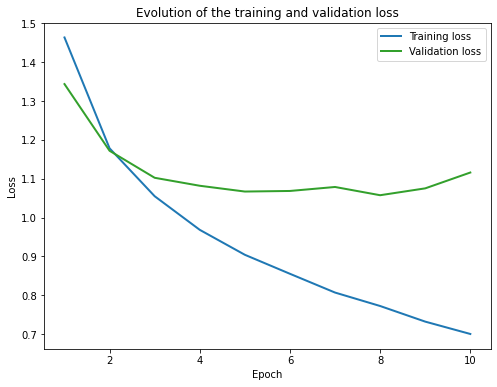

Accuracy of the network on the 40000 train images: 76.70 %
Accuracy of the network on the 10000 validation images: 64.72 %
Accuracy of the network on the 10000 test images: 63.97 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.02 took: 1.14s
Epoch 1, 20% 	 train_loss: 1.73 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.57 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.50 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.46 took: 0.98s
Epoch 1, 60% 	 train_loss: 1.43 took: 0.97s
Epoch 1, 70% 	 train_loss: 1.41 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.36 took: 1.00s
Epoch 1, 90% 	 train_loss: 1.34 took: 0.98s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.26 took: 1.19s
Epoch 2, 20% 	 train_loss: 1.28 took: 0.99s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.98s
Epoch 2, 40% 	 train_loss: 1.21 took: 0.97s
Epoch 2, 50% 	 train_loss: 1.2

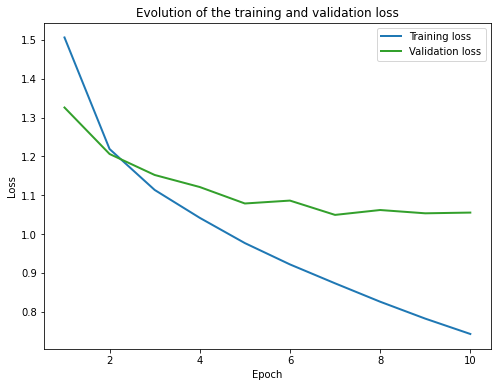

Accuracy of the network on the 40000 train images: 73.34 %
Accuracy of the network on the 10000 validation images: 63.71 %
Accuracy of the network on the 10000 test images: 63.27 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.19 took: 1.22s
Epoch 1, 20% 	 train_loss: 1.99 took: 1.00s
Epoch 1, 30% 	 train_loss: 1.87 took: 1.00s
Epoch 1, 40% 	 train_loss: 1.81 took: 1.07s
Epoch 1, 50% 	 train_loss: 1.76 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.73 took: 0.95s
Epoch 1, 70% 	 train_loss: 1.70 took: 0.97s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.66 took: 0.96s
Validation loss = 1.61
Epoch 2, 10% 	 train_loss: 1.58 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.58 took: 0.96s
Epoch 2, 30% 	 train_loss: 1.54 took: 0.97s
Epoch 2, 40% 	 train_loss: 1.52 took: 1.09s
Epoch 2, 50% 	 train_loss: 1.4

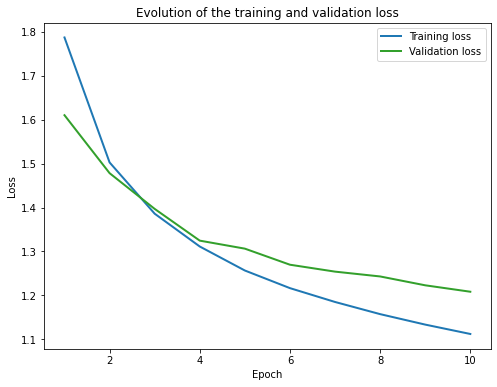

Accuracy of the network on the 40000 train images: 62.69 %
Accuracy of the network on the 10000 validation images: 58.29 %
Accuracy of the network on the 10000 test images: 57.87 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.94 took: 1.31s
Epoch 1, 20% 	 train_loss: 1.64 took: 0.98s
Epoch 1, 30% 	 train_loss: 1.55 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.44 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.95s
Epoch 1, 60% 	 train_loss: 1.35 took: 0.98s
Epoch 1, 70% 	 train_loss: 1.35 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.33 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.32 took: 0.99s
Validation loss = 1.25
Epoch 2, 10% 	 train_loss: 1.15 took: 1.18s
Epoch 2, 20% 	 train_loss: 1.14 took: 0.95s
Epoch 2, 30% 	 train_loss: 1.16 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.07s
Epoch 2, 50% 	 train_loss: 1.15 

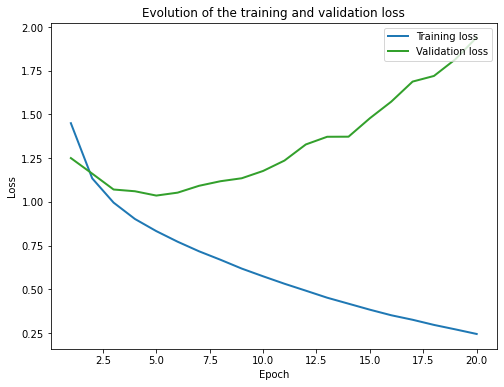

Accuracy of the network on the 40000 train images: 75.44 %
Accuracy of the network on the 10000 validation images: 64.65 %
Accuracy of the network on the 10000 test images: 64.51 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.17s
Epoch 1, 20% 	 train_loss: 1.73 took: 1.01s
Epoch 1, 30% 	 train_loss: 1.61 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.53 took: 1.11s
Epoch 1, 50% 	 train_loss: 1.50 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.46 took: 1.08s
Epoch 1, 70% 	 train_loss: 1.44 took: 1.01s
Epoch 1, 80% 	 train_loss: 1.41 took: 1.02s
Epoch 1, 90% 	 train_loss: 1.38 took: 1.03s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.29 took: 1.22s
Epoch 2, 20% 	 train_loss: 1.26 took: 1.04s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.97s
Epoch 2, 40% 	 train_loss: 1.26 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.2

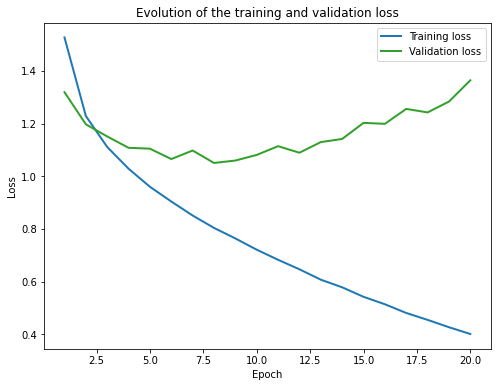

Accuracy of the network on the 40000 train images: 74.95 %
Accuracy of the network on the 10000 validation images: 63.76 %
Accuracy of the network on the 10000 test images: 63.24 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.17 took: 1.31s
Epoch 1, 20% 	 train_loss: 1.95 took: 1.07s
Epoch 1, 30% 	 train_loss: 1.89 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.79 took: 0.98s
Epoch 1, 50% 	 train_loss: 1.74 took: 0.95s
Epoch 1, 60% 	 train_loss: 1.70 took: 1.04s
Epoch 1, 70% 	 train_loss: 1.70 took: 0.99s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.65 took: 0.97s
Validation loss = 1.61
Epoch 2, 10% 	 train_loss: 1.58 took: 1.19s
Epoch 2, 20% 	 train_loss: 1.58 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.53 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.50 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.5

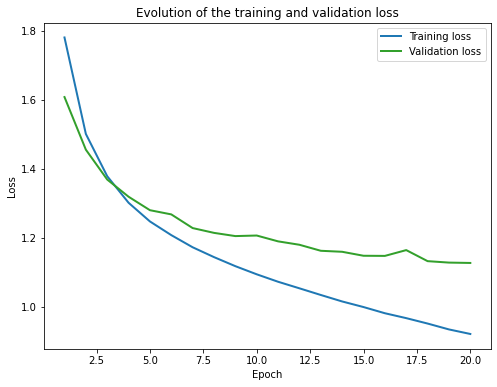

Accuracy of the network on the 40000 train images: 69.37 %
Accuracy of the network on the 10000 validation images: 61.02 %
Accuracy of the network on the 10000 test images: 61.87 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.93 took: 1.30s
Epoch 1, 20% 	 train_loss: 1.63 took: 1.07s
Epoch 1, 30% 	 train_loss: 1.51 took: 1.11s
Epoch 1, 40% 	 train_loss: 1.47 took: 0.98s
Epoch 1, 50% 	 train_loss: 1.39 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.35 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.36 took: 0.98s
Epoch 1, 80% 	 train_loss: 1.28 took: 0.99s
Epoch 1, 90% 	 train_loss: 1.29 took: 0.96s
Validation loss = 1.23
Epoch 2, 10% 	 train_loss: 1.21 took: 1.44s
Epoch 2, 20% 	 train_loss: 1.17 took: 0.98s
Epoch 2, 30% 	 train_loss: 1.17 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.16 took: 0.96s
Epoch 2, 50% 	 train_loss: 1.13 

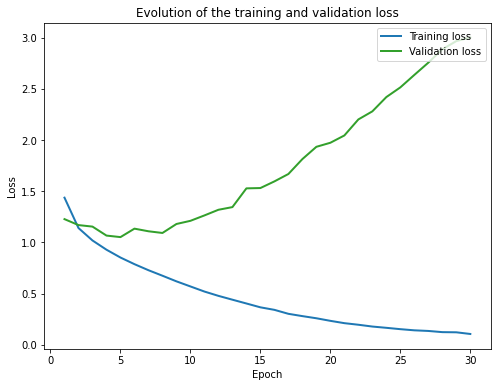

Accuracy of the network on the 40000 train images: 74.40 %
Accuracy of the network on the 10000 validation images: 63.39 %
Accuracy of the network on the 10000 test images: 63.01 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.14s
Epoch 1, 20% 	 train_loss: 1.74 took: 0.97s
Epoch 1, 30% 	 train_loss: 1.62 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.55 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.47 took: 1.12s
Epoch 1, 60% 	 train_loss: 1.44 took: 0.99s
Epoch 1, 70% 	 train_loss: 1.43 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.37 took: 0.95s
Epoch 1, 90% 	 train_loss: 1.37 took: 0.97s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.28 took: 1.15s
Epoch 2, 20% 	 train_loss: 1.27 took: 0.96s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.25 took: 0.93s
Epoch 2, 50% 	 train_loss: 1.2

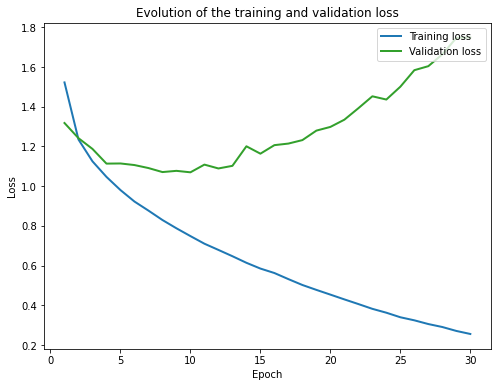

Accuracy of the network on the 40000 train images: 77.40 %
Accuracy of the network on the 10000 validation images: 63.84 %
Accuracy of the network on the 10000 test images: 63.36 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.16 took: 1.22s
Epoch 1, 20% 	 train_loss: 1.97 took: 0.93s
Epoch 1, 30% 	 train_loss: 1.88 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.81 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.79 took: 0.97s
Epoch 1, 60% 	 train_loss: 1.72 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.68 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.65 took: 0.99s
Epoch 1, 90% 	 train_loss: 1.62 took: 1.12s
Validation loss = 1.56
Epoch 2, 10% 	 train_loss: 1.57 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.52 took: 0.95s
Epoch 2, 30% 	 train_loss: 1.49 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.47 took: 1.05s
Epoch 2, 50% 	 train_loss: 1.4

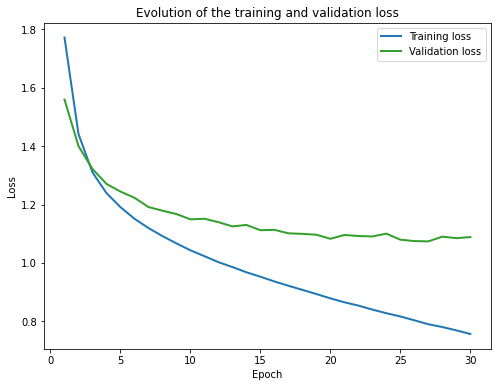

Accuracy of the network on the 40000 train images: 74.63 %
Accuracy of the network on the 10000 validation images: 63.20 %
Accuracy of the network on the 10000 test images: 63.62 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.97 took: 1.09s
Epoch 1, 20% 	 train_loss: 1.64 took: 0.84s
Epoch 1, 30% 	 train_loss: 1.54 took: 0.83s
Epoch 1, 40% 	 train_loss: 1.46 took: 0.90s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.37 took: 0.92s
Epoch 1, 70% 	 train_loss: 1.33 took: 0.93s
Epoch 1, 80% 	 train_loss: 1.30 took: 0.87s
Epoch 1, 90% 	 train_loss: 1.30 took: 0.95s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.21 took: 1.14s
Epoch 2, 20% 	 train_loss: 1.17 took: 0.83s
Epoch 2, 30% 	 train_loss: 1.20 took: 0.83s
Epoch 2, 40% 	 train_loss: 1.18 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.16 

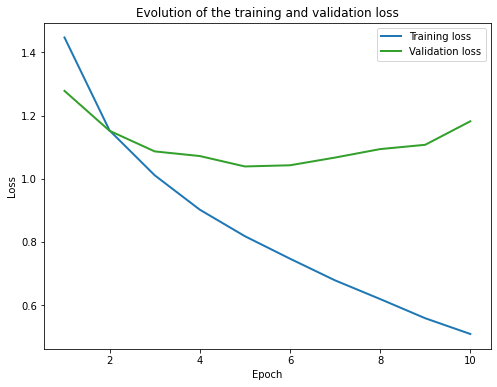

Accuracy of the network on the 40000 train images: 75.34 %
Accuracy of the network on the 10000 validation images: 64.22 %
Accuracy of the network on the 10000 test images: 64.56 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.03 took: 1.07s
Epoch 1, 20% 	 train_loss: 1.80 took: 0.85s
Epoch 1, 30% 	 train_loss: 1.69 took: 0.83s
Epoch 1, 40% 	 train_loss: 1.59 took: 0.84s
Epoch 1, 50% 	 train_loss: 1.55 took: 0.85s
Epoch 1, 60% 	 train_loss: 1.50 took: 0.92s
Epoch 1, 70% 	 train_loss: 1.48 took: 0.92s
Epoch 1, 80% 	 train_loss: 1.47 took: 0.86s
Epoch 1, 90% 	 train_loss: 1.44 took: 0.89s
Validation loss = 1.41
Epoch 2, 10% 	 train_loss: 1.37 took: 1.12s
Epoch 2, 20% 	 train_loss: 1.34 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.32 took: 0.84s
Epoch 2, 40% 	 train_loss: 1.34 took: 0.84s
Epoch 2, 50% 	 train_loss: 1.3

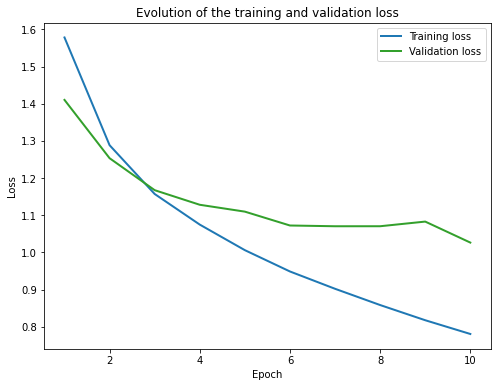

Accuracy of the network on the 40000 train images: 75.80 %
Accuracy of the network on the 10000 validation images: 64.73 %
Accuracy of the network on the 10000 test images: 64.04 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.21 took: 1.10s
Epoch 1, 20% 	 train_loss: 2.03 took: 0.87s
Epoch 1, 30% 	 train_loss: 1.93 took: 0.82s
Epoch 1, 40% 	 train_loss: 1.82 took: 0.89s
Epoch 1, 50% 	 train_loss: 1.79 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.76 took: 0.83s
Epoch 1, 70% 	 train_loss: 1.71 took: 0.99s
Epoch 1, 80% 	 train_loss: 1.70 took: 0.87s
Epoch 1, 90% 	 train_loss: 1.68 took: 0.83s
Validation loss = 1.64
Epoch 2, 10% 	 train_loss: 1.64 took: 1.11s
Epoch 2, 20% 	 train_loss: 1.61 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.60 took: 0.84s
Epoch 2, 40% 	 train_loss: 1.58 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.5

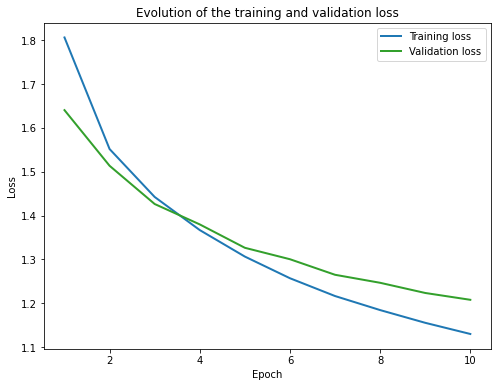

Accuracy of the network on the 40000 train images: 61.71 %
Accuracy of the network on the 10000 validation images: 58.01 %
Accuracy of the network on the 10000 test images: 57.96 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.02 took: 1.05s
Epoch 1, 20% 	 train_loss: 1.77 took: 0.84s
Epoch 1, 30% 	 train_loss: 1.61 took: 0.82s
Epoch 1, 40% 	 train_loss: 1.55 took: 0.85s
Epoch 1, 50% 	 train_loss: 1.49 took: 0.88s
Epoch 1, 60% 	 train_loss: 1.43 took: 0.97s
Epoch 1, 70% 	 train_loss: 1.40 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.37 took: 0.86s
Epoch 1, 90% 	 train_loss: 1.35 took: 0.84s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.28 took: 1.05s
Epoch 2, 20% 	 train_loss: 1.26 took: 0.81s
Epoch 2, 30% 	 train_loss: 1.26 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.23 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.19 

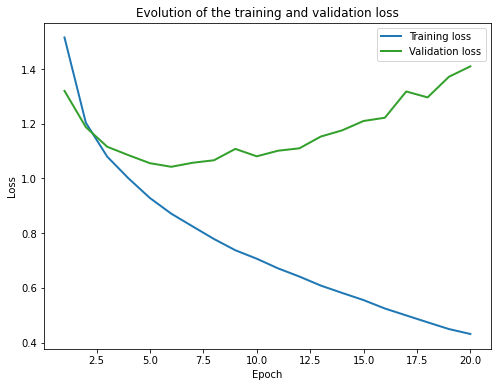

Accuracy of the network on the 40000 train images: 73.14 %
Accuracy of the network on the 10000 validation images: 64.08 %
Accuracy of the network on the 10000 test images: 63.56 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.00 took: 1.19s
Epoch 1, 20% 	 train_loss: 1.80 took: 0.89s
Epoch 1, 30% 	 train_loss: 1.73 took: 0.83s
Epoch 1, 40% 	 train_loss: 1.65 took: 0.84s
Epoch 1, 50% 	 train_loss: 1.58 took: 0.83s
Epoch 1, 60% 	 train_loss: 1.52 took: 0.83s
Epoch 1, 70% 	 train_loss: 1.50 took: 0.83s
Epoch 1, 80% 	 train_loss: 1.46 took: 0.93s
Epoch 1, 90% 	 train_loss: 1.43 took: 0.89s
Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.35 took: 1.04s
Epoch 2, 20% 	 train_loss: 1.36 took: 0.84s
Epoch 2, 30% 	 train_loss: 1.30 took: 0.90s
Epoch 2, 40% 	 train_loss: 1.32 took: 0.92s
Epoch 2, 50% 	 train_loss: 1.2

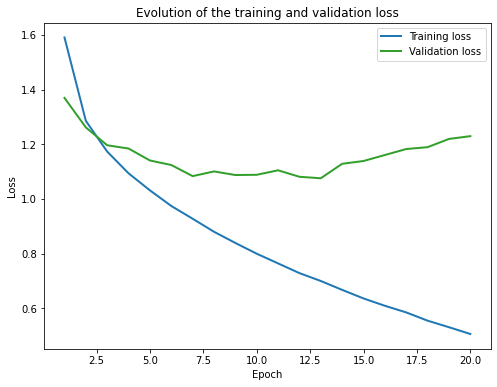

Accuracy of the network on the 40000 train images: 79.53 %
Accuracy of the network on the 10000 validation images: 64.59 %
Accuracy of the network on the 10000 test images: 63.92 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.16 took: 1.06s
Epoch 1, 20% 	 train_loss: 1.99 took: 0.81s
Epoch 1, 30% 	 train_loss: 1.91 took: 0.89s
Epoch 1, 40% 	 train_loss: 1.83 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.76 took: 0.81s
Epoch 1, 60% 	 train_loss: 1.75 took: 0.91s
Epoch 1, 70% 	 train_loss: 1.71 took: 0.86s
Epoch 1, 80% 	 train_loss: 1.69 took: 0.87s
Epoch 1, 90% 	 train_loss: 1.67 took: 0.87s
Validation loss = 1.61
Epoch 2, 10% 	 train_loss: 1.59 took: 1.07s
Epoch 2, 20% 	 train_loss: 1.55 took: 0.84s
Epoch 2, 30% 	 train_loss: 1.55 took: 0.89s
Epoch 2, 40% 	 train_loss: 1.52 took: 0.85s
Epoch 2, 50% 	 train_loss: 1.5

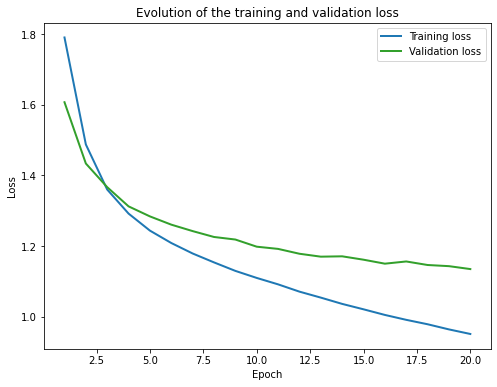

Accuracy of the network on the 40000 train images: 68.20 %
Accuracy of the network on the 10000 validation images: 60.97 %
Accuracy of the network on the 10000 test images: 60.67 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.00 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.73 took: 0.83s
Epoch 1, 30% 	 train_loss: 1.62 took: 0.88s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.90s
Epoch 1, 50% 	 train_loss: 1.44 took: 0.89s
Epoch 1, 60% 	 train_loss: 1.43 took: 0.87s
Epoch 1, 70% 	 train_loss: 1.37 took: 0.88s
Epoch 1, 80% 	 train_loss: 1.36 took: 0.85s
Epoch 1, 90% 	 train_loss: 1.32 took: 0.93s
Validation loss = 1.36
Epoch 2, 10% 	 train_loss: 1.26 took: 1.06s
Epoch 2, 20% 	 train_loss: 1.23 took: 0.89s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.90s
Epoch 2, 40% 	 train_loss: 1.21 took: 0.96s
Epoch 2, 50% 	 train_loss: 1.23 

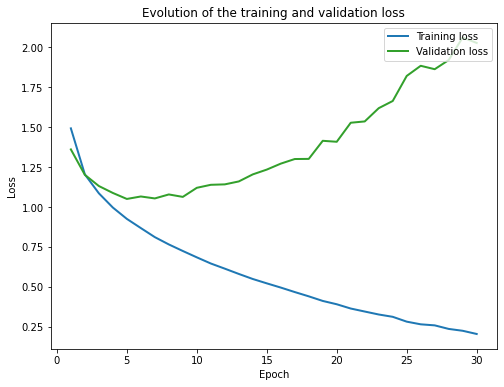

Accuracy of the network on the 40000 train images: 71.56 %
Accuracy of the network on the 10000 validation images: 63.78 %
Accuracy of the network on the 10000 test images: 62.90 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.02 took: 1.06s
Epoch 1, 20% 	 train_loss: 1.78 took: 0.86s
Epoch 1, 30% 	 train_loss: 1.71 took: 0.92s
Epoch 1, 40% 	 train_loss: 1.58 took: 0.84s
Epoch 1, 50% 	 train_loss: 1.54 took: 0.85s
Epoch 1, 60% 	 train_loss: 1.47 took: 0.83s
Epoch 1, 70% 	 train_loss: 1.41 took: 0.84s
Epoch 1, 80% 	 train_loss: 1.40 took: 0.86s
Epoch 1, 90% 	 train_loss: 1.38 took: 0.84s
Validation loss = 1.36
Epoch 2, 10% 	 train_loss: 1.34 took: 1.06s
Epoch 2, 20% 	 train_loss: 1.29 took: 0.83s
Epoch 2, 30% 	 train_loss: 1.28 took: 0.84s
Epoch 2, 40% 	 train_loss: 1.26 took: 0.83s
Epoch 2, 50% 	 train_loss: 1.2

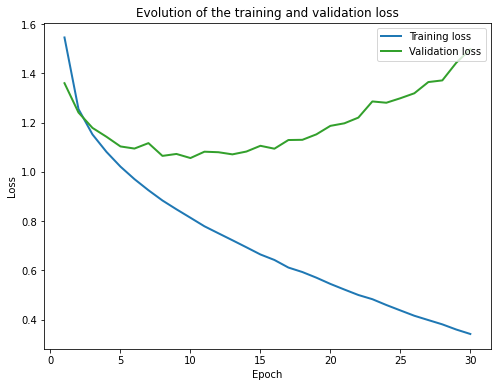

Accuracy of the network on the 40000 train images: 74.73 %
Accuracy of the network on the 10000 validation images: 64.55 %
Accuracy of the network on the 10000 test images: 63.87 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.22 took: 1.08s
Epoch 1, 20% 	 train_loss: 2.01 took: 0.83s
Epoch 1, 30% 	 train_loss: 1.92 took: 0.92s
Epoch 1, 40% 	 train_loss: 1.86 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.79 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.75 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.74 took: 0.87s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.88s
Epoch 1, 90% 	 train_loss: 1.65 took: 0.89s
Validation loss = 1.62
Epoch 2, 10% 	 train_loss: 1.61 took: 1.14s
Epoch 2, 20% 	 train_loss: 1.60 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.57 took: 0.85s
Epoch 2, 40% 	 train_loss: 1.54 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.5

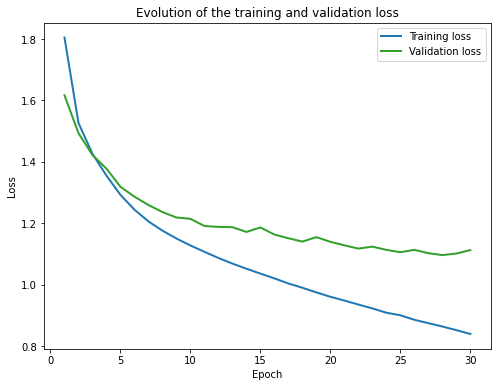

Accuracy of the network on the 40000 train images: 71.66 %
Accuracy of the network on the 10000 validation images: 62.44 %
Accuracy of the network on the 10000 test images: 62.38 %


In [ ]:
batch_size_param = [16,32,48]
n_epochs_param = [10,20,30]
learning_rate_param = [0.001,0.0005,0.0001]

for batch_size in batch_size_param:
  for n_epochs in n_epochs_param:
    for learning_rate in learning_rate_param:
      print('\n\n############################################################ batch_size={} || n_epochs={} || learning_rate={}'.format(batch_size, n_epochs,learning_rate))
      net = MyConvolutionalNetwork()
      train_history, val_history = train(net, batch_size=batch_size, n_epochs=n_epochs, learning_rate=learning_rate)
      plot_losses(train_history, val_history)
      compute_accuracy(net)


**In this set of test, we've got the best score 64,56% on the test dataset with the hyperparameter configuration of "*batch_size=48*, *n_epochs=10*, *learning_rate=0.001*"**

**The following illustrates the loss evolution curves when training the best scoring model**

Text(0.5, 1.0, 'Evolution of the training and validation loss')

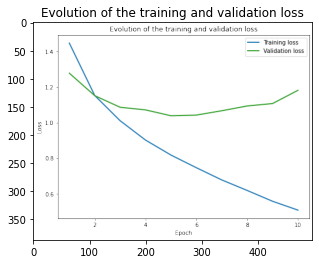

In [ ]:
# im=plt.imread('single convolutional layer #1.png') 
# plt.imshow(im)
# plt.title('Evolution of the training and validation loss')

## single convolutional layer #2



NN properties:
<br> 


1.   kernel size = 5
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)
3.   number of convolutional layers = 1
4.   size of fully connected layers (nn.linear) = flattened_size -> 64 -> 10


In [ ]:
out_size = get_output_size(in_size=32, kernel_size=5, stride=1, padding=1)
print(out_size)

30


In [ ]:
class MyConvolutionalNetwork2(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 15 * 15
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x30x30
        x = F.relu(self.conv1(x))
        # 18x30x30 -> 18x15x15
        x = self.pool(x)
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x15x15 -> 4500
        x = x.view(-1, self.flattened_size)
        # 4500 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10  
        x = self.fc2(x)
        return x



############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.87 took: 1.53s
Epoch 1, 20% 	 train_loss: 1.57 took: 1.33s
Epoch 1, 30% 	 train_loss: 1.46 took: 1.31s
Epoch 1, 40% 	 train_loss: 1.42 took: 1.30s
Epoch 1, 50% 	 train_loss: 1.40 took: 1.32s
Epoch 1, 60% 	 train_loss: 1.34 took: 1.32s
Epoch 1, 70% 	 train_loss: 1.30 took: 1.60s
Epoch 1, 80% 	 train_loss: 1.28 took: 1.42s
Epoch 1, 90% 	 train_loss: 1.25 took: 1.36s
Validation loss = 1.22
Epoch 2, 10% 	 train_loss: 1.16 took: 1.54s
Epoch 2, 20% 	 train_loss: 1.12 took: 1.36s
Epoch 2, 30% 	 train_loss: 1.13 took: 1.30s
Epoch 2, 40% 	 train_loss: 1.10 took: 1.30s
Epoch 2, 50% 	 train_loss: 1.14 took: 1.32s
Epoch 2, 60% 	 train_loss: 1.11 took: 1.38s
Epoch 2, 70% 	 train_loss: 1.14 took: 1.31s
Epoch 2, 80% 	 train_loss: 1.09 took: 1.38s
Epoch 2, 90% 	 train_loss: 1.09 took:

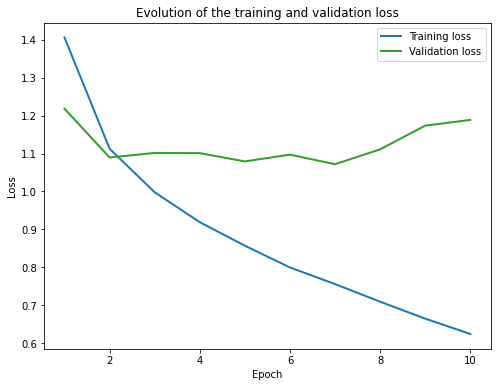

Accuracy of the network on the 40000 train images: 78.37 %


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Accuracy of the network on the 10000 validation images: 65.00 %
Accuracy of the network on the 10000 test images: 64.29 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.96 took: 1.49s
Epoch 1, 20% 	 train_loss: 1.66 took: 1.32s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 1, 30% 	 train_loss: 1.60 took: 1.44s
Epoch 1, 40% 	 train_loss: 1.51 took: 1.46s
Epoch 1, 50% 	 train_loss: 1.45 took: 1.37s
Epoch 1, 60% 	 train_loss: 1.40 took: 1.34s
Epoch 1, 70% 	 train_loss: 1.34 took: 1.35s
Epoch 1, 80% 	 train_loss: 1.34 took: 1.44s
Epoch 1, 90% 	 train_loss: 1.32 took: 1.51s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
    assert self._parent_pid == os.getpid(), 'can only join a child process'
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
AssertionError: can only 

Validation loss = 1.28


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 2, 10% 	 train_loss: 1.23 took: 1.64s
Epoch 2, 20% 	 train_loss: 1.22 took: 1.30s
Epoch 2, 30% 	 train_loss: 1.21 took: 1.33s
Epoch 2, 40% 	 train_loss: 1.17 took: 1.38s
Epoch 2, 50% 	 train_loss: 1.17 took: 1.31s
Epoch 2, 60% 	 train_loss: 1.20 took: 1.32s
Epoch 2, 70% 	 train_loss: 1.16 took: 1.40s
Epoch 2, 80% 	 train_loss: 1.15 took: 1.32s
Epoch 2, 90% 	 train_loss: 1.13 took: 1.31s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

Validation loss = 1.17


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    self._shutdown_workers()
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 3, 10% 	 train_loss: 1.09 took: 1.68s
Epoch 3, 20% 	 train_loss: 1.05 took: 1.41s
Epoch 3, 30% 	 train_loss: 1.06 took: 1.33s
Epoch 3, 40% 	 train_loss: 1.06 took: 1.40s
Epoch 3, 50% 	 train_loss: 1.05 took: 1.36s
Epoch 3, 60% 	 train_loss: 1.06 took: 1.36s
Epoch 3, 70% 	 train_loss: 1.07 took: 1.35s
Epoch 3, 80% 	 train_loss: 1.04 took: 1.34s
Epoch 3, 90% 	 train_loss: 1.05 took: 1.37s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

Validation loss = 1.10


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 4, 10% 	 train_loss: 0.97 took: 1.63s
Epoch 4, 20% 	 train_loss: 0.97 took: 1.35s
Epoch 4, 30% 	 train_loss: 0.95 took: 1.40s
Epoch 4, 40% 	 train_loss: 0.93 took: 1.32s
Epoch 4, 50% 	 train_loss: 1.01 took: 1.49s
Epoch 4, 60% 	 train_loss: 0.96 took: 1.44s
Epoch 4, 70% 	 train_loss: 0.94 took: 1.35s
Epoch 4, 80% 	 train_loss: 0.96 took: 1.41s
Epoch 4, 90% 	 train_loss: 1.00 took: 1.36s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
    self._shutdown_workers()
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
  File "/usr/local/lib/p

Validation loss = 1.10


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 5, 10% 	 train_loss: 0.86 took: 1.75s
Epoch 5, 20% 	 train_loss: 0.90 took: 1.39s
Epoch 5, 30% 	 train_loss: 0.88 took: 1.39s
Epoch 5, 40% 	 train_loss: 0.94 took: 1.40s
Epoch 5, 50% 	 train_loss: 0.90 took: 1.58s
Epoch 5, 60% 	 train_loss: 0.90 took: 1.37s
Epoch 5, 70% 	 train_loss: 0.92 took: 1.43s
Epoch 5, 80% 	 train_loss: 0.92 took: 1.51s
Epoch 5, 90% 	 train_loss: 0.90 took: 1.37s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Excepti

Validation loss = 1.04


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 6, 10% 	 train_loss: 0.85 took: 1.87s
Epoch 6, 20% 	 train_loss: 0.83 took: 1.38s
Epoch 6, 30% 	 train_loss: 0.82 took: 1.39s
Epoch 6, 40% 	 train_loss: 0.84 took: 1.50s
Epoch 6, 50% 	 train_loss: 0.87 took: 1.54s
Epoch 6, 60% 	 train_loss: 0.85 took: 1.45s
Epoch 6, 70% 	 train_loss: 0.87 took: 1.40s
Epoch 6, 80% 	 train_loss: 0.84 took: 1.44s
Epoch 6, 90% 	 train_loss: 0.85 took: 1.37s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
    assert self._parent_pid == os.getpid(), 'can only join a child process'
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
AssertionError: can only join a child process
    sel

Validation loss = 1.05


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 7, 10% 	 train_loss: 0.80 took: 1.69s
Epoch 7, 20% 	 train_loss: 0.79 took: 1.34s
Epoch 7, 30% 	 train_loss: 0.79 took: 1.37s
Epoch 7, 40% 	 train_loss: 0.80 took: 1.41s
Epoch 7, 50% 	 train_loss: 0.82 took: 1.37s
Epoch 7, 60% 	 train_loss: 0.80 took: 1.33s
Epoch 7, 70% 	 train_loss: 0.81 took: 1.39s
Epoch 7, 80% 	 train_loss: 0.81 took: 1.43s
Epoch 7, 90% 	 train_loss: 0.83 took: 1.50s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    sel

Validation loss = 1.04


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 8, 10% 	 train_loss: 0.76 took: 1.66s
Epoch 8, 20% 	 train_loss: 0.73 took: 1.40s
Epoch 8, 30% 	 train_loss: 0.74 took: 1.53s
Epoch 8, 40% 	 train_loss: 0.77 took: 1.37s
Epoch 8, 50% 	 train_loss: 0.75 took: 1.38s
Epoch 8, 60% 	 train_loss: 0.76 took: 1.38s
Epoch 8, 70% 	 train_loss: 0.77 took: 1.55s
Epoch 8, 80% 	 train_loss: 0.78 took: 1.50s
Epoch 8, 90% 	 train_loss: 0.75 took: 1.52s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
Traceback (most recent call last):
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    self._shutdown_workers()
    assert self._parent_pid == os.getpid(), 'can only join a child process'
  File "/usr/local/lib/p

Validation loss = 1.07


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 9, 10% 	 train_loss: 0.67 took: 1.79s
Epoch 9, 20% 	 train_loss: 0.69 took: 1.56s
Epoch 9, 30% 	 train_loss: 0.69 took: 1.36s
Epoch 9, 40% 	 train_loss: 0.74 took: 1.48s
Epoch 9, 50% 	 train_loss: 0.74 took: 1.42s
Epoch 9, 60% 	 train_loss: 0.70 took: 1.36s
Epoch 9, 70% 	 train_loss: 0.72 took: 1.35s
Epoch 9, 80% 	 train_loss: 0.74 took: 1.38s
Epoch 9, 90% 	 train_loss: 0.74 took: 1.45s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Traceback (most recent call last):
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/da

Validation loss = 1.06


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process


Epoch 10, 10% 	 train_loss: 0.65 took: 1.86s
Epoch 10, 20% 	 train_loss: 0.65 took: 1.42s
Epoch 10, 30% 	 train_loss: 0.66 took: 1.39s
Epoch 10, 40% 	 train_loss: 0.69 took: 1.39s
Epoch 10, 50% 	 train_loss: 0.69 took: 1.44s
Epoch 10, 60% 	 train_loss: 0.69 took: 1.42s
Epoch 10, 70% 	 train_loss: 0.68 took: 1.42s
Epoch 10, 80% 	 train_loss: 0.71 took: 1.41s
Epoch 10, 90% 	 train_loss: 0.68 took: 1.42s


Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f5ccba8a6d8>>
    self._shutdown_workers()
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1075, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1101, in __del__
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
    sel

Validation loss = 1.11
Training Finished, took 167.71s


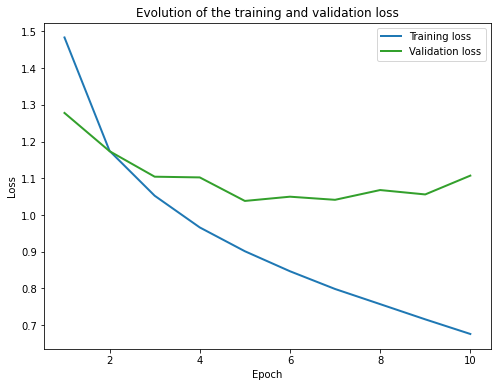

Accuracy of the network on the 40000 train images: 71.98 %
Accuracy of the network on the 10000 validation images: 64.49 %
Accuracy of the network on the 10000 test images: 64.48 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.09 took: 1.68s
Epoch 1, 20% 	 train_loss: 1.87 took: 1.47s
Epoch 1, 30% 	 train_loss: 1.71 took: 1.43s
Epoch 1, 40% 	 train_loss: 1.67 took: 1.50s
Epoch 1, 50% 	 train_loss: 1.63 took: 1.46s
Epoch 1, 60% 	 train_loss: 1.58 took: 1.43s
Epoch 1, 70% 	 train_loss: 1.53 took: 1.42s
Epoch 1, 80% 	 train_loss: 1.53 took: 1.51s
Epoch 1, 90% 	 train_loss: 1.50 took: 1.46s
Validation loss = 1.47
Epoch 2, 10% 	 train_loss: 1.41 took: 1.83s
Epoch 2, 20% 	 train_loss: 1.42 took: 1.49s
Epoch 2, 30% 	 train_loss: 1.40 took: 1.62s
Epoch 2, 40% 	 train_loss: 1.41 took: 1.65s
Epoch 2, 50% 	 train_loss: 1.3

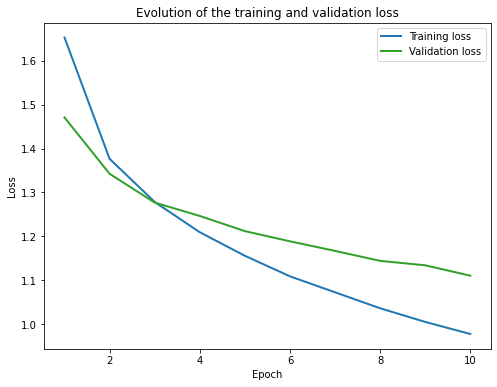

Accuracy of the network on the 40000 train images: 68.23 %
Accuracy of the network on the 10000 validation images: 61.83 %
Accuracy of the network on the 10000 test images: 61.51 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.84 took: 1.59s
Epoch 1, 20% 	 train_loss: 1.57 took: 1.44s
Epoch 1, 30% 	 train_loss: 1.49 took: 1.37s
Epoch 1, 40% 	 train_loss: 1.44 took: 1.38s
Epoch 1, 50% 	 train_loss: 1.35 took: 1.38s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.41s
Epoch 1, 70% 	 train_loss: 1.29 took: 1.42s
Epoch 1, 80% 	 train_loss: 1.29 took: 1.41s
Epoch 1, 90% 	 train_loss: 1.27 took: 1.44s
Validation loss = 1.20
Epoch 2, 10% 	 train_loss: 1.12 took: 1.66s
Epoch 2, 20% 	 train_loss: 1.17 took: 1.44s
Epoch 2, 30% 	 train_loss: 1.12 took: 1.45s
Epoch 2, 40% 	 train_loss: 1.15 took: 1.59s
Epoch 2, 50% 	 train_loss: 1.07 

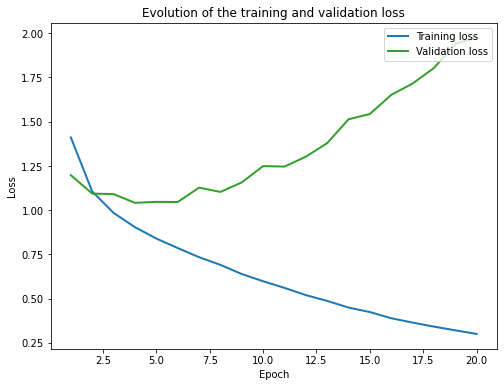

Accuracy of the network on the 40000 train images: 72.83 %
Accuracy of the network on the 10000 validation images: 64.44 %
Accuracy of the network on the 10000 test images: 63.69 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.94 took: 1.51s
Epoch 1, 20% 	 train_loss: 1.65 took: 1.40s
Epoch 1, 30% 	 train_loss: 1.53 took: 1.33s
Epoch 1, 40% 	 train_loss: 1.49 took: 1.35s
Epoch 1, 50% 	 train_loss: 1.45 took: 1.39s
Epoch 1, 60% 	 train_loss: 1.39 took: 1.34s
Epoch 1, 70% 	 train_loss: 1.36 took: 1.36s
Epoch 1, 80% 	 train_loss: 1.32 took: 1.41s
Epoch 1, 90% 	 train_loss: 1.32 took: 1.59s
Validation loss = 1.30
Epoch 2, 10% 	 train_loss: 1.23 took: 1.62s
Epoch 2, 20% 	 train_loss: 1.21 took: 1.50s
Epoch 2, 30% 	 train_loss: 1.23 took: 1.46s
Epoch 2, 40% 	 train_loss: 1.23 took: 1.41s
Epoch 2, 50% 	 train_loss: 1.2

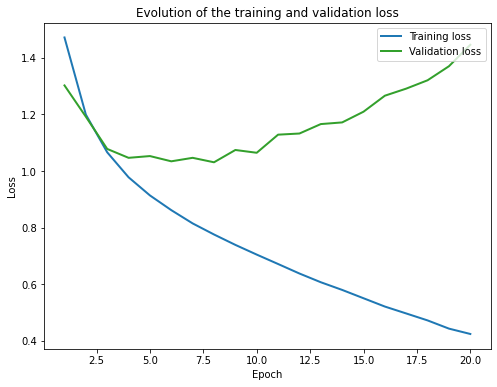

Accuracy of the network on the 40000 train images: 76.11 %
Accuracy of the network on the 10000 validation images: 64.88 %
Accuracy of the network on the 10000 test images: 65.35 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.11 took: 1.69s
Epoch 1, 20% 	 train_loss: 1.86 took: 1.42s
Epoch 1, 30% 	 train_loss: 1.74 took: 1.47s
Epoch 1, 40% 	 train_loss: 1.68 took: 1.57s
Epoch 1, 50% 	 train_loss: 1.60 took: 1.46s
Epoch 1, 60% 	 train_loss: 1.56 took: 1.42s
Epoch 1, 70% 	 train_loss: 1.54 took: 1.38s
Epoch 1, 80% 	 train_loss: 1.51 took: 1.33s
Epoch 1, 90% 	 train_loss: 1.49 took: 1.37s
Validation loss = 1.45
Epoch 2, 10% 	 train_loss: 1.41 took: 1.63s
Epoch 2, 20% 	 train_loss: 1.42 took: 1.41s
Epoch 2, 30% 	 train_loss: 1.40 took: 1.38s
Epoch 2, 40% 	 train_loss: 1.39 took: 1.50s
Epoch 2, 50% 	 train_loss: 1.3

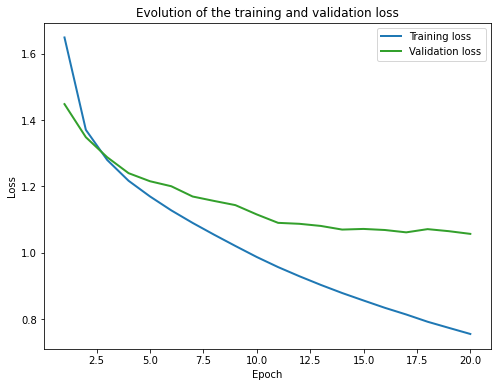

Accuracy of the network on the 40000 train images: 75.77 %
Accuracy of the network on the 10000 validation images: 64.44 %
Accuracy of the network on the 10000 test images: 64.29 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.87 took: 1.52s
Epoch 1, 20% 	 train_loss: 1.56 took: 1.31s
Epoch 1, 30% 	 train_loss: 1.48 took: 1.31s
Epoch 1, 40% 	 train_loss: 1.43 took: 1.35s
Epoch 1, 50% 	 train_loss: 1.46 took: 1.38s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.32s
Epoch 1, 70% 	 train_loss: 1.34 took: 1.35s
Epoch 1, 80% 	 train_loss: 1.31 took: 1.52s
Epoch 1, 90% 	 train_loss: 1.27 took: 1.43s
Validation loss = 1.27
Epoch 2, 10% 	 train_loss: 1.17 took: 1.56s
Epoch 2, 20% 	 train_loss: 1.16 took: 1.41s
Epoch 2, 30% 	 train_loss: 1.20 took: 1.35s
Epoch 2, 40% 	 train_loss: 1.18 took: 1.50s
Epoch 2, 50% 	 train_loss: 1.12 

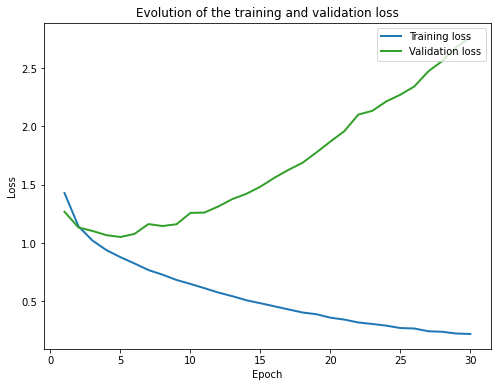

Accuracy of the network on the 40000 train images: 73.44 %
Accuracy of the network on the 10000 validation images: 63.35 %
Accuracy of the network on the 10000 test images: 63.41 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.93 took: 1.51s
Epoch 1, 20% 	 train_loss: 1.63 took: 1.34s
Epoch 1, 30% 	 train_loss: 1.52 took: 1.33s
Epoch 1, 40% 	 train_loss: 1.46 took: 1.34s
Epoch 1, 50% 	 train_loss: 1.42 took: 1.37s
Epoch 1, 60% 	 train_loss: 1.37 took: 1.50s
Epoch 1, 70% 	 train_loss: 1.37 took: 1.44s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.36s
Epoch 1, 90% 	 train_loss: 1.32 took: 1.34s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.24 took: 1.52s
Epoch 2, 20% 	 train_loss: 1.24 took: 1.41s
Epoch 2, 30% 	 train_loss: 1.24 took: 1.35s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.34s
Epoch 2, 50% 	 train_loss: 1.2

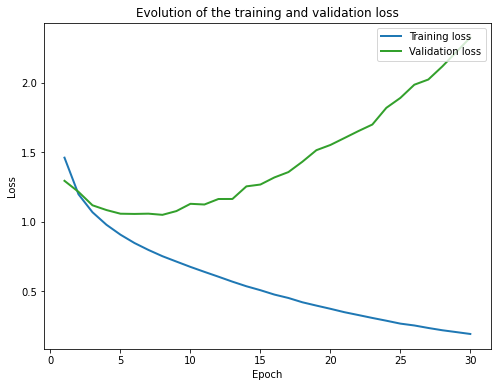

Accuracy of the network on the 40000 train images: 77.15 %
Accuracy of the network on the 10000 validation images: 64.67 %
Accuracy of the network on the 10000 test images: 64.00 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.09 took: 1.54s
Epoch 1, 20% 	 train_loss: 1.86 took: 1.40s
Epoch 1, 30% 	 train_loss: 1.77 took: 1.39s
Epoch 1, 40% 	 train_loss: 1.69 took: 1.34s
Epoch 1, 50% 	 train_loss: 1.68 took: 1.36s
Epoch 1, 60% 	 train_loss: 1.61 took: 1.41s
Epoch 1, 70% 	 train_loss: 1.56 took: 1.41s
Epoch 1, 80% 	 train_loss: 1.54 took: 1.34s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.34s
Validation loss = 1.50
Epoch 2, 10% 	 train_loss: 1.48 took: 1.65s
Epoch 2, 20% 	 train_loss: 1.44 took: 1.36s
Epoch 2, 30% 	 train_loss: 1.42 took: 1.34s
Epoch 2, 40% 	 train_loss: 1.43 took: 1.34s
Epoch 2, 50% 	 train_loss: 1.3

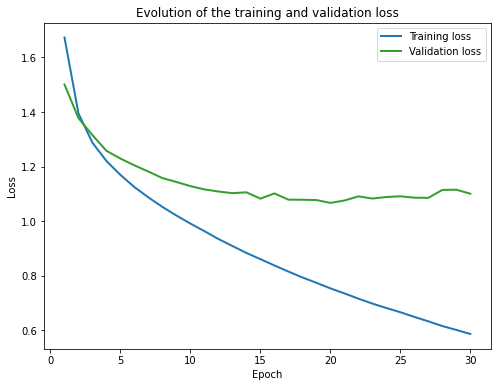

Accuracy of the network on the 40000 train images: 75.66 %
Accuracy of the network on the 10000 validation images: 64.03 %
Accuracy of the network on the 10000 test images: 63.89 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.91 took: 1.20s
Epoch 1, 20% 	 train_loss: 1.63 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.50 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.46 took: 0.97s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.95s
Epoch 1, 60% 	 train_loss: 1.39 took: 0.97s
Epoch 1, 70% 	 train_loss: 1.38 took: 1.05s
Epoch 1, 80% 	 train_loss: 1.35 took: 0.96s
Epoch 1, 90% 	 train_loss: 1.30 took: 0.98s
Validation loss = 1.26
Epoch 2, 10% 	 train_loss: 1.21 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.20 took: 0.96s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.17 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.17 

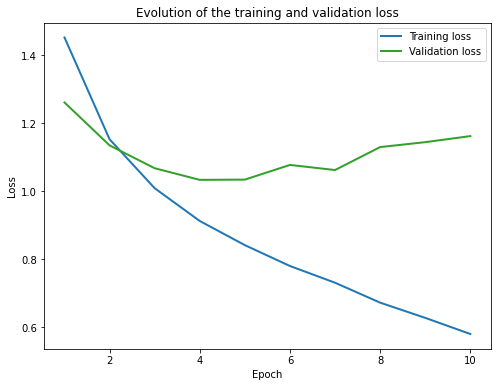

Accuracy of the network on the 40000 train images: 72.40 %
Accuracy of the network on the 10000 validation images: 64.14 %
Accuracy of the network on the 10000 test images: 63.75 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.16s
Epoch 1, 20% 	 train_loss: 1.74 took: 1.05s
Epoch 1, 30% 	 train_loss: 1.59 took: 1.12s
Epoch 1, 40% 	 train_loss: 1.51 took: 0.97s
Epoch 1, 50% 	 train_loss: 1.48 took: 1.10s
Epoch 1, 60% 	 train_loss: 1.43 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.38 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.36 took: 0.98s
Epoch 1, 90% 	 train_loss: 1.38 took: 1.07s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.30 took: 1.24s
Epoch 2, 20% 	 train_loss: 1.25 took: 0.99s
Epoch 2, 30% 	 train_loss: 1.25 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.24 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.2

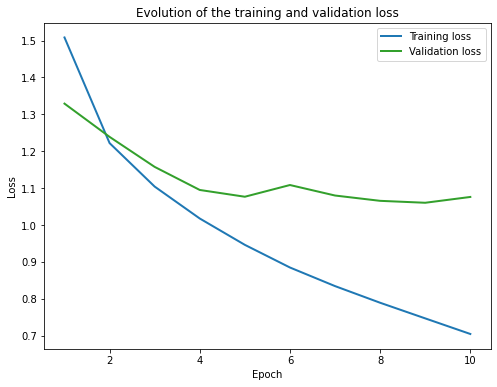

Accuracy of the network on the 40000 train images: 77.23 %
Accuracy of the network on the 10000 validation images: 64.40 %
Accuracy of the network on the 10000 test images: 64.10 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.16 took: 1.18s
Epoch 1, 20% 	 train_loss: 1.93 took: 0.96s
Epoch 1, 30% 	 train_loss: 1.85 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.75 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.71 took: 1.02s
Epoch 1, 60% 	 train_loss: 1.66 took: 0.99s
Epoch 1, 70% 	 train_loss: 1.63 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.59 took: 1.00s
Epoch 1, 90% 	 train_loss: 1.59 took: 0.96s
Validation loss = 1.52
Epoch 2, 10% 	 train_loss: 1.51 took: 1.16s
Epoch 2, 20% 	 train_loss: 1.49 took: 1.00s
Epoch 2, 30% 	 train_loss: 1.46 took: 1.07s
Epoch 2, 40% 	 train_loss: 1.46 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.4

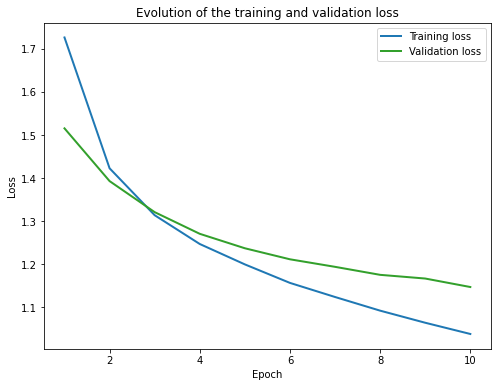

Accuracy of the network on the 40000 train images: 65.30 %
Accuracy of the network on the 10000 validation images: 60.55 %
Accuracy of the network on the 10000 test images: 59.60 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.90 took: 1.26s
Epoch 1, 20% 	 train_loss: 1.61 took: 1.08s
Epoch 1, 30% 	 train_loss: 1.48 took: 1.00s
Epoch 1, 40% 	 train_loss: 1.45 took: 0.99s
Epoch 1, 50% 	 train_loss: 1.42 took: 0.97s
Epoch 1, 60% 	 train_loss: 1.36 took: 0.99s
Epoch 1, 70% 	 train_loss: 1.33 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.34 took: 0.98s
Epoch 1, 90% 	 train_loss: 1.31 took: 0.99s
Validation loss = 1.23
Epoch 2, 10% 	 train_loss: 1.19 took: 1.22s
Epoch 2, 20% 	 train_loss: 1.16 took: 0.97s
Epoch 2, 30% 	 train_loss: 1.15 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.13 took: 0.97s
Epoch 2, 50% 	 train_loss: 1.11 

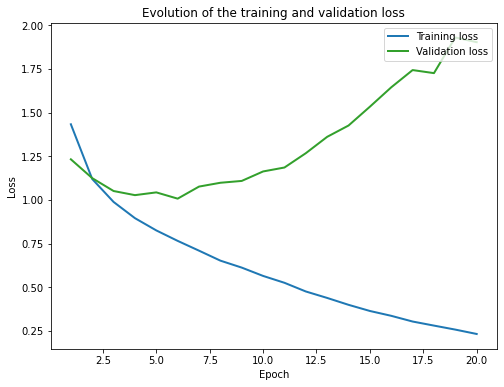

Accuracy of the network on the 40000 train images: 78.29 %
Accuracy of the network on the 10000 validation images: 66.63 %
Accuracy of the network on the 10000 test images: 65.30 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.73 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.58 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.53 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.45 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.41 took: 0.95s
Epoch 1, 70% 	 train_loss: 1.39 took: 1.00s
Epoch 1, 80% 	 train_loss: 1.38 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.35 took: 1.03s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.29 took: 1.22s
Epoch 2, 20% 	 train_loss: 1.27 took: 1.11s
Epoch 2, 30% 	 train_loss: 1.26 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.25 took: 1.01s
Epoch 2, 50% 	 train_loss: 1.2

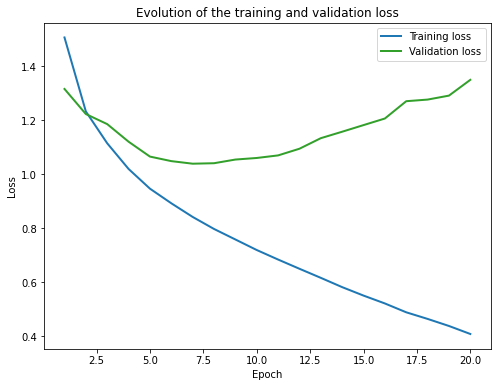

Accuracy of the network on the 40000 train images: 73.54 %
Accuracy of the network on the 10000 validation images: 64.15 %
Accuracy of the network on the 10000 test images: 63.77 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.16 took: 1.17s
Epoch 1, 20% 	 train_loss: 1.92 took: 0.98s
Epoch 1, 30% 	 train_loss: 1.83 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.77 took: 0.99s
Epoch 1, 50% 	 train_loss: 1.70 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.67 took: 0.97s
Epoch 1, 70% 	 train_loss: 1.64 took: 0.98s
Epoch 1, 80% 	 train_loss: 1.63 took: 0.96s
Epoch 1, 90% 	 train_loss: 1.59 took: 0.96s
Validation loss = 1.56
Epoch 2, 10% 	 train_loss: 1.53 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.52 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.49 took: 1.13s
Epoch 2, 40% 	 train_loss: 1.47 took: 1.10s
Epoch 2, 50% 	 train_loss: 1.4

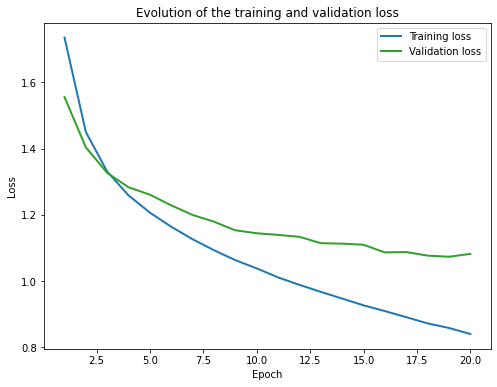

Accuracy of the network on the 40000 train images: 71.99 %
Accuracy of the network on the 10000 validation images: 62.90 %
Accuracy of the network on the 10000 test images: 63.75 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.94 took: 1.19s
Epoch 1, 20% 	 train_loss: 1.63 took: 0.93s
Epoch 1, 30% 	 train_loss: 1.52 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.45 took: 1.00s
Epoch 1, 50% 	 train_loss: 1.45 took: 0.95s
Epoch 1, 60% 	 train_loss: 1.40 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.39 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.29 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.32 took: 0.97s
Validation loss = 1.27
Epoch 2, 10% 	 train_loss: 1.18 took: 1.16s
Epoch 2, 20% 	 train_loss: 1.20 took: 0.96s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.16 took: 1.14s
Epoch 2, 50% 	 train_loss: 1.14 

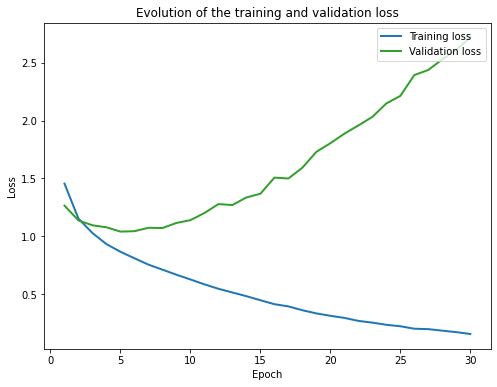

Accuracy of the network on the 40000 train images: 72.91 %
Accuracy of the network on the 10000 validation images: 64.62 %
Accuracy of the network on the 10000 test images: 63.73 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.01 took: 1.15s
Epoch 1, 20% 	 train_loss: 1.76 took: 1.02s
Epoch 1, 30% 	 train_loss: 1.60 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.51 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.49 took: 0.97s
Epoch 1, 60% 	 train_loss: 1.46 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.41 took: 1.12s
Epoch 1, 80% 	 train_loss: 1.40 took: 0.98s
Epoch 1, 90% 	 train_loss: 1.36 took: 1.02s
Validation loss = 1.36
Epoch 2, 10% 	 train_loss: 1.26 took: 1.19s
Epoch 2, 20% 	 train_loss: 1.31 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.29 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.27 took: 0.99s
Epoch 2, 50% 	 train_loss: 1.2

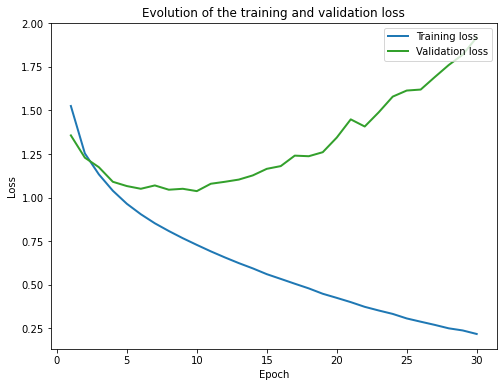

Accuracy of the network on the 40000 train images: 78.28 %
Accuracy of the network on the 10000 validation images: 64.88 %
Accuracy of the network on the 10000 test images: 64.47 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.17 took: 1.19s
Epoch 1, 20% 	 train_loss: 1.98 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.88 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.82 took: 0.98s
Epoch 1, 50% 	 train_loss: 1.77 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.72 took: 0.98s
Epoch 1, 70% 	 train_loss: 1.68 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.67 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.61 took: 1.04s
Validation loss = 1.58
Epoch 2, 10% 	 train_loss: 1.54 took: 1.15s
Epoch 2, 20% 	 train_loss: 1.54 took: 0.95s
Epoch 2, 30% 	 train_loss: 1.48 took: 1.03s
Epoch 2, 40% 	 train_loss: 1.49 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.4

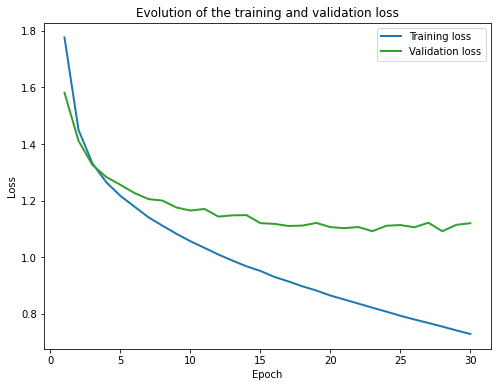

Accuracy of the network on the 40000 train images: 76.03 %
Accuracy of the network on the 10000 validation images: 62.76 %
Accuracy of the network on the 10000 test images: 62.79 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.07s
Epoch 1, 20% 	 train_loss: 1.67 took: 0.82s
Epoch 1, 30% 	 train_loss: 1.56 took: 0.81s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.89s
Epoch 1, 50% 	 train_loss: 1.41 took: 0.83s
Epoch 1, 60% 	 train_loss: 1.41 took: 0.83s
Epoch 1, 70% 	 train_loss: 1.36 took: 0.85s
Epoch 1, 80% 	 train_loss: 1.30 took: 0.84s
Epoch 1, 90% 	 train_loss: 1.30 took: 0.82s
Validation loss = 1.26
Epoch 2, 10% 	 train_loss: 1.19 took: 1.12s
Epoch 2, 20% 	 train_loss: 1.18 took: 0.84s
Epoch 2, 30% 	 train_loss: 1.19 took: 0.82s
Epoch 2, 40% 	 train_loss: 1.18 took: 0.88s
Epoch 2, 50% 	 train_loss: 1.17 

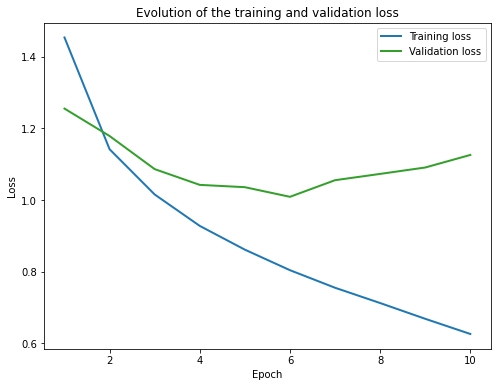

Accuracy of the network on the 40000 train images: 75.99 %
Accuracy of the network on the 10000 validation images: 65.76 %
Accuracy of the network on the 10000 test images: 64.98 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.00 took: 1.07s
Epoch 1, 20% 	 train_loss: 1.77 took: 0.80s
Epoch 1, 30% 	 train_loss: 1.65 took: 0.86s
Epoch 1, 40% 	 train_loss: 1.55 took: 0.86s
Epoch 1, 50% 	 train_loss: 1.51 took: 0.92s
Epoch 1, 60% 	 train_loss: 1.46 took: 0.85s
Epoch 1, 70% 	 train_loss: 1.45 took: 0.85s
Epoch 1, 80% 	 train_loss: 1.40 took: 0.90s
Epoch 1, 90% 	 train_loss: 1.39 took: 0.90s
Validation loss = 1.39
Epoch 2, 10% 	 train_loss: 1.31 took: 1.05s
Epoch 2, 20% 	 train_loss: 1.32 took: 0.83s
Epoch 2, 30% 	 train_loss: 1.30 took: 0.83s
Epoch 2, 40% 	 train_loss: 1.26 took: 0.82s
Epoch 2, 50% 	 train_loss: 1.2

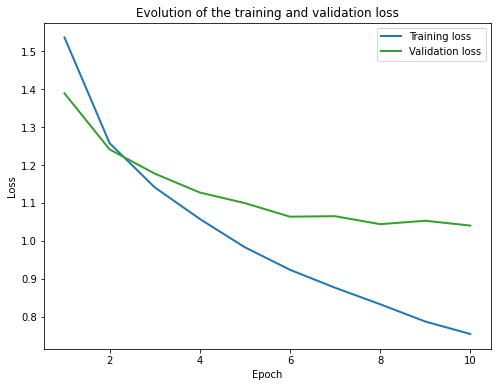

Accuracy of the network on the 40000 train images: 76.86 %
Accuracy of the network on the 10000 validation images: 64.77 %
Accuracy of the network on the 10000 test images: 64.47 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.20 took: 1.07s
Epoch 1, 20% 	 train_loss: 2.00 took: 0.81s
Epoch 1, 30% 	 train_loss: 1.87 took: 0.82s
Epoch 1, 40% 	 train_loss: 1.81 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.79 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.75 took: 0.83s
Epoch 1, 70% 	 train_loss: 1.72 took: 0.88s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.84s
Epoch 1, 90% 	 train_loss: 1.65 took: 0.83s
Validation loss = 1.61
Epoch 2, 10% 	 train_loss: 1.56 took: 1.05s
Epoch 2, 20% 	 train_loss: 1.55 took: 0.95s
Epoch 2, 30% 	 train_loss: 1.54 took: 0.81s
Epoch 2, 40% 	 train_loss: 1.53 took: 0.84s
Epoch 2, 50% 	 train_loss: 1.5

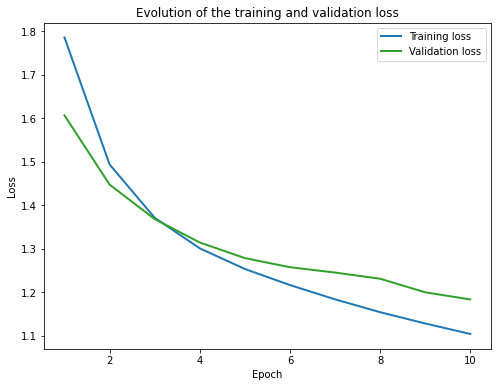

Accuracy of the network on the 40000 train images: 63.17 %
Accuracy of the network on the 10000 validation images: 58.50 %
Accuracy of the network on the 10000 test images: 57.77 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.96 took: 1.13s
Epoch 1, 20% 	 train_loss: 1.67 took: 0.83s
Epoch 1, 30% 	 train_loss: 1.56 took: 0.88s
Epoch 1, 40% 	 train_loss: 1.52 took: 0.86s
Epoch 1, 50% 	 train_loss: 1.45 took: 0.86s
Epoch 1, 60% 	 train_loss: 1.40 took: 0.84s
Epoch 1, 70% 	 train_loss: 1.39 took: 0.87s
Epoch 1, 80% 	 train_loss: 1.34 took: 0.88s
Epoch 1, 90% 	 train_loss: 1.33 took: 0.85s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.25 took: 1.10s
Epoch 2, 20% 	 train_loss: 1.26 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.21 took: 0.82s
Epoch 2, 40% 	 train_loss: 1.24 took: 0.85s
Epoch 2, 50% 	 train_loss: 1.19 

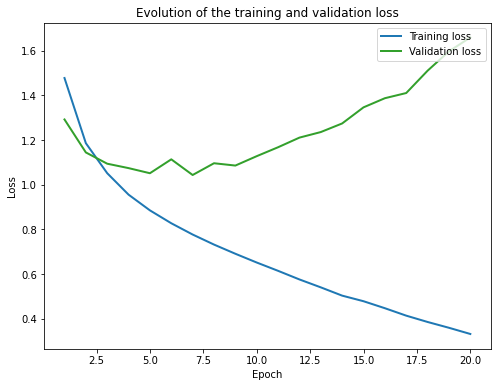

Accuracy of the network on the 40000 train images: 76.37 %
Accuracy of the network on the 10000 validation images: 64.93 %
Accuracy of the network on the 10000 test images: 64.28 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.04 took: 1.08s
Epoch 1, 20% 	 train_loss: 1.76 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.61 took: 0.88s
Epoch 1, 40% 	 train_loss: 1.54 took: 0.85s
Epoch 1, 50% 	 train_loss: 1.48 took: 0.88s
Epoch 1, 60% 	 train_loss: 1.45 took: 0.85s
Epoch 1, 70% 	 train_loss: 1.42 took: 0.98s
Epoch 1, 80% 	 train_loss: 1.39 took: 1.01s
Epoch 1, 90% 	 train_loss: 1.33 took: 0.96s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.30 took: 1.08s
Epoch 2, 20% 	 train_loss: 1.32 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.32 took: 0.85s
Epoch 2, 40% 	 train_loss: 1.28 took: 0.87s
Epoch 2, 50% 	 train_loss: 1.2

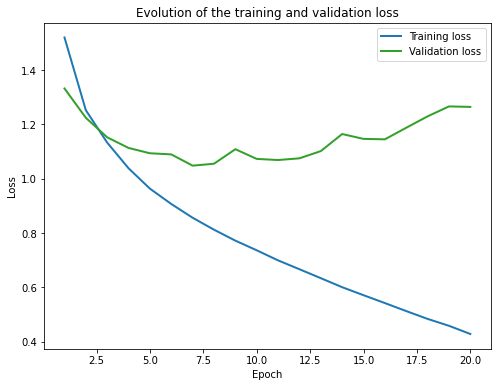

Accuracy of the network on the 40000 train images: 72.96 %
Accuracy of the network on the 10000 validation images: 63.68 %
Accuracy of the network on the 10000 test images: 63.30 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.20 took: 1.09s
Epoch 1, 20% 	 train_loss: 1.98 took: 0.85s
Epoch 1, 30% 	 train_loss: 1.87 took: 0.93s
Epoch 1, 40% 	 train_loss: 1.80 took: 0.93s
Epoch 1, 50% 	 train_loss: 1.77 took: 0.89s
Epoch 1, 60% 	 train_loss: 1.70 took: 0.87s
Epoch 1, 70% 	 train_loss: 1.65 took: 0.88s
Epoch 1, 80% 	 train_loss: 1.63 took: 0.99s
Epoch 1, 90% 	 train_loss: 1.60 took: 0.90s
Validation loss = 1.56
Epoch 2, 10% 	 train_loss: 1.53 took: 1.29s
Epoch 2, 20% 	 train_loss: 1.53 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.51 took: 0.91s
Epoch 2, 40% 	 train_loss: 1.49 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.4

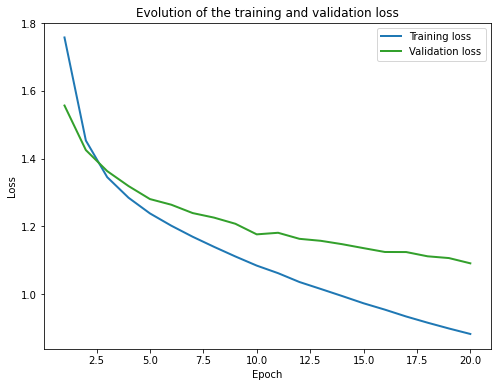

Accuracy of the network on the 40000 train images: 71.17 %
Accuracy of the network on the 10000 validation images: 62.53 %
Accuracy of the network on the 10000 test images: 62.44 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.99 took: 1.10s
Epoch 1, 20% 	 train_loss: 1.65 took: 0.85s
Epoch 1, 30% 	 train_loss: 1.55 took: 0.86s
Epoch 1, 40% 	 train_loss: 1.49 took: 0.85s
Epoch 1, 50% 	 train_loss: 1.47 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.39 took: 0.85s
Epoch 1, 70% 	 train_loss: 1.37 took: 0.84s
Epoch 1, 80% 	 train_loss: 1.34 took: 0.87s
Epoch 1, 90% 	 train_loss: 1.35 took: 1.00s
Validation loss = 1.30
Epoch 2, 10% 	 train_loss: 1.24 took: 1.21s
Epoch 2, 20% 	 train_loss: 1.24 took: 0.89s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.90s
Epoch 2, 40% 	 train_loss: 1.17 took: 0.88s
Epoch 2, 50% 	 train_loss: 1.18 

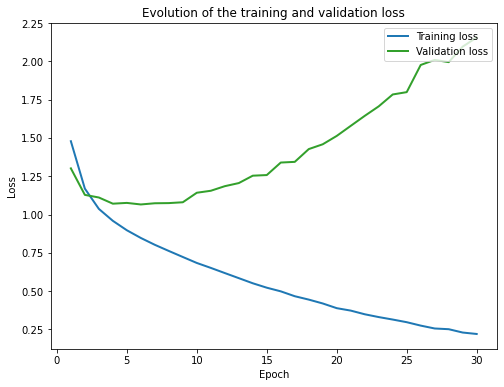

Accuracy of the network on the 40000 train images: 73.03 %
Accuracy of the network on the 10000 validation images: 63.71 %
Accuracy of the network on the 10000 test images: 64.01 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.01 took: 1.15s
Epoch 1, 20% 	 train_loss: 1.73 took: 0.93s
Epoch 1, 30% 	 train_loss: 1.61 took: 0.91s
Epoch 1, 40% 	 train_loss: 1.54 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.48 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.46 took: 0.87s
Epoch 1, 70% 	 train_loss: 1.44 took: 0.82s
Epoch 1, 80% 	 train_loss: 1.37 took: 0.86s
Epoch 1, 90% 	 train_loss: 1.38 took: 0.87s
Validation loss = 1.35
Epoch 2, 10% 	 train_loss: 1.29 took: 1.10s
Epoch 2, 20% 	 train_loss: 1.29 took: 0.84s
Epoch 2, 30% 	 train_loss: 1.25 took: 0.96s
Epoch 2, 40% 	 train_loss: 1.25 took: 0.83s
Epoch 2, 50% 	 train_loss: 1.2

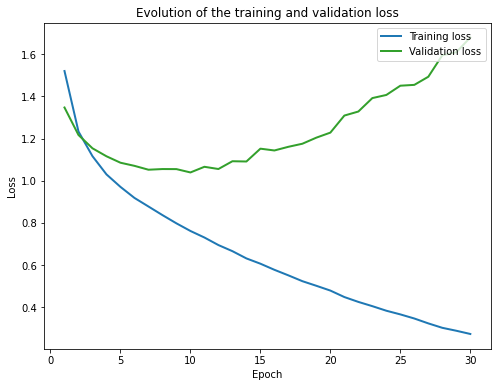

Accuracy of the network on the 40000 train images: 76.69 %
Accuracy of the network on the 10000 validation images: 65.18 %
Accuracy of the network on the 10000 test images: 64.82 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.21 took: 1.10s
Epoch 1, 20% 	 train_loss: 2.02 took: 0.87s
Epoch 1, 30% 	 train_loss: 1.90 took: 0.88s
Epoch 1, 40% 	 train_loss: 1.83 took: 0.88s
Epoch 1, 50% 	 train_loss: 1.75 took: 0.87s
Epoch 1, 60% 	 train_loss: 1.71 took: 0.87s
Epoch 1, 70% 	 train_loss: 1.66 took: 0.84s
Epoch 1, 80% 	 train_loss: 1.62 took: 0.93s
Epoch 1, 90% 	 train_loss: 1.62 took: 0.86s
Validation loss = 1.59
Epoch 2, 10% 	 train_loss: 1.55 took: 1.09s
Epoch 2, 20% 	 train_loss: 1.54 took: 0.86s
Epoch 2, 30% 	 train_loss: 1.53 took: 0.83s
Epoch 2, 40% 	 train_loss: 1.51 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.5

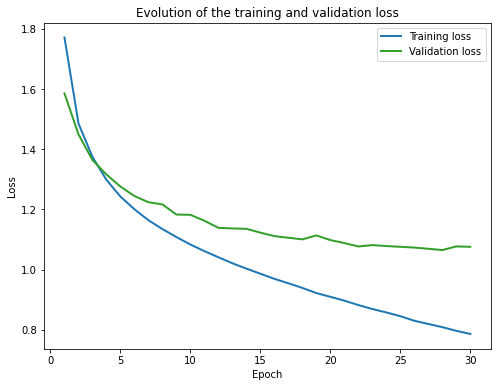

Accuracy of the network on the 40000 train images: 73.99 %
Accuracy of the network on the 10000 validation images: 63.58 %
Accuracy of the network on the 10000 test images: 63.62 %


In [ ]:
batch_size_param = [16,32,48]
n_epochs_param = [10,20,30]
learning_rate_param = [0.001,0.0005,0.0001]

for batch_size in batch_size_param:
  for n_epochs in n_epochs_param:
    for learning_rate in learning_rate_param:
      print('\n\n############################################################ batch_size={} || n_epochs={} || learning_rate={}'.format(batch_size, n_epochs,learning_rate))
      net = MyConvolutionalNetwork2()
      train_history, val_history = train(net, batch_size=batch_size, n_epochs=n_epochs, learning_rate=learning_rate)
      plot_losses(train_history, val_history)
      compute_accuracy(net)


**In this set of test, we've got the best score 65,35% on the test dataset with the hyperparameter configuration of "*batch_size=16*, *n_epochs=20*, *learning_rate=0.0005*", while its score on the validation dataset is relatively low. The second best score 65,30% on the test dataset, quite close to the best one, but the best score 66,63% on the validation dataset with the hyperparameter configuration "*batch_size=32*, *n_epochs=20*, *learning_rate=0.001*"**

**The following illustrates the loss evolution curves when training the best scoring model**

Text(0.5, 1.0, 'Evolution of the training and validation loss')

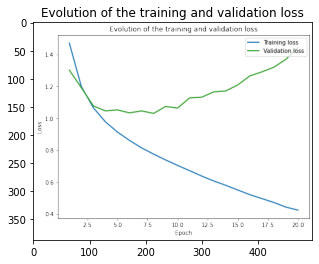

In [ ]:
# im=plt.imread('single convolutional layer #2.png') 
# plt.imshow(im)
# plt.title('Evolution of the training and validation loss')

## single convolutional layer #3



NN properties:
<br> 


1.   kernel size = 5
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)
3.   number of convolutional layers = 1
4.   size of fully connected layers (nn.linear) = flattened_size -> 100 -> 20


In [ ]:
out_size = get_output_size(in_size=32, kernel_size=5, stride=1, padding=1)
print(out_size)

30


In [ ]:
class MyConvolutionalNetwork2(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 15 * 15
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 100)
        self.fc2 = nn.Linear(100, 20)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x30x30
        x = F.relu(self.conv1(x))
        # 18x30x30 -> 18x15x15
        x = self.pool(x)
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x15x15 -> 4500
        x = x.view(-1, self.flattened_size)
        # 4500 -> 100
        x = F.relu(self.fc1(x))
        # 100 -> 20
        x = self.fc2(x)
        return x



############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.92 took: 1.72s
Epoch 1, 20% 	 train_loss: 1.61 took: 1.36s
Epoch 1, 30% 	 train_loss: 1.52 took: 1.38s
Epoch 1, 40% 	 train_loss: 1.45 took: 1.39s
Epoch 1, 50% 	 train_loss: 1.43 took: 1.35s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.36s
Epoch 1, 70% 	 train_loss: 1.35 took: 1.38s
Epoch 1, 80% 	 train_loss: 1.31 took: 1.32s
Epoch 1, 90% 	 train_loss: 1.27 took: 1.36s
Validation loss = 1.23
Epoch 2, 10% 	 train_loss: 1.18 took: 1.50s
Epoch 2, 20% 	 train_loss: 1.16 took: 1.38s
Epoch 2, 30% 	 train_loss: 1.14 took: 1.41s
Epoch 2, 40% 	 train_loss: 1.15 took: 1.37s
Epoch 2, 50% 	 train_loss: 1.14 took: 1.38s
Epoch 2, 60% 	 train_loss: 1.12 took: 1.38s
Epoch 2, 70% 	 train_loss: 1.12 took: 1.40s
Epoch 2, 80% 	 train_loss: 1.12 took: 1.40s
Epoch 2, 90% 	 train_loss: 1.09 took:

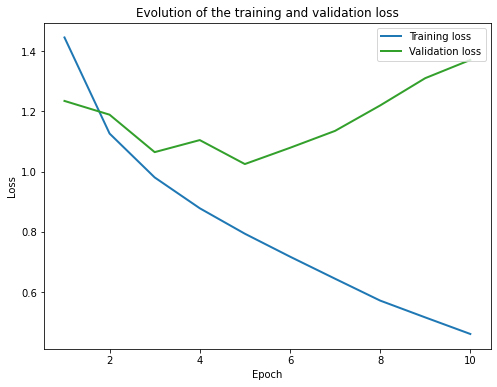

Accuracy of the network on the 40000 train images: 77.73 %
Accuracy of the network on the 10000 validation images: 64.70 %
Accuracy of the network on the 10000 test images: 63.68 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.99 took: 1.58s
Epoch 1, 20% 	 train_loss: 1.68 took: 1.39s
Epoch 1, 30% 	 train_loss: 1.54 took: 1.41s
Epoch 1, 40% 	 train_loss: 1.50 took: 1.45s
Epoch 1, 50% 	 train_loss: 1.42 took: 1.43s
Epoch 1, 60% 	 train_loss: 1.42 took: 1.43s
Epoch 1, 70% 	 train_loss: 1.36 took: 1.45s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.43s
Epoch 1, 90% 	 train_loss: 1.34 took: 1.40s
Validation loss = 1.30
Epoch 2, 10% 	 train_loss: 1.26 took: 1.56s
Epoch 2, 20% 	 train_loss: 1.26 took: 1.40s
Epoch 2, 30% 	 train_loss: 1.25 took: 1.43s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.41s
Epoch 2, 50% 	 train_loss: 1.2

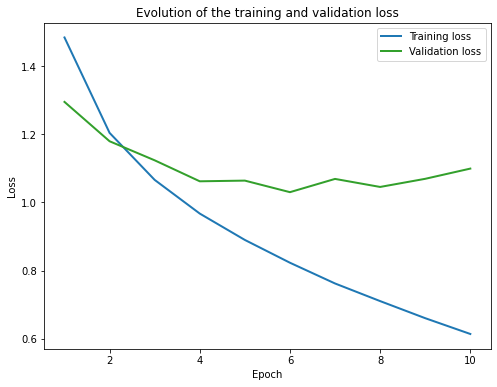

Accuracy of the network on the 40000 train images: 74.83 %
Accuracy of the network on the 10000 validation images: 64.24 %
Accuracy of the network on the 10000 test images: 63.94 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.18 took: 1.60s
Epoch 1, 20% 	 train_loss: 1.86 took: 1.45s
Epoch 1, 30% 	 train_loss: 1.76 took: 1.50s
Epoch 1, 40% 	 train_loss: 1.70 took: 1.46s
Epoch 1, 50% 	 train_loss: 1.62 took: 1.44s
Epoch 1, 60% 	 train_loss: 1.59 took: 1.47s
Epoch 1, 70% 	 train_loss: 1.57 took: 1.44s
Epoch 1, 80% 	 train_loss: 1.52 took: 1.46s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.43s
Validation loss = 1.47
Epoch 2, 10% 	 train_loss: 1.46 took: 1.59s
Epoch 2, 20% 	 train_loss: 1.41 took: 1.45s
Epoch 2, 30% 	 train_loss: 1.41 took: 1.42s
Epoch 2, 40% 	 train_loss: 1.39 took: 1.45s
Epoch 2, 50% 	 train_loss: 1.4

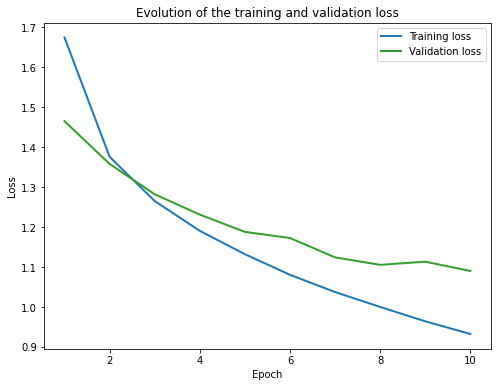

Accuracy of the network on the 40000 train images: 68.93 %
Accuracy of the network on the 10000 validation images: 62.47 %
Accuracy of the network on the 10000 test images: 61.63 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.90 took: 1.71s
Epoch 1, 20% 	 train_loss: 1.58 took: 1.51s
Epoch 1, 30% 	 train_loss: 1.47 took: 1.52s
Epoch 1, 40% 	 train_loss: 1.42 took: 1.46s
Epoch 1, 50% 	 train_loss: 1.43 took: 1.51s
Epoch 1, 60% 	 train_loss: 1.31 took: 1.47s
Epoch 1, 70% 	 train_loss: 1.35 took: 1.50s
Epoch 1, 80% 	 train_loss: 1.28 took: 1.48s
Epoch 1, 90% 	 train_loss: 1.25 took: 1.45s
Validation loss = 1.21
Epoch 2, 10% 	 train_loss: 1.16 took: 1.53s
Epoch 2, 20% 	 train_loss: 1.13 took: 1.38s
Epoch 2, 30% 	 train_loss: 1.12 took: 1.38s
Epoch 2, 40% 	 train_loss: 1.10 took: 1.40s
Epoch 2, 50% 	 train_loss: 1.12 

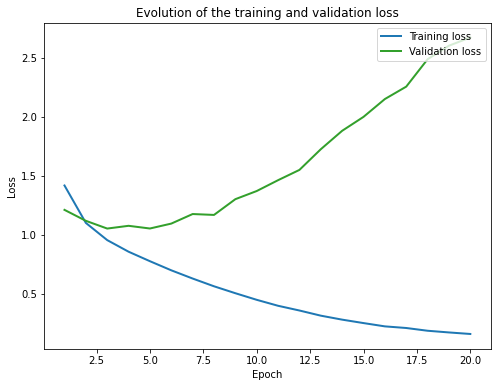

Accuracy of the network on the 40000 train images: 71.07 %
Accuracy of the network on the 10000 validation images: 63.55 %
Accuracy of the network on the 10000 test images: 62.71 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.95 took: 1.46s
Epoch 1, 20% 	 train_loss: 1.62 took: 1.30s
Epoch 1, 30% 	 train_loss: 1.52 took: 1.29s
Epoch 1, 40% 	 train_loss: 1.46 took: 1.29s
Epoch 1, 50% 	 train_loss: 1.40 took: 1.31s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.32s
Epoch 1, 70% 	 train_loss: 1.35 took: 1.33s
Epoch 1, 80% 	 train_loss: 1.36 took: 1.31s
Epoch 1, 90% 	 train_loss: 1.30 took: 1.38s
Validation loss = 1.30
Epoch 2, 10% 	 train_loss: 1.22 took: 1.51s
Epoch 2, 20% 	 train_loss: 1.21 took: 1.32s
Epoch 2, 30% 	 train_loss: 1.20 took: 1.35s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.32s
Epoch 2, 50% 	 train_loss: 1.1

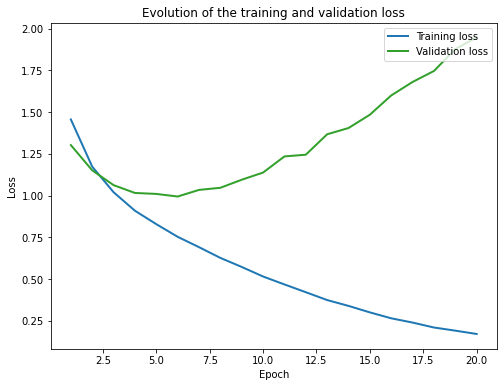

Accuracy of the network on the 40000 train images: 78.32 %
Accuracy of the network on the 10000 validation images: 66.15 %
Accuracy of the network on the 10000 test images: 65.59 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.23 took: 1.48s
Epoch 1, 20% 	 train_loss: 1.89 took: 1.38s
Epoch 1, 30% 	 train_loss: 1.81 took: 1.32s
Epoch 1, 40% 	 train_loss: 1.73 took: 1.35s
Epoch 1, 50% 	 train_loss: 1.67 took: 1.37s
Epoch 1, 60% 	 train_loss: 1.66 took: 1.31s
Epoch 1, 70% 	 train_loss: 1.60 took: 1.31s
Epoch 1, 80% 	 train_loss: 1.58 took: 1.31s
Epoch 1, 90% 	 train_loss: 1.57 took: 1.29s
Validation loss = 1.52
Epoch 2, 10% 	 train_loss: 1.49 took: 1.46s
Epoch 2, 20% 	 train_loss: 1.46 took: 1.31s
Epoch 2, 30% 	 train_loss: 1.44 took: 1.30s
Epoch 2, 40% 	 train_loss: 1.45 took: 1.29s
Epoch 2, 50% 	 train_loss: 1.4

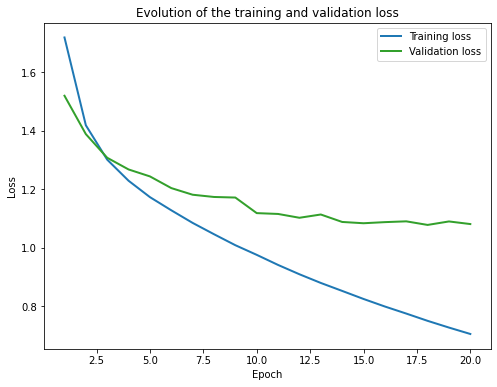

Accuracy of the network on the 40000 train images: 76.53 %
Accuracy of the network on the 10000 validation images: 64.00 %
Accuracy of the network on the 10000 test images: 64.21 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.87 took: 1.44s
Epoch 1, 20% 	 train_loss: 1.55 took: 1.31s
Epoch 1, 30% 	 train_loss: 1.46 took: 1.29s
Epoch 1, 40% 	 train_loss: 1.42 took: 1.30s
Epoch 1, 50% 	 train_loss: 1.38 took: 1.33s
Epoch 1, 60% 	 train_loss: 1.36 took: 1.30s
Epoch 1, 70% 	 train_loss: 1.33 took: 1.29s
Epoch 1, 80% 	 train_loss: 1.32 took: 1.29s
Epoch 1, 90% 	 train_loss: 1.26 took: 1.30s
Validation loss = 1.24
Epoch 2, 10% 	 train_loss: 1.16 took: 1.44s
Epoch 2, 20% 	 train_loss: 1.16 took: 1.34s
Epoch 2, 30% 	 train_loss: 1.15 took: 1.32s
Epoch 2, 40% 	 train_loss: 1.13 took: 1.30s
Epoch 2, 50% 	 train_loss: 1.14 

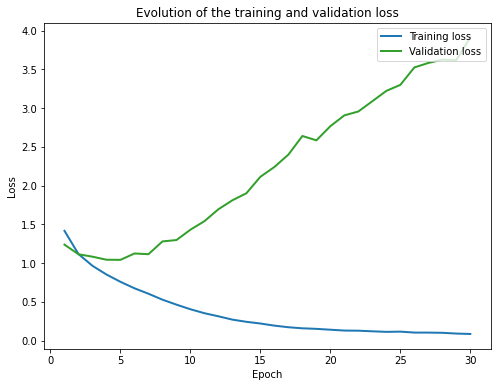

Accuracy of the network on the 40000 train images: 78.97 %
Accuracy of the network on the 10000 validation images: 65.28 %
Accuracy of the network on the 10000 test images: 64.42 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 1.98 took: 1.47s
Epoch 1, 20% 	 train_loss: 1.69 took: 1.31s
Epoch 1, 30% 	 train_loss: 1.51 took: 1.30s
Epoch 1, 40% 	 train_loss: 1.48 took: 1.31s
Epoch 1, 50% 	 train_loss: 1.40 took: 1.29s
Epoch 1, 60% 	 train_loss: 1.40 took: 1.30s
Epoch 1, 70% 	 train_loss: 1.34 took: 1.30s
Epoch 1, 80% 	 train_loss: 1.31 took: 1.30s
Epoch 1, 90% 	 train_loss: 1.27 took: 1.32s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.18 took: 1.44s
Epoch 2, 20% 	 train_loss: 1.19 took: 1.29s
Epoch 2, 30% 	 train_loss: 1.18 took: 1.30s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.28s
Epoch 2, 50% 	 train_loss: 1.1

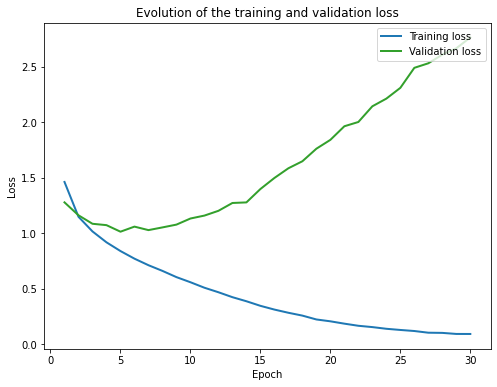

Accuracy of the network on the 40000 train images: 74.69 %
Accuracy of the network on the 10000 validation images: 65.51 %
Accuracy of the network on the 10000 test images: 64.87 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.17 took: 1.47s
Epoch 1, 20% 	 train_loss: 1.90 took: 1.31s
Epoch 1, 30% 	 train_loss: 1.78 took: 1.32s
Epoch 1, 40% 	 train_loss: 1.74 took: 1.31s
Epoch 1, 50% 	 train_loss: 1.69 took: 1.31s
Epoch 1, 60% 	 train_loss: 1.68 took: 1.31s
Epoch 1, 70% 	 train_loss: 1.62 took: 1.31s
Epoch 1, 80% 	 train_loss: 1.60 took: 1.37s
Epoch 1, 90% 	 train_loss: 1.58 took: 1.30s
Validation loss = 1.55
Epoch 2, 10% 	 train_loss: 1.51 took: 1.46s
Epoch 2, 20% 	 train_loss: 1.49 took: 1.29s
Epoch 2, 30% 	 train_loss: 1.44 took: 1.29s
Epoch 2, 40% 	 train_loss: 1.44 took: 1.32s
Epoch 2, 50% 	 train_loss: 1.4

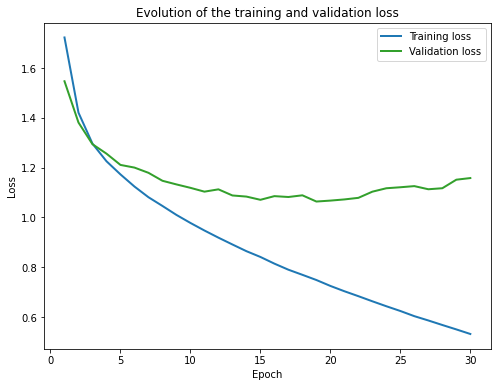

Accuracy of the network on the 40000 train images: 76.68 %
Accuracy of the network on the 10000 validation images: 63.96 %
Accuracy of the network on the 10000 test images: 63.28 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.00 took: 1.14s
Epoch 1, 20% 	 train_loss: 1.66 took: 0.94s
Epoch 1, 30% 	 train_loss: 1.54 took: 0.93s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.38 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.35 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.31 took: 0.94s
Epoch 1, 90% 	 train_loss: 1.28 took: 0.95s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.17 took: 1.12s
Epoch 2, 20% 	 train_loss: 1.15 took: 0.93s
Epoch 2, 30% 	 train_loss: 1.14 took: 0.97s
Epoch 2, 40% 	 train_loss: 1.17 took: 0.94s
Epoch 2, 50% 	 train_loss: 1.12 

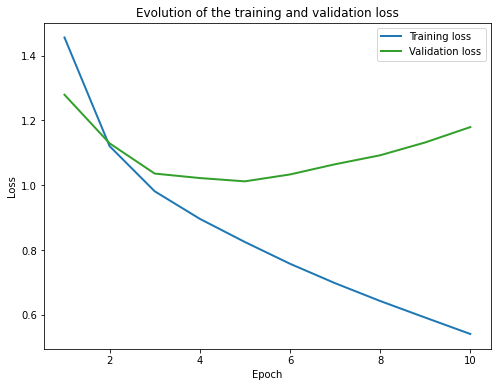

Accuracy of the network on the 40000 train images: 76.29 %
Accuracy of the network on the 10000 validation images: 65.33 %
Accuracy of the network on the 10000 test images: 65.03 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.01 took: 1.11s
Epoch 1, 20% 	 train_loss: 1.69 took: 0.94s
Epoch 1, 30% 	 train_loss: 1.57 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.54 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.48 took: 0.95s
Epoch 1, 60% 	 train_loss: 1.41 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.38 took: 0.97s
Epoch 1, 80% 	 train_loss: 1.40 took: 0.94s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.02s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.26 took: 1.14s
Epoch 2, 20% 	 train_loss: 1.23 took: 0.94s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.94s
Epoch 2, 40% 	 train_loss: 1.25 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.2

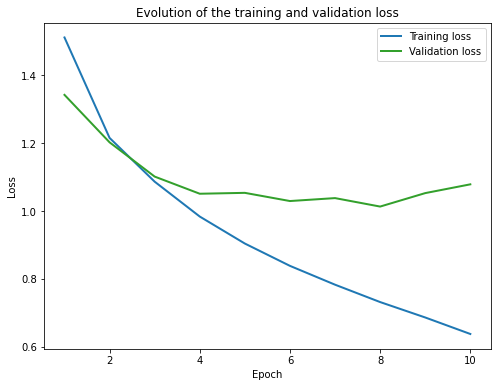

Accuracy of the network on the 40000 train images: 77.28 %
Accuracy of the network on the 10000 validation images: 65.40 %
Accuracy of the network on the 10000 test images: 64.44 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.30 took: 1.11s
Epoch 1, 20% 	 train_loss: 1.94 took: 0.94s
Epoch 1, 30% 	 train_loss: 1.84 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.80 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.74 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.67 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.64 took: 0.94s
Epoch 1, 80% 	 train_loss: 1.63 took: 0.96s
Epoch 1, 90% 	 train_loss: 1.59 took: 0.93s
Validation loss = 1.57
Epoch 2, 10% 	 train_loss: 1.53 took: 1.11s
Epoch 2, 20% 	 train_loss: 1.52 took: 0.98s
Epoch 2, 30% 	 train_loss: 1.49 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.50 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.4

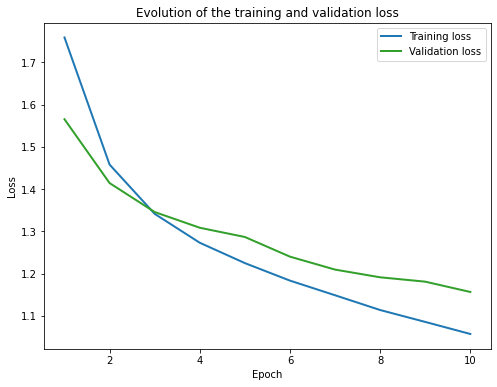

Accuracy of the network on the 40000 train images: 64.79 %
Accuracy of the network on the 10000 validation images: 59.15 %
Accuracy of the network on the 10000 test images: 59.42 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.13s
Epoch 1, 20% 	 train_loss: 1.64 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.54 took: 0.94s
Epoch 1, 40% 	 train_loss: 1.44 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.38 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.40 took: 0.94s
Epoch 1, 80% 	 train_loss: 1.35 took: 0.95s
Epoch 1, 90% 	 train_loss: 1.32 took: 0.95s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.21 took: 1.11s
Epoch 2, 20% 	 train_loss: 1.21 took: 0.98s
Epoch 2, 30% 	 train_loss: 1.17 took: 0.94s
Epoch 2, 40% 	 train_loss: 1.18 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.15 

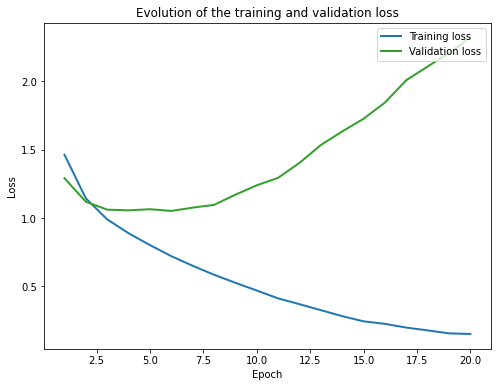

Accuracy of the network on the 40000 train images: 78.92 %
Accuracy of the network on the 10000 validation images: 65.48 %
Accuracy of the network on the 10000 test images: 64.84 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.05 took: 1.11s
Epoch 1, 20% 	 train_loss: 1.72 took: 0.94s
Epoch 1, 30% 	 train_loss: 1.59 took: 0.93s
Epoch 1, 40% 	 train_loss: 1.53 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.49 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.45 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.43 took: 0.93s
Epoch 1, 80% 	 train_loss: 1.38 took: 0.94s
Epoch 1, 90% 	 train_loss: 1.40 took: 0.95s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.27 took: 1.13s
Epoch 2, 20% 	 train_loss: 1.27 took: 0.97s
Epoch 2, 30% 	 train_loss: 1.28 took: 0.98s
Epoch 2, 40% 	 train_loss: 1.29 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.2

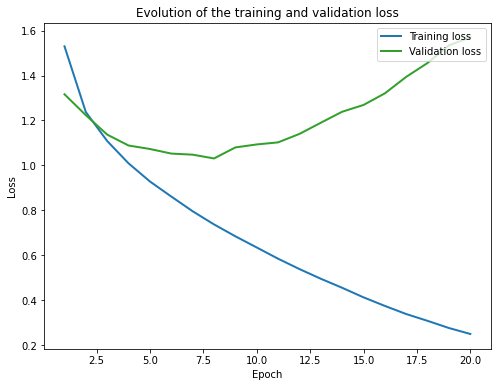

Accuracy of the network on the 40000 train images: 78.45 %
Accuracy of the network on the 10000 validation images: 64.91 %
Accuracy of the network on the 10000 test images: 65.27 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.29 took: 1.52s
Epoch 1, 20% 	 train_loss: 1.93 took: 0.92s
Epoch 1, 30% 	 train_loss: 1.85 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.79 took: 0.93s
Epoch 1, 50% 	 train_loss: 1.73 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.67 took: 0.93s
Epoch 1, 70% 	 train_loss: 1.65 took: 0.96s
Epoch 1, 80% 	 train_loss: 1.63 took: 0.94s
Epoch 1, 90% 	 train_loss: 1.58 took: 0.98s
Validation loss = 1.55
Epoch 2, 10% 	 train_loss: 1.53 took: 1.13s
Epoch 2, 20% 	 train_loss: 1.50 took: 0.96s
Epoch 2, 30% 	 train_loss: 1.47 took: 0.94s
Epoch 2, 40% 	 train_loss: 1.48 took: 0.94s
Epoch 2, 50% 	 train_loss: 1.4

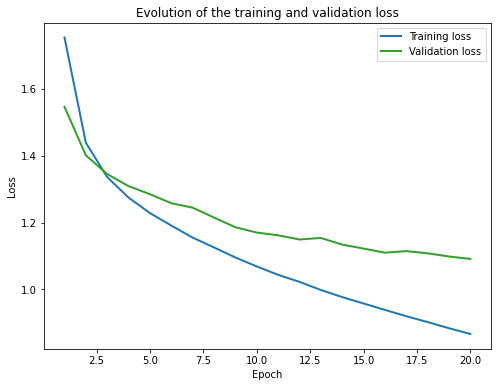

Accuracy of the network on the 40000 train images: 71.75 %
Accuracy of the network on the 10000 validation images: 62.85 %
Accuracy of the network on the 10000 test images: 62.54 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.99 took: 1.11s
Epoch 1, 20% 	 train_loss: 1.64 took: 0.92s
Epoch 1, 30% 	 train_loss: 1.50 took: 0.95s
Epoch 1, 40% 	 train_loss: 1.45 took: 0.93s
Epoch 1, 50% 	 train_loss: 1.40 took: 0.98s
Epoch 1, 60% 	 train_loss: 1.40 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.35 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.31 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.28 took: 0.94s
Validation loss = 1.24
Epoch 2, 10% 	 train_loss: 1.20 took: 1.11s
Epoch 2, 20% 	 train_loss: 1.19 took: 0.95s
Epoch 2, 30% 	 train_loss: 1.19 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.15 took: 0.96s
Epoch 2, 50% 	 train_loss: 1.17 

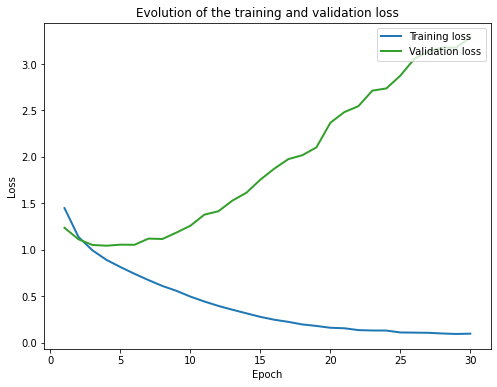

Accuracy of the network on the 40000 train images: 73.12 %
Accuracy of the network on the 10000 validation images: 64.61 %
Accuracy of the network on the 10000 test images: 63.95 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.03 took: 1.13s
Epoch 1, 20% 	 train_loss: 1.72 took: 0.97s
Epoch 1, 30% 	 train_loss: 1.58 took: 0.98s
Epoch 1, 40% 	 train_loss: 1.54 took: 0.96s
Epoch 1, 50% 	 train_loss: 1.48 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.44 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.37 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.37 took: 0.96s
Epoch 1, 90% 	 train_loss: 1.36 took: 0.94s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.28 took: 1.13s
Epoch 2, 20% 	 train_loss: 1.25 took: 0.98s
Epoch 2, 30% 	 train_loss: 1.24 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.25 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.2

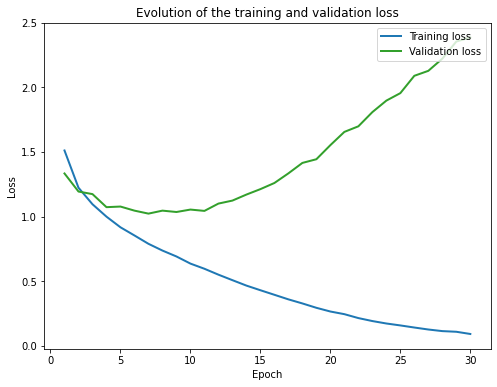

Accuracy of the network on the 40000 train images: 75.83 %
Accuracy of the network on the 10000 validation images: 64.63 %
Accuracy of the network on the 10000 test images: 65.01 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.32 took: 1.13s
Epoch 1, 20% 	 train_loss: 1.94 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.84 took: 0.97s
Epoch 1, 40% 	 train_loss: 1.78 took: 0.95s
Epoch 1, 50% 	 train_loss: 1.70 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.66 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.62 took: 0.94s
Epoch 1, 80% 	 train_loss: 1.60 took: 0.94s
Epoch 1, 90% 	 train_loss: 1.55 took: 0.94s
Validation loss = 1.52
Epoch 2, 10% 	 train_loss: 1.51 took: 1.12s
Epoch 2, 20% 	 train_loss: 1.49 took: 0.94s
Epoch 2, 30% 	 train_loss: 1.43 took: 0.95s
Epoch 2, 40% 	 train_loss: 1.45 took: 0.96s
Epoch 2, 50% 	 train_loss: 1.4

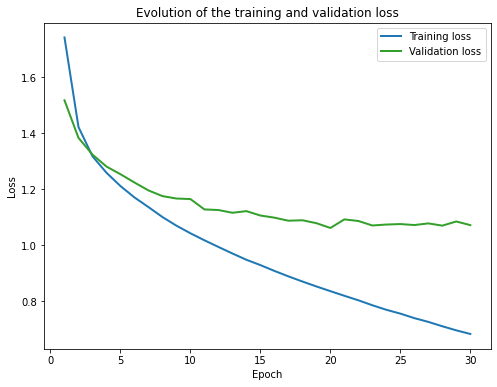

Accuracy of the network on the 40000 train images: 73.38 %
Accuracy of the network on the 10000 validation images: 63.46 %
Accuracy of the network on the 10000 test images: 63.76 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.98 took: 1.02s
Epoch 1, 20% 	 train_loss: 1.71 took: 0.80s
Epoch 1, 30% 	 train_loss: 1.59 took: 0.83s
Epoch 1, 40% 	 train_loss: 1.52 took: 0.83s
Epoch 1, 50% 	 train_loss: 1.44 took: 0.83s
Epoch 1, 60% 	 train_loss: 1.42 took: 0.81s
Epoch 1, 70% 	 train_loss: 1.41 took: 0.84s
Epoch 1, 80% 	 train_loss: 1.36 took: 0.85s
Epoch 1, 90% 	 train_loss: 1.35 took: 0.83s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.24 took: 1.02s
Epoch 2, 20% 	 train_loss: 1.26 took: 0.79s
Epoch 2, 30% 	 train_loss: 1.23 took: 0.82s
Epoch 2, 40% 	 train_loss: 1.21 took: 0.83s
Epoch 2, 50% 	 train_loss: 1.19 

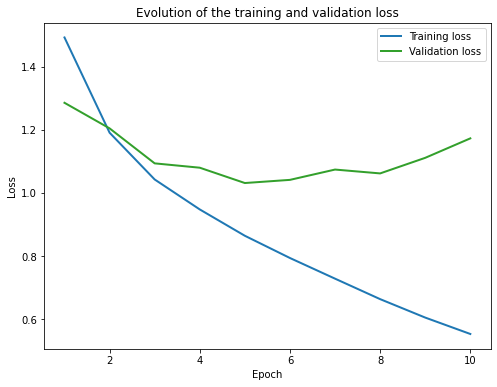

Accuracy of the network on the 40000 train images: 74.43 %
Accuracy of the network on the 10000 validation images: 64.52 %
Accuracy of the network on the 10000 test images: 63.94 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.10 took: 1.04s
Epoch 1, 20% 	 train_loss: 1.79 took: 0.83s
Epoch 1, 30% 	 train_loss: 1.64 took: 0.84s
Epoch 1, 40% 	 train_loss: 1.56 took: 0.84s
Epoch 1, 50% 	 train_loss: 1.53 took: 0.82s
Epoch 1, 60% 	 train_loss: 1.48 took: 0.81s
Epoch 1, 70% 	 train_loss: 1.41 took: 0.82s
Epoch 1, 80% 	 train_loss: 1.37 took: 0.84s
Epoch 1, 90% 	 train_loss: 1.40 took: 0.83s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.28 took: 1.03s
Epoch 2, 20% 	 train_loss: 1.28 took: 0.82s
Epoch 2, 30% 	 train_loss: 1.28 took: 0.83s
Epoch 2, 40% 	 train_loss: 1.29 took: 0.89s
Epoch 2, 50% 	 train_loss: 1.3

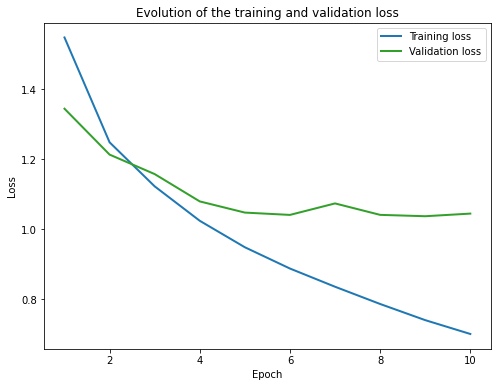

Accuracy of the network on the 40000 train images: 77.44 %
Accuracy of the network on the 10000 validation images: 65.26 %
Accuracy of the network on the 10000 test images: 64.71 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.45 took: 1.01s
Epoch 1, 20% 	 train_loss: 2.03 took: 0.83s
Epoch 1, 30% 	 train_loss: 1.92 took: 0.81s
Epoch 1, 40% 	 train_loss: 1.83 took: 0.82s
Epoch 1, 50% 	 train_loss: 1.76 took: 0.84s
Epoch 1, 60% 	 train_loss: 1.73 took: 0.80s
Epoch 1, 70% 	 train_loss: 1.69 took: 0.82s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.81s
Epoch 1, 90% 	 train_loss: 1.65 took: 0.86s
Validation loss = 1.62
Epoch 2, 10% 	 train_loss: 1.61 took: 1.02s
Epoch 2, 20% 	 train_loss: 1.59 took: 0.81s
Epoch 2, 30% 	 train_loss: 1.60 took: 0.83s
Epoch 2, 40% 	 train_loss: 1.52 took: 0.83s
Epoch 2, 50% 	 train_loss: 1.5

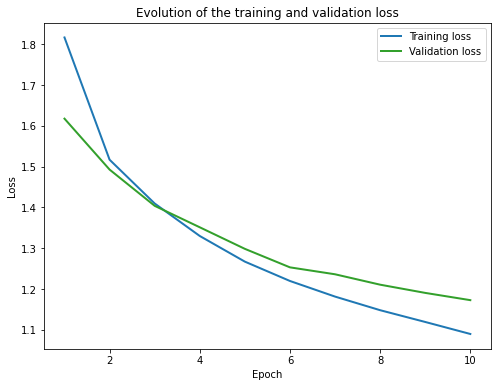

Accuracy of the network on the 40000 train images: 63.46 %
Accuracy of the network on the 10000 validation images: 59.51 %
Accuracy of the network on the 10000 test images: 59.29 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.03 took: 1.03s
Epoch 1, 20% 	 train_loss: 1.72 took: 0.80s
Epoch 1, 30% 	 train_loss: 1.57 took: 0.83s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.82s
Epoch 1, 50% 	 train_loss: 1.43 took: 0.82s
Epoch 1, 60% 	 train_loss: 1.40 took: 0.82s
Epoch 1, 70% 	 train_loss: 1.36 took: 0.82s
Epoch 1, 80% 	 train_loss: 1.38 took: 0.82s
Epoch 1, 90% 	 train_loss: 1.30 took: 0.86s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.24 took: 1.05s
Epoch 2, 20% 	 train_loss: 1.25 took: 0.84s
Epoch 2, 30% 	 train_loss: 1.25 took: 0.86s
Epoch 2, 40% 	 train_loss: 1.22 took: 0.83s
Epoch 2, 50% 	 train_loss: 1.17 

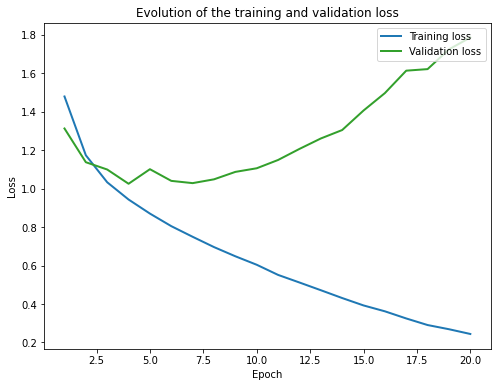

Accuracy of the network on the 40000 train images: 71.33 %
Accuracy of the network on the 10000 validation images: 64.50 %
Accuracy of the network on the 10000 test images: 64.15 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.09 took: 1.09s
Epoch 1, 20% 	 train_loss: 1.80 took: 0.89s
Epoch 1, 30% 	 train_loss: 1.70 took: 0.88s
Epoch 1, 40% 	 train_loss: 1.59 took: 0.86s
Epoch 1, 50% 	 train_loss: 1.49 took: 0.87s
Epoch 1, 60% 	 train_loss: 1.48 took: 0.86s
Epoch 1, 70% 	 train_loss: 1.44 took: 0.88s
Epoch 1, 80% 	 train_loss: 1.44 took: 0.90s
Epoch 1, 90% 	 train_loss: 1.41 took: 0.90s
Validation loss = 1.40
Epoch 2, 10% 	 train_loss: 1.32 took: 1.08s
Epoch 2, 20% 	 train_loss: 1.32 took: 0.90s
Epoch 2, 30% 	 train_loss: 1.29 took: 0.87s
Epoch 2, 40% 	 train_loss: 1.28 took: 0.86s
Epoch 2, 50% 	 train_loss: 1.2

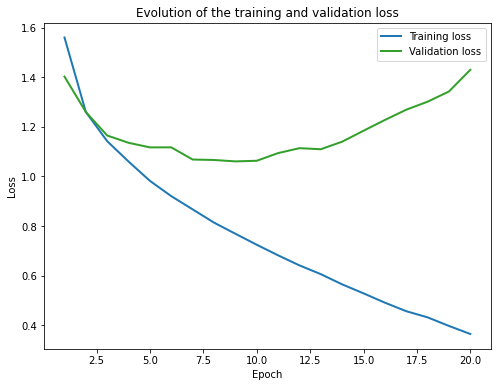

Accuracy of the network on the 40000 train images: 76.40 %
Accuracy of the network on the 10000 validation images: 63.69 %
Accuracy of the network on the 10000 test images: 64.50 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.50 took: 1.14s
Epoch 1, 20% 	 train_loss: 2.02 took: 0.93s
Epoch 1, 30% 	 train_loss: 1.91 took: 0.94s
Epoch 1, 40% 	 train_loss: 1.84 took: 0.91s
Epoch 1, 50% 	 train_loss: 1.81 took: 0.94s
Epoch 1, 60% 	 train_loss: 1.76 took: 0.92s
Epoch 1, 70% 	 train_loss: 1.71 took: 0.94s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.99s
Epoch 1, 90% 	 train_loss: 1.69 took: 0.92s
Validation loss = 1.62
Epoch 2, 10% 	 train_loss: 1.62 took: 1.12s
Epoch 2, 20% 	 train_loss: 1.56 took: 0.94s
Epoch 2, 30% 	 train_loss: 1.55 took: 0.91s
Epoch 2, 40% 	 train_loss: 1.53 took: 0.93s
Epoch 2, 50% 	 train_loss: 1.5

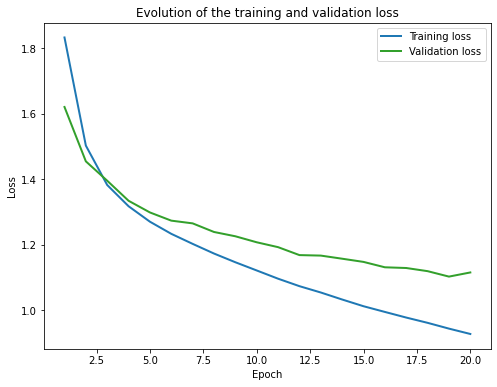

Accuracy of the network on the 40000 train images: 69.03 %
Accuracy of the network on the 10000 validation images: 61.93 %
Accuracy of the network on the 10000 test images: 62.15 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.00 took: 1.15s
Epoch 1, 20% 	 train_loss: 1.64 took: 0.95s
Epoch 1, 30% 	 train_loss: 1.53 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.48 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.40 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.39 took: 0.96s
Epoch 1, 70% 	 train_loss: 1.40 took: 0.95s
Epoch 1, 80% 	 train_loss: 1.34 took: 0.97s
Epoch 1, 90% 	 train_loss: 1.28 took: 0.95s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.19 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.16 took: 0.94s
Epoch 2, 30% 	 train_loss: 1.17 took: 0.97s
Epoch 2, 40% 	 train_loss: 1.18 took: 0.94s
Epoch 2, 50% 	 train_loss: 1.18 

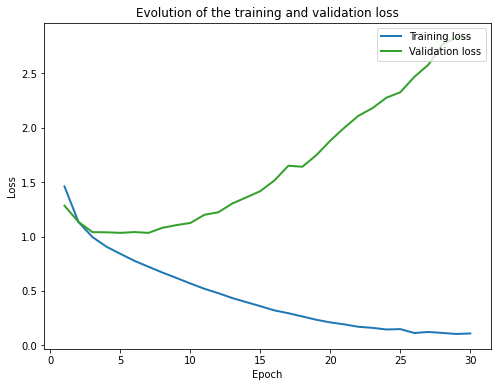

Accuracy of the network on the 40000 train images: 78.02 %
Accuracy of the network on the 10000 validation images: 65.83 %
Accuracy of the network on the 10000 test images: 65.44 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.07 took: 1.54s
Epoch 1, 20% 	 train_loss: 1.81 took: 0.93s
Epoch 1, 30% 	 train_loss: 1.67 took: 0.93s
Epoch 1, 40% 	 train_loss: 1.60 took: 0.94s
Epoch 1, 50% 	 train_loss: 1.53 took: 0.97s
Epoch 1, 60% 	 train_loss: 1.50 took: 0.94s
Epoch 1, 70% 	 train_loss: 1.45 took: 0.94s
Epoch 1, 80% 	 train_loss: 1.46 took: 0.93s
Epoch 1, 90% 	 train_loss: 1.41 took: 0.93s
Validation loss = 1.43
Epoch 2, 10% 	 train_loss: 1.38 took: 1.17s
Epoch 2, 20% 	 train_loss: 1.31 took: 0.93s
Epoch 2, 30% 	 train_loss: 1.31 took: 0.93s
Epoch 2, 40% 	 train_loss: 1.32 took: 0.97s
Epoch 2, 50% 	 train_loss: 1.3

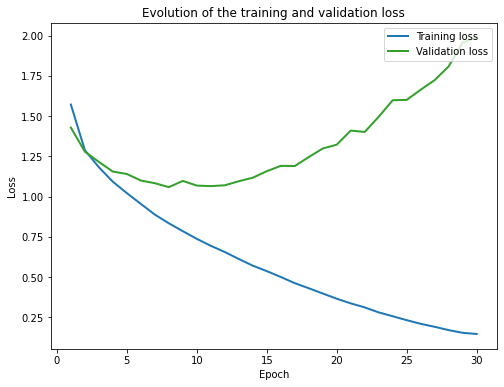

Accuracy of the network on the 40000 train images: 74.28 %
Accuracy of the network on the 10000 validation images: 64.02 %
Accuracy of the network on the 10000 test images: 64.00 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.46 took: 1.20s
Epoch 1, 20% 	 train_loss: 2.02 took: 0.96s
Epoch 1, 30% 	 train_loss: 1.90 took: 0.96s
Epoch 1, 40% 	 train_loss: 1.82 took: 0.99s
Epoch 1, 50% 	 train_loss: 1.80 took: 0.96s
Epoch 1, 60% 	 train_loss: 1.78 took: 0.97s
Epoch 1, 70% 	 train_loss: 1.75 took: 0.98s
Epoch 1, 80% 	 train_loss: 1.68 took: 0.95s
Epoch 1, 90% 	 train_loss: 1.67 took: 0.95s
Validation loss = 1.64
Epoch 2, 10% 	 train_loss: 1.61 took: 1.18s
Epoch 2, 20% 	 train_loss: 1.58 took: 0.94s
Epoch 2, 30% 	 train_loss: 1.57 took: 0.98s
Epoch 2, 40% 	 train_loss: 1.56 took: 0.95s
Epoch 2, 50% 	 train_loss: 1.5

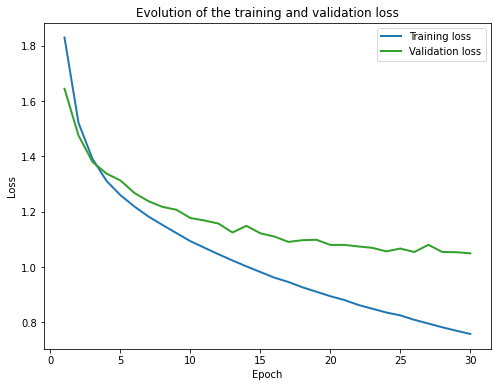

Accuracy of the network on the 40000 train images: 75.45 %
Accuracy of the network on the 10000 validation images: 63.85 %
Accuracy of the network on the 10000 test images: 64.49 %


In [ ]:
batch_size_param = [16,32,48]
n_epochs_param = [10,20,30]
learning_rate_param = [0.001,0.0005,0.0001]

for batch_size in batch_size_param:
  for n_epochs in n_epochs_param:
    for learning_rate in learning_rate_param:
      print('\n\n############################################################ batch_size={} || n_epochs={} || learning_rate={}'.format(batch_size, n_epochs,learning_rate))
      net = MyConvolutionalNetwork2()
      train_history, val_history = train(net, batch_size=batch_size, n_epochs=n_epochs, learning_rate=learning_rate)
      plot_losses(train_history, val_history)
      compute_accuracy(net)


**In this set of test, we've got the best score 65,59% on the test dataset with the hyperparameter configuration of "*batch_size=16*, *n_epochs=20*, *learning_rate=0.0005*", and with the same configuration, the best validation score 66,15% is obtained**

**The following illustrates the loss evolution curves when training the best scoring model**

Text(0.5, 1.0, 'Evolution of the training and validation loss')

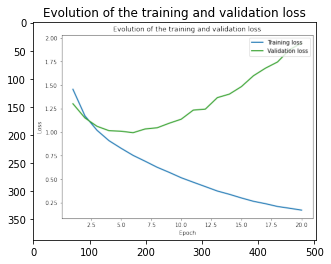

In [ ]:
# im=plt.imread('single convolutional layer #3.png') 
# plt.imshow(im)
# plt.title('Evolution of the training and validation loss')

## 2 convolutional layers

## double convolutional layer #1



1st NN layer properties:
<br> 


1.   kernel size = 3
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)


2nd NN layer properties:
<br> 


1.   kernel size = 5
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)
4.   size of fully connected layers (nn.linear) = flattened_size -> 64 -> 10


In [ ]:
out_size = get_output_size(in_size=15, kernel_size=5, stride=1, padding=1)
print(out_size)

13


In [ ]:
class MyConvolutionalNetwork2(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        self.conv2 = nn.Conv2d(18,18,kernel_size=5, stride=1, padding=1)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 6 * 6
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x30x30
        x = F.relu(self.conv1(x))
        # 18x30x30 -> 18x15x15
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # shape : 18x15x15 -> 18x13x13
        x = F.relu(self.conv2(x))
        # shape : 18x13x13 -> 18x6x6
        x = self.pool(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x6x6 -> 648
        x = x.view(-1, self.flattened_size)
        # 648 -> 64
        x = F.relu(self.fc1(x))
        # 64 -> 10  
        x = self.fc2(x)
        return x



############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.95 took: 1.78s
Epoch 1, 20% 	 train_loss: 1.66 took: 1.61s
Epoch 1, 30% 	 train_loss: 1.55 took: 1.64s
Epoch 1, 40% 	 train_loss: 1.47 took: 1.61s
Epoch 1, 50% 	 train_loss: 1.44 took: 1.61s
Epoch 1, 60% 	 train_loss: 1.42 took: 1.60s
Epoch 1, 70% 	 train_loss: 1.36 took: 1.59s
Epoch 1, 80% 	 train_loss: 1.33 took: 1.62s
Epoch 1, 90% 	 train_loss: 1.31 took: 1.62s
Validation loss = 1.24
Epoch 2, 10% 	 train_loss: 1.21 took: 1.78s
Epoch 2, 20% 	 train_loss: 1.20 took: 1.60s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.63s
Epoch 2, 40% 	 train_loss: 1.16 took: 1.65s
Epoch 2, 50% 	 train_loss: 1.18 took: 1.63s
Epoch 2, 60% 	 train_loss: 1.14 took: 1.59s
Epoch 2, 70% 	 train_loss: 1.14 took: 1.61s
Epoch 2, 80% 	 train_loss: 1.09 took: 1.66s
Epoch 2, 90% 	 train_loss: 1.16 took:

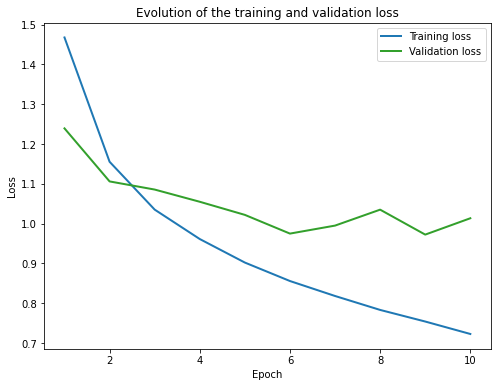

Accuracy of the network on the 40000 train images: 76.70 %
Accuracy of the network on the 10000 validation images: 67.48 %
Accuracy of the network on the 10000 test images: 67.26 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.07 took: 1.82s
Epoch 1, 20% 	 train_loss: 1.70 took: 1.65s
Epoch 1, 30% 	 train_loss: 1.60 took: 1.66s
Epoch 1, 40% 	 train_loss: 1.52 took: 1.68s
Epoch 1, 50% 	 train_loss: 1.48 took: 1.67s
Epoch 1, 60% 	 train_loss: 1.44 took: 1.63s
Epoch 1, 70% 	 train_loss: 1.44 took: 1.66s
Epoch 1, 80% 	 train_loss: 1.40 took: 1.65s
Epoch 1, 90% 	 train_loss: 1.32 took: 1.65s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.30 took: 1.81s
Epoch 2, 20% 	 train_loss: 1.25 took: 1.67s
Epoch 2, 30% 	 train_loss: 1.27 took: 1.67s
Epoch 2, 40% 	 train_loss: 1.28 took: 1.63s
Epoch 2, 50% 	 train_loss: 1.2

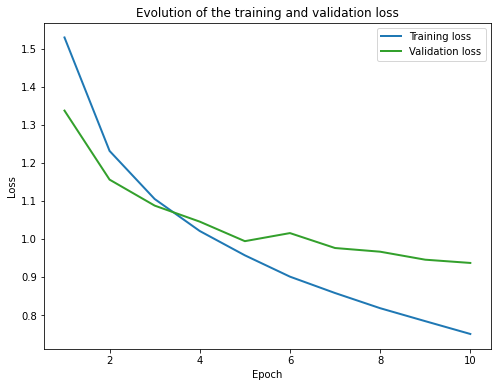

Accuracy of the network on the 40000 train images: 75.90 %
Accuracy of the network on the 10000 validation images: 67.93 %
Accuracy of the network on the 10000 test images: 67.15 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.20 took: 1.82s
Epoch 1, 20% 	 train_loss: 1.98 took: 1.67s
Epoch 1, 30% 	 train_loss: 1.89 took: 1.63s
Epoch 1, 40% 	 train_loss: 1.83 took: 1.65s
Epoch 1, 50% 	 train_loss: 1.77 took: 1.68s
Epoch 1, 60% 	 train_loss: 1.72 took: 1.61s
Epoch 1, 70% 	 train_loss: 1.70 took: 1.67s
Epoch 1, 80% 	 train_loss: 1.67 took: 1.65s
Epoch 1, 90% 	 train_loss: 1.61 took: 1.67s
Validation loss = 1.60
Epoch 2, 10% 	 train_loss: 1.59 took: 1.80s
Epoch 2, 20% 	 train_loss: 1.54 took: 1.66s
Epoch 2, 30% 	 train_loss: 1.53 took: 1.64s
Epoch 2, 40% 	 train_loss: 1.55 took: 1.67s
Epoch 2, 50% 	 train_loss: 1.5

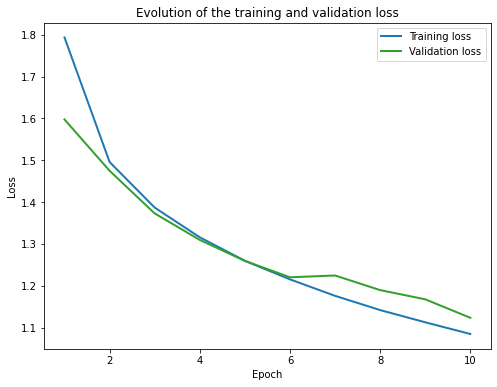

Accuracy of the network on the 40000 train images: 62.97 %
Accuracy of the network on the 10000 validation images: 60.26 %
Accuracy of the network on the 10000 test images: 60.60 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.97 took: 1.88s
Epoch 1, 20% 	 train_loss: 1.71 took: 1.69s
Epoch 1, 30% 	 train_loss: 1.60 took: 1.72s
Epoch 1, 40% 	 train_loss: 1.54 took: 1.72s
Epoch 1, 50% 	 train_loss: 1.47 took: 1.79s
Epoch 1, 60% 	 train_loss: 1.45 took: 1.73s
Epoch 1, 70% 	 train_loss: 1.43 took: 1.69s
Epoch 1, 80% 	 train_loss: 1.37 took: 1.67s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.70s
Validation loss = 1.29
Epoch 2, 10% 	 train_loss: 1.30 took: 1.84s
Epoch 2, 20% 	 train_loss: 1.27 took: 1.69s
Epoch 2, 30% 	 train_loss: 1.24 took: 1.65s
Epoch 2, 40% 	 train_loss: 1.25 took: 1.67s
Epoch 2, 50% 	 train_loss: 1.22 

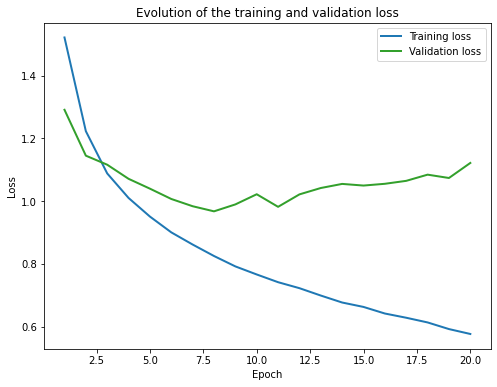

Accuracy of the network on the 40000 train images: 74.33 %
Accuracy of the network on the 10000 validation images: 66.70 %
Accuracy of the network on the 10000 test images: 66.11 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.07 took: 1.91s
Epoch 1, 20% 	 train_loss: 1.85 took: 1.67s
Epoch 1, 30% 	 train_loss: 1.73 took: 1.71s
Epoch 1, 40% 	 train_loss: 1.64 took: 1.70s
Epoch 1, 50% 	 train_loss: 1.55 took: 1.72s
Epoch 1, 60% 	 train_loss: 1.50 took: 1.69s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.69s
Epoch 1, 80% 	 train_loss: 1.43 took: 1.69s
Epoch 1, 90% 	 train_loss: 1.41 took: 1.71s
Validation loss = 1.41
Epoch 2, 10% 	 train_loss: 1.37 took: 1.87s
Epoch 2, 20% 	 train_loss: 1.34 took: 1.66s
Epoch 2, 30% 	 train_loss: 1.33 took: 1.65s
Epoch 2, 40% 	 train_loss: 1.29 took: 1.71s
Epoch 2, 50% 	 train_loss: 1.2

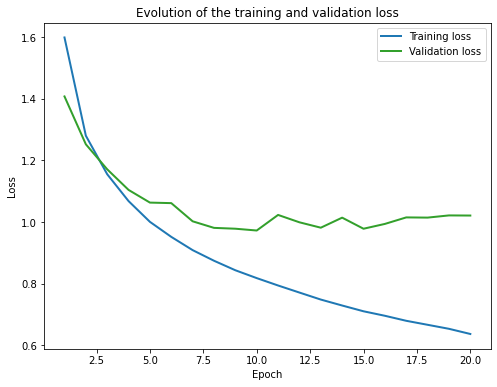

Accuracy of the network on the 40000 train images: 73.54 %
Accuracy of the network on the 10000 validation images: 66.70 %
Accuracy of the network on the 10000 test images: 66.63 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.23 took: 1.82s
Epoch 1, 20% 	 train_loss: 1.97 took: 1.67s
Epoch 1, 30% 	 train_loss: 1.88 took: 1.71s
Epoch 1, 40% 	 train_loss: 1.80 took: 1.67s
Epoch 1, 50% 	 train_loss: 1.74 took: 1.72s
Epoch 1, 60% 	 train_loss: 1.68 took: 1.67s
Epoch 1, 70% 	 train_loss: 1.66 took: 1.65s
Epoch 1, 80% 	 train_loss: 1.63 took: 1.70s
Epoch 1, 90% 	 train_loss: 1.58 took: 1.68s
Validation loss = 1.58
Epoch 2, 10% 	 train_loss: 1.54 took: 1.86s
Epoch 2, 20% 	 train_loss: 1.55 took: 1.69s
Epoch 2, 30% 	 train_loss: 1.54 took: 1.66s
Epoch 2, 40% 	 train_loss: 1.52 took: 1.74s
Epoch 2, 50% 	 train_loss: 1.5

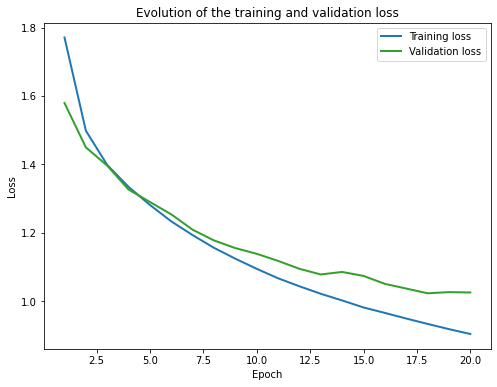

Accuracy of the network on the 40000 train images: 68.84 %
Accuracy of the network on the 10000 validation images: 64.24 %
Accuracy of the network on the 10000 test images: 64.21 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.99 took: 1.78s
Epoch 1, 20% 	 train_loss: 1.75 took: 1.65s
Epoch 1, 30% 	 train_loss: 1.60 took: 1.65s
Epoch 1, 40% 	 train_loss: 1.52 took: 1.63s
Epoch 1, 50% 	 train_loss: 1.51 took: 1.68s
Epoch 1, 60% 	 train_loss: 1.43 took: 1.64s
Epoch 1, 70% 	 train_loss: 1.40 took: 1.63s
Epoch 1, 80% 	 train_loss: 1.35 took: 1.64s
Epoch 1, 90% 	 train_loss: 1.34 took: 1.66s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.25 took: 1.83s
Epoch 2, 20% 	 train_loss: 1.22 took: 1.66s
Epoch 2, 30% 	 train_loss: 1.23 took: 1.62s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.65s
Epoch 2, 50% 	 train_loss: 1.19 

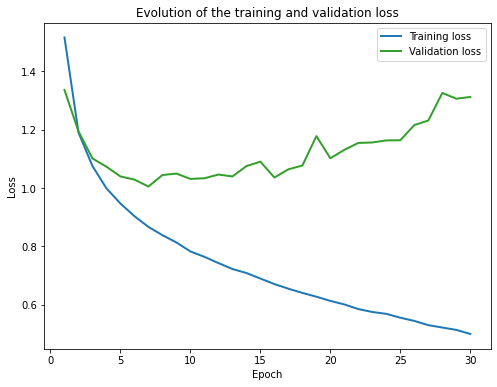

Accuracy of the network on the 40000 train images: 71.53 %
Accuracy of the network on the 10000 validation images: 65.46 %
Accuracy of the network on the 10000 test images: 65.73 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.05 took: 1.74s
Epoch 1, 20% 	 train_loss: 1.78 took: 1.61s
Epoch 1, 30% 	 train_loss: 1.66 took: 1.60s
Epoch 1, 40% 	 train_loss: 1.61 took: 1.57s
Epoch 1, 50% 	 train_loss: 1.55 took: 1.57s
Epoch 1, 60% 	 train_loss: 1.49 took: 1.58s
Epoch 1, 70% 	 train_loss: 1.47 took: 1.65s
Epoch 1, 80% 	 train_loss: 1.42 took: 1.68s
Epoch 1, 90% 	 train_loss: 1.38 took: 1.67s
Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.33 took: 1.84s
Epoch 2, 20% 	 train_loss: 1.33 took: 1.65s
Epoch 2, 30% 	 train_loss: 1.27 took: 1.61s
Epoch 2, 40% 	 train_loss: 1.28 took: 1.61s
Epoch 2, 50% 	 train_loss: 1.2

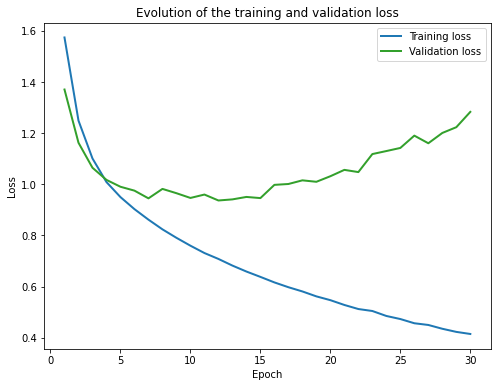

Accuracy of the network on the 40000 train images: 77.33 %
Accuracy of the network on the 10000 validation images: 67.95 %
Accuracy of the network on the 10000 test images: 68.04 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.22 took: 1.77s
Epoch 1, 20% 	 train_loss: 1.96 took: 1.62s
Epoch 1, 30% 	 train_loss: 1.87 took: 1.62s
Epoch 1, 40% 	 train_loss: 1.81 took: 1.63s
Epoch 1, 50% 	 train_loss: 1.74 took: 1.62s
Epoch 1, 60% 	 train_loss: 1.70 took: 1.59s
Epoch 1, 70% 	 train_loss: 1.65 took: 1.62s
Epoch 1, 80% 	 train_loss: 1.63 took: 1.61s
Epoch 1, 90% 	 train_loss: 1.59 took: 1.59s
Validation loss = 1.57
Epoch 2, 10% 	 train_loss: 1.55 took: 1.75s
Epoch 2, 20% 	 train_loss: 1.52 took: 1.59s
Epoch 2, 30% 	 train_loss: 1.55 took: 1.58s
Epoch 2, 40% 	 train_loss: 1.52 took: 1.63s
Epoch 2, 50% 	 train_loss: 1.5

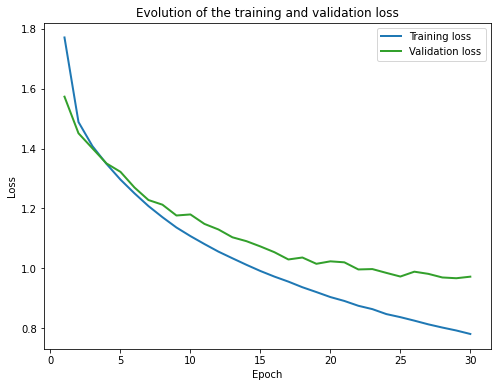

Accuracy of the network on the 40000 train images: 73.12 %
Accuracy of the network on the 10000 validation images: 66.51 %
Accuracy of the network on the 10000 test images: 66.20 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.00 took: 1.43s
Epoch 1, 20% 	 train_loss: 1.72 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.58 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.53 took: 1.04s
Epoch 1, 50% 	 train_loss: 1.47 took: 1.02s
Epoch 1, 60% 	 train_loss: 1.44 took: 1.02s
Epoch 1, 70% 	 train_loss: 1.37 took: 1.03s
Epoch 1, 80% 	 train_loss: 1.39 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.34 took: 1.05s
Validation loss = 1.33
Epoch 2, 10% 	 train_loss: 1.26 took: 1.44s
Epoch 2, 20% 	 train_loss: 1.27 took: 1.12s
Epoch 2, 30% 	 train_loss: 1.23 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.23 

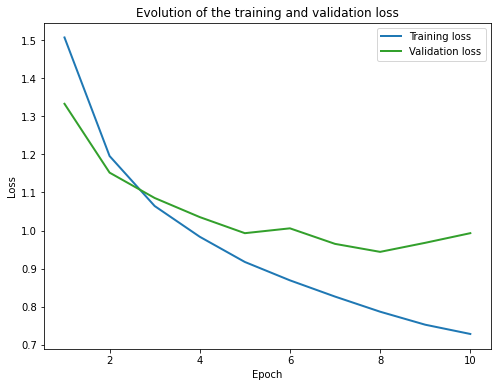

Accuracy of the network on the 40000 train images: 75.09 %
Accuracy of the network on the 10000 validation images: 67.44 %
Accuracy of the network on the 10000 test images: 67.48 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.06 took: 1.32s
Epoch 1, 20% 	 train_loss: 1.79 took: 1.24s
Epoch 1, 30% 	 train_loss: 1.68 took: 1.06s
Epoch 1, 40% 	 train_loss: 1.60 took: 1.12s
Epoch 1, 50% 	 train_loss: 1.56 took: 1.10s
Epoch 1, 60% 	 train_loss: 1.51 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.47 took: 1.07s
Epoch 1, 80% 	 train_loss: 1.42 took: 1.13s
Epoch 1, 90% 	 train_loss: 1.42 took: 1.13s
Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.34 took: 1.31s
Epoch 2, 20% 	 train_loss: 1.34 took: 1.19s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.14s
Epoch 2, 40% 	 train_loss: 1.30 took: 1.06s
Epoch 2, 50% 	 train_loss: 1.3

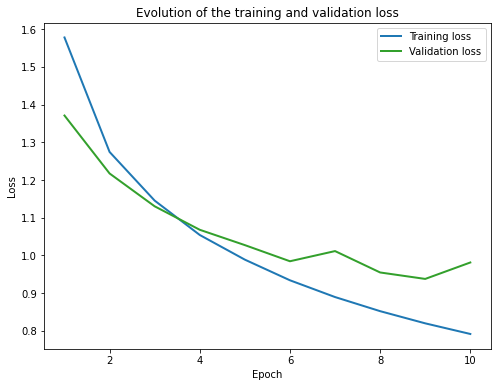

Accuracy of the network on the 40000 train images: 74.07 %
Accuracy of the network on the 10000 validation images: 67.83 %
Accuracy of the network on the 10000 test images: 67.62 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.26 took: 1.25s
Epoch 1, 20% 	 train_loss: 2.08 took: 1.02s
Epoch 1, 30% 	 train_loss: 1.97 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.88 took: 1.04s
Epoch 1, 50% 	 train_loss: 1.82 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.77 took: 1.04s
Epoch 1, 70% 	 train_loss: 1.72 took: 1.05s
Epoch 1, 80% 	 train_loss: 1.69 took: 1.04s
Epoch 1, 90% 	 train_loss: 1.69 took: 1.05s
Validation loss = 1.64
Epoch 2, 10% 	 train_loss: 1.65 took: 1.22s
Epoch 2, 20% 	 train_loss: 1.63 took: 1.04s
Epoch 2, 30% 	 train_loss: 1.60 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.60 took: 1.04s
Epoch 2, 50% 	 train_loss: 1.5

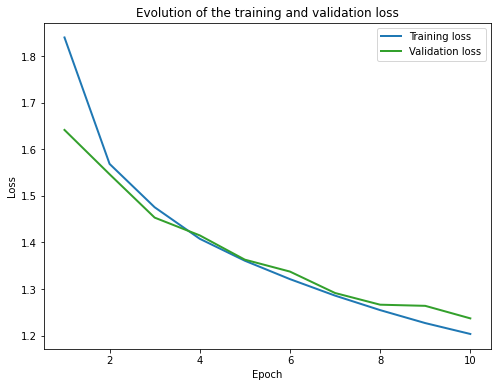

Accuracy of the network on the 40000 train images: 58.78 %
Accuracy of the network on the 10000 validation images: 56.83 %
Accuracy of the network on the 10000 test images: 56.73 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 1.99 took: 1.22s
Epoch 1, 20% 	 train_loss: 1.73 took: 1.03s
Epoch 1, 30% 	 train_loss: 1.58 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.51 took: 1.02s
Epoch 1, 50% 	 train_loss: 1.48 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.45 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.39 took: 1.05s
Epoch 1, 80% 	 train_loss: 1.37 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.36 took: 1.03s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.28 took: 1.25s
Epoch 2, 20% 	 train_loss: 1.22 took: 1.08s
Epoch 2, 30% 	 train_loss: 1.20 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.07s
Epoch 2, 50% 	 train_loss: 1.19 

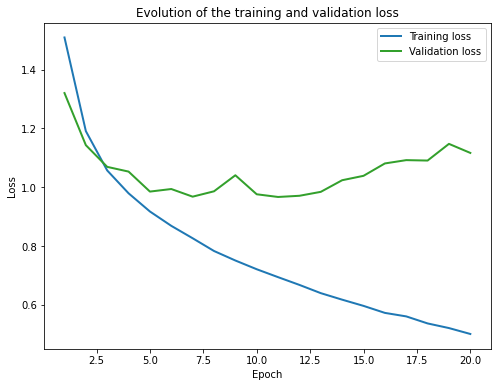

Accuracy of the network on the 40000 train images: 78.71 %
Accuracy of the network on the 10000 validation images: 68.06 %
Accuracy of the network on the 10000 test images: 67.21 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.08 took: 1.21s
Epoch 1, 20% 	 train_loss: 1.82 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.71 took: 1.01s
Epoch 1, 40% 	 train_loss: 1.68 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.62 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.56 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.56 took: 1.05s
Epoch 1, 80% 	 train_loss: 1.51 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.48 took: 1.02s
Validation loss = 1.44
Epoch 2, 10% 	 train_loss: 1.39 took: 1.20s
Epoch 2, 20% 	 train_loss: 1.40 took: 1.04s
Epoch 2, 30% 	 train_loss: 1.38 took: 1.03s
Epoch 2, 40% 	 train_loss: 1.33 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.3

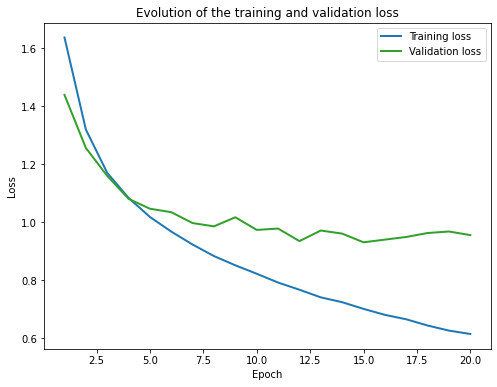

Accuracy of the network on the 40000 train images: 78.41 %
Accuracy of the network on the 10000 validation images: 68.55 %
Accuracy of the network on the 10000 test images: 68.48 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.28 took: 1.21s
Epoch 1, 20% 	 train_loss: 2.09 took: 1.01s
Epoch 1, 30% 	 train_loss: 1.99 took: 1.02s
Epoch 1, 40% 	 train_loss: 1.92 took: 1.02s
Epoch 1, 50% 	 train_loss: 1.86 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.82 took: 1.05s
Epoch 1, 70% 	 train_loss: 1.78 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.74 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.72 took: 1.04s
Validation loss = 1.69
Epoch 2, 10% 	 train_loss: 1.67 took: 1.25s
Epoch 2, 20% 	 train_loss: 1.65 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.64 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.62 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.6

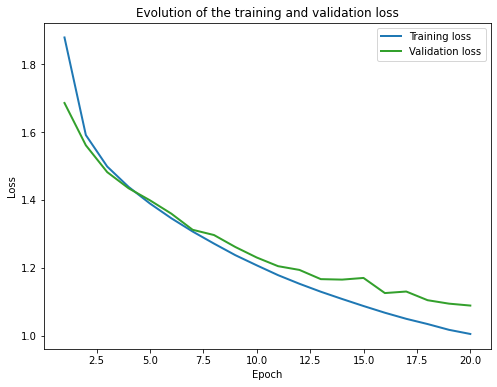

Accuracy of the network on the 40000 train images: 65.78 %
Accuracy of the network on the 10000 validation images: 62.40 %
Accuracy of the network on the 10000 test images: 62.83 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.04 took: 1.29s
Epoch 1, 20% 	 train_loss: 1.76 took: 1.05s
Epoch 1, 30% 	 train_loss: 1.65 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.54 took: 1.05s
Epoch 1, 50% 	 train_loss: 1.49 took: 1.04s
Epoch 1, 60% 	 train_loss: 1.45 took: 1.04s
Epoch 1, 70% 	 train_loss: 1.40 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.38 took: 1.06s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.04s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.27 took: 1.20s
Epoch 2, 20% 	 train_loss: 1.25 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.27 took: 1.06s
Epoch 2, 40% 	 train_loss: 1.25 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.23 

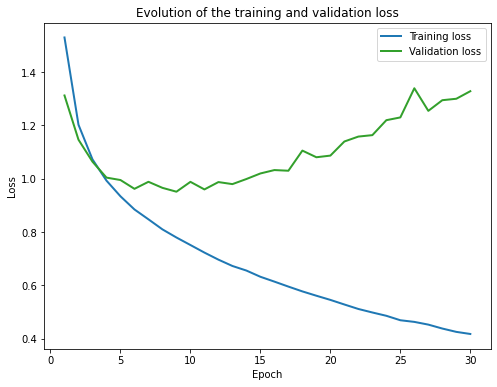

Accuracy of the network on the 40000 train images: 74.88 %
Accuracy of the network on the 10000 validation images: 67.25 %
Accuracy of the network on the 10000 test images: 67.15 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.12 took: 1.29s
Epoch 1, 20% 	 train_loss: 1.88 took: 1.09s
Epoch 1, 30% 	 train_loss: 1.73 took: 1.13s
Epoch 1, 40% 	 train_loss: 1.65 took: 1.12s
Epoch 1, 50% 	 train_loss: 1.62 took: 1.11s
Epoch 1, 60% 	 train_loss: 1.56 took: 1.15s
Epoch 1, 70% 	 train_loss: 1.53 took: 1.13s
Epoch 1, 80% 	 train_loss: 1.46 took: 1.11s
Epoch 1, 90% 	 train_loss: 1.44 took: 1.12s
Validation loss = 1.41
Epoch 2, 10% 	 train_loss: 1.37 took: 1.33s
Epoch 2, 20% 	 train_loss: 1.39 took: 1.11s
Epoch 2, 30% 	 train_loss: 1.38 took: 1.12s
Epoch 2, 40% 	 train_loss: 1.37 took: 1.10s
Epoch 2, 50% 	 train_loss: 1.3

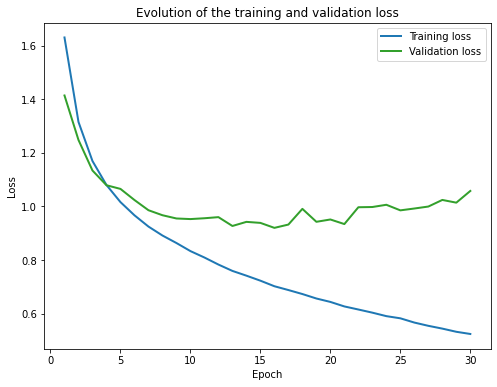

Accuracy of the network on the 40000 train images: 77.58 %
Accuracy of the network on the 10000 validation images: 68.29 %
Accuracy of the network on the 10000 test images: 67.35 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.28 took: 1.40s
Epoch 1, 20% 	 train_loss: 2.06 took: 1.18s
Epoch 1, 30% 	 train_loss: 1.95 took: 1.20s
Epoch 1, 40% 	 train_loss: 1.89 took: 1.22s
Epoch 1, 50% 	 train_loss: 1.84 took: 1.20s
Epoch 1, 60% 	 train_loss: 1.80 took: 1.17s
Epoch 1, 70% 	 train_loss: 1.79 took: 1.18s
Epoch 1, 80% 	 train_loss: 1.76 took: 1.20s
Epoch 1, 90% 	 train_loss: 1.70 took: 1.18s
Validation loss = 1.67
Epoch 2, 10% 	 train_loss: 1.65 took: 1.39s
Epoch 2, 20% 	 train_loss: 1.62 took: 1.18s
Epoch 2, 30% 	 train_loss: 1.62 took: 1.20s
Epoch 2, 40% 	 train_loss: 1.61 took: 1.19s
Epoch 2, 50% 	 train_loss: 1.5

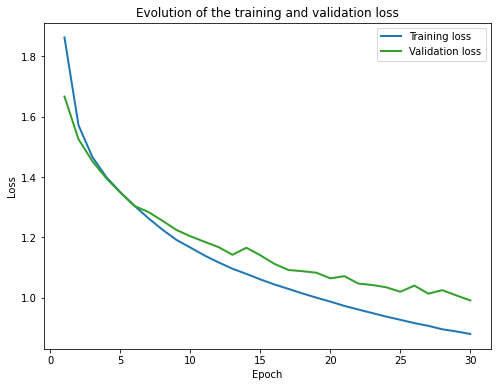

Accuracy of the network on the 40000 train images: 70.38 %
Accuracy of the network on the 10000 validation images: 65.54 %
Accuracy of the network on the 10000 test images: 66.49 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.08 took: 1.27s
Epoch 1, 20% 	 train_loss: 1.82 took: 1.00s
Epoch 1, 30% 	 train_loss: 1.67 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.57 took: 1.00s
Epoch 1, 50% 	 train_loss: 1.54 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.45 took: 1.02s
Epoch 1, 70% 	 train_loss: 1.47 took: 1.03s
Epoch 1, 80% 	 train_loss: 1.40 took: 1.05s
Epoch 1, 90% 	 train_loss: 1.36 took: 1.04s
Validation loss = 1.35
Epoch 2, 10% 	 train_loss: 1.30 took: 1.28s
Epoch 2, 20% 	 train_loss: 1.32 took: 1.04s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.00s
Epoch 2, 40% 	 train_loss: 1.29 took: 0.99s
Epoch 2, 50% 	 train_loss: 1.22 

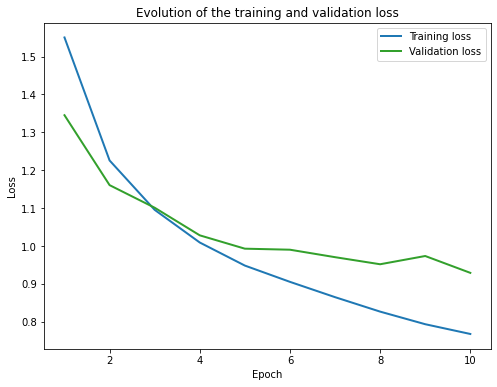

Accuracy of the network on the 40000 train images: 75.10 %
Accuracy of the network on the 10000 validation images: 67.53 %
Accuracy of the network on the 10000 test images: 67.48 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.14 took: 1.27s
Epoch 1, 20% 	 train_loss: 1.89 took: 1.02s
Epoch 1, 30% 	 train_loss: 1.76 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.68 took: 1.04s
Epoch 1, 50% 	 train_loss: 1.64 took: 1.04s
Epoch 1, 60% 	 train_loss: 1.58 took: 1.02s
Epoch 1, 70% 	 train_loss: 1.55 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.53 took: 1.01s
Epoch 1, 90% 	 train_loss: 1.49 took: 1.01s
Validation loss = 1.48
Epoch 2, 10% 	 train_loss: 1.44 took: 1.25s
Epoch 2, 20% 	 train_loss: 1.46 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.43 took: 1.03s
Epoch 2, 40% 	 train_loss: 1.39 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.3

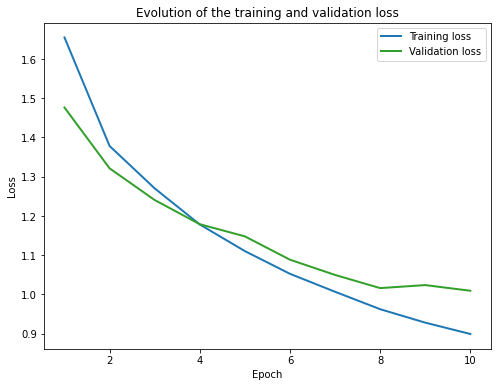

Accuracy of the network on the 40000 train images: 69.76 %
Accuracy of the network on the 10000 validation images: 65.09 %
Accuracy of the network on the 10000 test images: 65.35 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.31 took: 1.25s
Epoch 1, 20% 	 train_loss: 2.15 took: 1.03s
Epoch 1, 30% 	 train_loss: 2.01 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.97 took: 1.03s
Epoch 1, 50% 	 train_loss: 1.90 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.88 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.87 took: 1.06s
Epoch 1, 80% 	 train_loss: 1.85 took: 1.03s
Epoch 1, 90% 	 train_loss: 1.82 took: 1.04s
Validation loss = 1.75
Epoch 2, 10% 	 train_loss: 1.76 took: 1.27s
Epoch 2, 20% 	 train_loss: 1.73 took: 1.02s
Epoch 2, 30% 	 train_loss: 1.71 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.68 took: 1.04s
Epoch 2, 50% 	 train_loss: 1.6

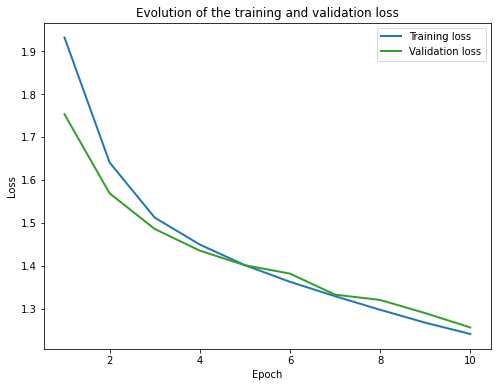

Accuracy of the network on the 40000 train images: 56.91 %
Accuracy of the network on the 10000 validation images: 56.03 %
Accuracy of the network on the 10000 test images: 55.93 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.07 took: 1.44s
Epoch 1, 20% 	 train_loss: 1.75 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.65 took: 1.00s
Epoch 1, 40% 	 train_loss: 1.56 took: 1.02s
Epoch 1, 50% 	 train_loss: 1.52 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.50 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.48 took: 1.03s
Epoch 1, 80% 	 train_loss: 1.42 took: 1.11s
Epoch 1, 90% 	 train_loss: 1.41 took: 1.04s
Validation loss = 1.40
Epoch 2, 10% 	 train_loss: 1.34 took: 1.46s
Epoch 2, 20% 	 train_loss: 1.36 took: 1.20s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.29 took: 1.04s
Epoch 2, 50% 	 train_loss: 1.27 

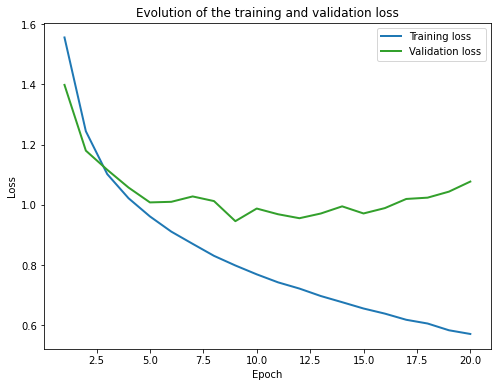

Accuracy of the network on the 40000 train images: 74.48 %
Accuracy of the network on the 10000 validation images: 68.13 %
Accuracy of the network on the 10000 test images: 66.85 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.11 took: 1.25s
Epoch 1, 20% 	 train_loss: 1.83 took: 1.01s
Epoch 1, 30% 	 train_loss: 1.74 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.63 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.60 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.55 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.51 took: 1.01s
Epoch 1, 80% 	 train_loss: 1.52 took: 0.98s
Epoch 1, 90% 	 train_loss: 1.47 took: 1.01s
Validation loss = 1.44
Epoch 2, 10% 	 train_loss: 1.42 took: 1.25s
Epoch 2, 20% 	 train_loss: 1.42 took: 1.07s
Epoch 2, 30% 	 train_loss: 1.37 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.36 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.3

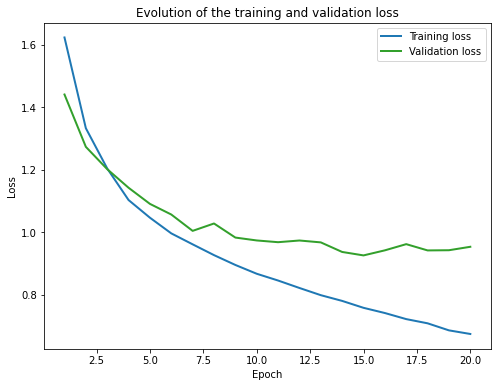

Accuracy of the network on the 40000 train images: 75.68 %
Accuracy of the network on the 10000 validation images: 68.34 %
Accuracy of the network on the 10000 test images: 68.23 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.31 took: 1.21s
Epoch 1, 20% 	 train_loss: 2.19 took: 1.02s
Epoch 1, 30% 	 train_loss: 2.03 took: 1.01s
Epoch 1, 40% 	 train_loss: 1.94 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.90 took: 0.99s
Epoch 1, 60% 	 train_loss: 1.85 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.86 took: 1.01s
Epoch 1, 80% 	 train_loss: 1.77 took: 1.02s
Epoch 1, 90% 	 train_loss: 1.75 took: 1.03s
Validation loss = 1.71
Epoch 2, 10% 	 train_loss: 1.70 took: 1.24s
Epoch 2, 20% 	 train_loss: 1.68 took: 1.05s
Epoch 2, 30% 	 train_loss: 1.64 took: 1.01s
Epoch 2, 40% 	 train_loss: 1.63 took: 1.05s
Epoch 2, 50% 	 train_loss: 1.6

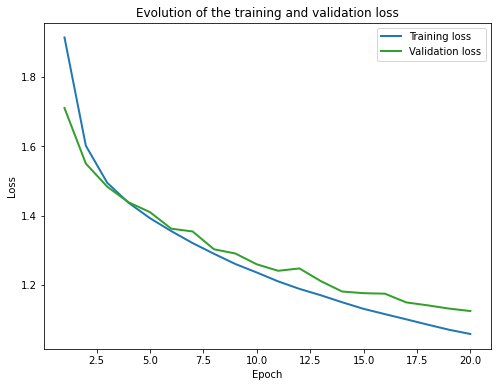

Accuracy of the network on the 40000 train images: 63.95 %
Accuracy of the network on the 10000 validation images: 60.98 %
Accuracy of the network on the 10000 test images: 61.81 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.06 took: 1.26s
Epoch 1, 20% 	 train_loss: 1.81 took: 1.07s
Epoch 1, 30% 	 train_loss: 1.62 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.56 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.52 took: 1.04s
Epoch 1, 60% 	 train_loss: 1.46 took: 1.05s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.41 took: 1.01s
Epoch 1, 90% 	 train_loss: 1.42 took: 1.06s
Validation loss = 1.35
Epoch 2, 10% 	 train_loss: 1.33 took: 1.27s
Epoch 2, 20% 	 train_loss: 1.33 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.31 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.27 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.24 

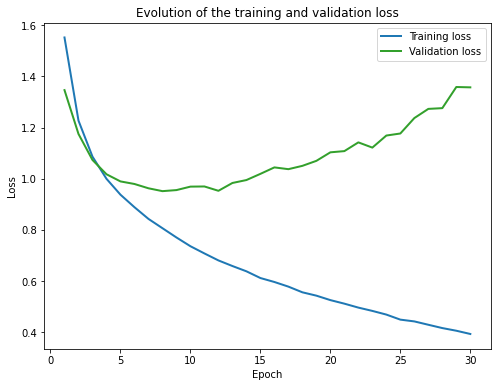

Accuracy of the network on the 40000 train images: 74.23 %
Accuracy of the network on the 10000 validation images: 67.26 %
Accuracy of the network on the 10000 test images: 66.87 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.14 took: 1.29s
Epoch 1, 20% 	 train_loss: 1.94 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.80 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.71 took: 1.05s
Epoch 1, 50% 	 train_loss: 1.63 took: 1.05s
Epoch 1, 60% 	 train_loss: 1.60 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.55 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.52 took: 1.07s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.04s
Validation loss = 1.47
Epoch 2, 10% 	 train_loss: 1.44 took: 1.28s
Epoch 2, 20% 	 train_loss: 1.42 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.41 took: 1.06s
Epoch 2, 40% 	 train_loss: 1.41 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.3

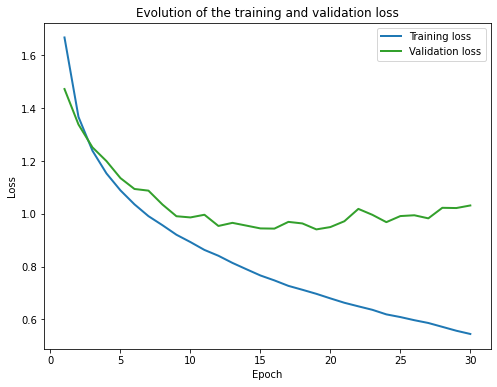

Accuracy of the network on the 40000 train images: 77.67 %
Accuracy of the network on the 10000 validation images: 67.83 %
Accuracy of the network on the 10000 test images: 67.41 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.31 took: 1.18s
Epoch 1, 20% 	 train_loss: 2.12 took: 0.99s
Epoch 1, 30% 	 train_loss: 1.99 took: 0.98s
Epoch 1, 40% 	 train_loss: 1.93 took: 1.03s
Epoch 1, 50% 	 train_loss: 1.87 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.84 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.80 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.74 took: 1.01s
Epoch 1, 90% 	 train_loss: 1.74 took: 0.99s
Validation loss = 1.69
Epoch 2, 10% 	 train_loss: 1.69 took: 1.21s
Epoch 2, 20% 	 train_loss: 1.62 took: 1.02s
Epoch 2, 30% 	 train_loss: 1.63 took: 1.06s
Epoch 2, 40% 	 train_loss: 1.61 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.6

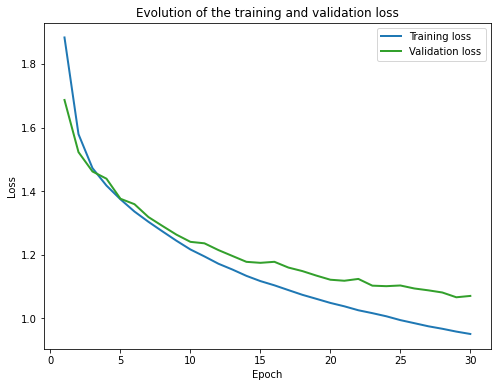

Accuracy of the network on the 40000 train images: 67.25 %
Accuracy of the network on the 10000 validation images: 63.10 %
Accuracy of the network on the 10000 test images: 63.11 %


In [ ]:
batch_size_param = [16,32,48]
n_epochs_param = [10,20,30]
learning_rate_param = [0.001,0.0005,0.0001]

for batch_size in batch_size_param:
  for n_epochs in n_epochs_param:
    for learning_rate in learning_rate_param:
      print('\n\n############################################################ batch_size={} || n_epochs={} || learning_rate={}'.format(batch_size, n_epochs,learning_rate))
      net = MyConvolutionalNetwork2()
      train_history, val_history = train(net, batch_size=batch_size, n_epochs=n_epochs, learning_rate=learning_rate)
      plot_losses(train_history, val_history)
      compute_accuracy(net)


**In this set of test, we've got the best score 68,48% on the test dataset with the hyperparameter configuration of "*batch_size=32*, *n_epochs=20*, *learning_rate=0.0005*", and with the same configuration, the best validation score 68,55% is obtained**

**The following illustrates the loss evolution curves when training the best scoring model**

Text(0.5, 1.0, 'Evolution of the training and validation loss')

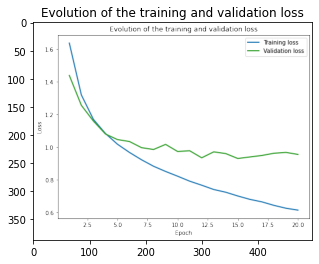

In [ ]:
# im=plt.imread('double convolutional layer #1.png') 
# plt.imshow(im)
# plt.title('Evolution of the training and validation loss')

## double convolutional layer #2



1st NN layer properties:
<br> 


1.   kernel size = 3
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)


2nd NN layer properties:
<br> 


1.   kernel size = 5
2.   number of feature maps (activation maps) = 2 (one after the convolutional layer, one following the 1st fully connected layer)
4.   size of fully connected layers (nn.linear) = flattened_size -> 100 -> 20


In [ ]:
out_size = get_output_size(in_size=15, kernel_size=5, stride=1, padding=1)
print(out_size)

13


In [ ]:
class MyConvolutionalNetwork2(nn.Module):
    def __init__(self):
        super(MyConvolutionalNetwork2, self).__init__()
        
        self.conv1 = nn.Conv2d(3, 18, kernel_size=5, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)

        #### START CODE: ADD NEW LAYERS ####
        # (do not forget to update `flattened_size`:
        # the input size of the first fully connected layer self.fc1)
        self.conv2 = nn.Conv2d(18,18,kernel_size=5, stride=1, padding=1)

        # Size of the output of the last convolution:
        self.flattened_size = 18 * 6 * 6
        ### END CODE ###
        
        self.fc1 = nn.Linear(self.flattened_size, 100)
        self.fc2 = nn.Linear(100, 20)

    def forward(self, x):
        """
        Forward pass,
        x shape is (batch_size, 3, 32, 32)
        (color channel first)
        in the comments, we omit the batch_size in the shape
        """
        # shape : 3x32x32 -> 18x30x30
        x = F.relu(self.conv1(x))
        # 18x30x30 -> 18x15x15
        x = self.pool(x)
        
        #### START CODE: USE YOUR NEW LAYERS HERE ####
        # shape : 18x15x15 -> 18x13x13
        x = F.relu(self.conv2(x))
        # shape : 18x13x13 -> 18x6x6
        x = self.pool(x)
        
        #### END CODE ####
        
        # Check the output size
        output_size = np.prod(x.size()[1:])
        assert output_size == self.flattened_size,\
                "self.flattened_size is invalid {} != {}".format(output_size, self.flattened_size)
        
        # 18x6x6 -> 648
        x = x.view(-1, self.flattened_size)
        # 648 -> 100
        x = F.relu(self.fc1(x))
        # 100 -> 20  
        x = self.fc2(x)
        return x



############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.02 took: 1.69s
Epoch 1, 20% 	 train_loss: 1.73 took: 1.56s
Epoch 1, 30% 	 train_loss: 1.56 took: 1.57s
Epoch 1, 40% 	 train_loss: 1.51 took: 1.57s
Epoch 1, 50% 	 train_loss: 1.45 took: 1.56s
Epoch 1, 60% 	 train_loss: 1.39 took: 1.54s
Epoch 1, 70% 	 train_loss: 1.34 took: 1.56s
Epoch 1, 80% 	 train_loss: 1.32 took: 1.59s
Epoch 1, 90% 	 train_loss: 1.29 took: 1.53s
Validation loss = 1.25
Epoch 2, 10% 	 train_loss: 1.21 took: 1.68s
Epoch 2, 20% 	 train_loss: 1.19 took: 1.53s
Epoch 2, 30% 	 train_loss: 1.15 took: 1.56s
Epoch 2, 40% 	 train_loss: 1.15 took: 1.58s
Epoch 2, 50% 	 train_loss: 1.18 took: 1.53s
Epoch 2, 60% 	 train_loss: 1.12 took: 1.53s
Epoch 2, 70% 	 train_loss: 1.14 took: 1.53s
Epoch 2, 80% 	 train_loss: 1.12 took: 1.54s
Epoch 2, 90% 	 train_loss: 1.09 took:

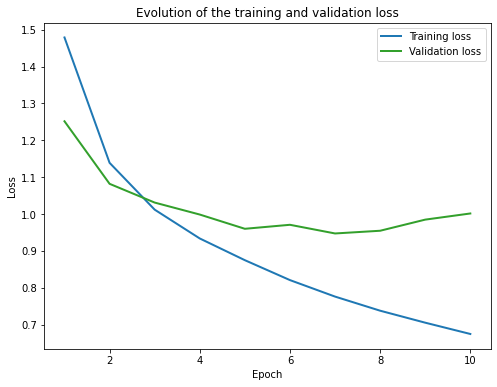

Accuracy of the network on the 40000 train images: 76.47 %
Accuracy of the network on the 10000 validation images: 68.13 %
Accuracy of the network on the 10000 test images: 67.71 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.16 took: 1.81s
Epoch 1, 20% 	 train_loss: 1.83 took: 1.56s
Epoch 1, 30% 	 train_loss: 1.69 took: 1.62s
Epoch 1, 40% 	 train_loss: 1.58 took: 1.61s
Epoch 1, 50% 	 train_loss: 1.56 took: 1.62s
Epoch 1, 60% 	 train_loss: 1.49 took: 1.57s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.60s
Epoch 1, 80% 	 train_loss: 1.47 took: 1.59s
Epoch 1, 90% 	 train_loss: 1.43 took: 1.59s
Validation loss = 1.38
Epoch 2, 10% 	 train_loss: 1.34 took: 1.73s
Epoch 2, 20% 	 train_loss: 1.32 took: 1.59s
Epoch 2, 30% 	 train_loss: 1.31 took: 1.59s
Epoch 2, 40% 	 train_loss: 1.31 took: 1.60s
Epoch 2, 50% 	 train_loss: 1.2

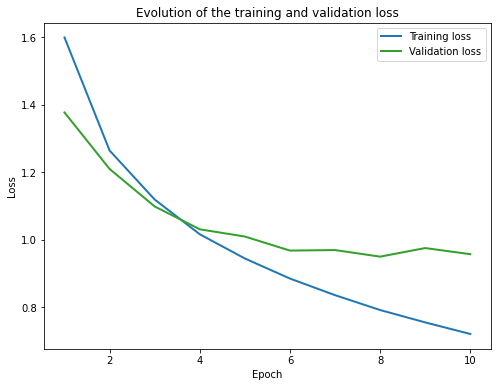

Accuracy of the network on the 40000 train images: 74.96 %
Accuracy of the network on the 10000 validation images: 67.69 %
Accuracy of the network on the 10000 test images: 66.90 %


############################################################ batch_size=16 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.42 took: 1.84s
Epoch 1, 20% 	 train_loss: 2.03 took: 1.63s
Epoch 1, 30% 	 train_loss: 1.94 took: 1.64s
Epoch 1, 40% 	 train_loss: 1.85 took: 1.63s
Epoch 1, 50% 	 train_loss: 1.78 took: 1.64s
Epoch 1, 60% 	 train_loss: 1.70 took: 1.66s
Epoch 1, 70% 	 train_loss: 1.70 took: 1.64s
Epoch 1, 80% 	 train_loss: 1.66 took: 1.64s
Epoch 1, 90% 	 train_loss: 1.65 took: 1.62s
Validation loss = 1.62
Epoch 2, 10% 	 train_loss: 1.60 took: 1.79s
Epoch 2, 20% 	 train_loss: 1.56 took: 1.62s
Epoch 2, 30% 	 train_loss: 1.54 took: 1.68s
Epoch 2, 40% 	 train_loss: 1.57 took: 1.65s
Epoch 2, 50% 	 train_loss: 1.5

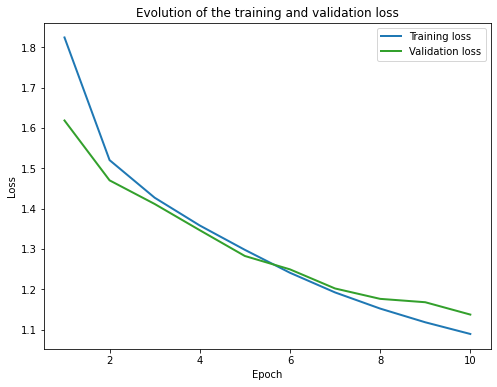

Accuracy of the network on the 40000 train images: 63.01 %
Accuracy of the network on the 10000 validation images: 60.55 %
Accuracy of the network on the 10000 test images: 60.37 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.07 took: 1.78s
Epoch 1, 20% 	 train_loss: 1.75 took: 1.67s
Epoch 1, 30% 	 train_loss: 1.57 took: 1.73s
Epoch 1, 40% 	 train_loss: 1.50 took: 1.64s
Epoch 1, 50% 	 train_loss: 1.49 took: 1.68s
Epoch 1, 60% 	 train_loss: 1.42 took: 1.64s
Epoch 1, 70% 	 train_loss: 1.39 took: 1.67s
Epoch 1, 80% 	 train_loss: 1.37 took: 1.69s
Epoch 1, 90% 	 train_loss: 1.29 took: 1.66s
Validation loss = 1.28
Epoch 2, 10% 	 train_loss: 1.23 took: 1.82s
Epoch 2, 20% 	 train_loss: 1.20 took: 1.66s
Epoch 2, 30% 	 train_loss: 1.22 took: 1.63s
Epoch 2, 40% 	 train_loss: 1.19 took: 1.63s
Epoch 2, 50% 	 train_loss: 1.17 

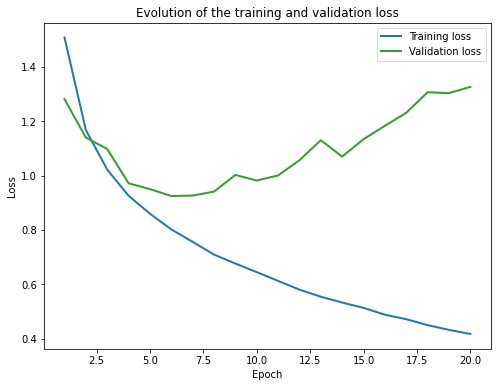

Accuracy of the network on the 40000 train images: 75.74 %
Accuracy of the network on the 10000 validation images: 68.02 %
Accuracy of the network on the 10000 test images: 67.77 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.11 took: 1.81s
Epoch 1, 20% 	 train_loss: 1.80 took: 1.69s
Epoch 1, 30% 	 train_loss: 1.65 took: 1.67s
Epoch 1, 40% 	 train_loss: 1.59 took: 1.69s
Epoch 1, 50% 	 train_loss: 1.52 took: 1.66s
Epoch 1, 60% 	 train_loss: 1.49 took: 1.69s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.69s
Epoch 1, 80% 	 train_loss: 1.42 took: 1.67s
Epoch 1, 90% 	 train_loss: 1.41 took: 1.73s
Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.31 took: 1.84s
Epoch 2, 20% 	 train_loss: 1.31 took: 1.71s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.66s
Epoch 2, 40% 	 train_loss: 1.25 took: 1.67s
Epoch 2, 50% 	 train_loss: 1.2

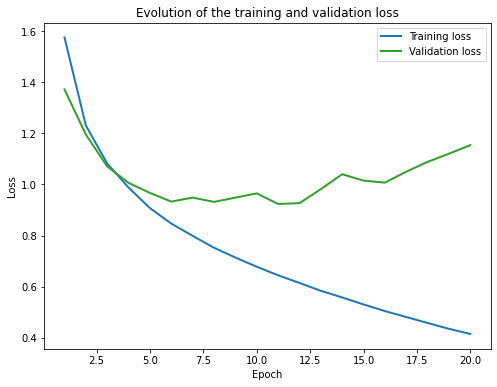

Accuracy of the network on the 40000 train images: 80.56 %
Accuracy of the network on the 10000 validation images: 69.18 %
Accuracy of the network on the 10000 test images: 68.79 %


############################################################ batch_size=16 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.36 took: 1.84s
Epoch 1, 20% 	 train_loss: 2.04 took: 1.68s
Epoch 1, 30% 	 train_loss: 1.98 took: 1.71s
Epoch 1, 40% 	 train_loss: 1.93 took: 1.68s
Epoch 1, 50% 	 train_loss: 1.87 took: 1.73s
Epoch 1, 60% 	 train_loss: 1.84 took: 1.69s
Epoch 1, 70% 	 train_loss: 1.80 took: 1.70s
Epoch 1, 80% 	 train_loss: 1.74 took: 1.66s
Epoch 1, 90% 	 train_loss: 1.73 took: 1.67s
Validation loss = 1.70
Epoch 2, 10% 	 train_loss: 1.67 took: 1.87s
Epoch 2, 20% 	 train_loss: 1.64 took: 1.63s
Epoch 2, 30% 	 train_loss: 1.62 took: 1.64s
Epoch 2, 40% 	 train_loss: 1.59 took: 1.69s
Epoch 2, 50% 	 train_loss: 1.5

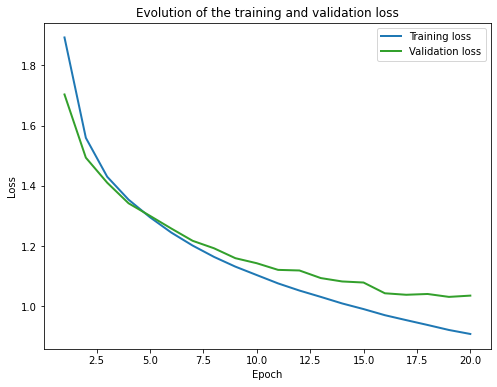

Accuracy of the network on the 40000 train images: 68.73 %
Accuracy of the network on the 10000 validation images: 64.29 %
Accuracy of the network on the 10000 test images: 64.23 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.05 took: 1.84s
Epoch 1, 20% 	 train_loss: 1.68 took: 1.66s
Epoch 1, 30% 	 train_loss: 1.54 took: 1.65s
Epoch 1, 40% 	 train_loss: 1.48 took: 1.67s
Epoch 1, 50% 	 train_loss: 1.43 took: 1.67s
Epoch 1, 60% 	 train_loss: 1.39 took: 1.69s
Epoch 1, 70% 	 train_loss: 1.34 took: 1.73s
Epoch 1, 80% 	 train_loss: 1.33 took: 1.72s
Epoch 1, 90% 	 train_loss: 1.31 took: 1.72s
Validation loss = 1.27
Epoch 2, 10% 	 train_loss: 1.20 took: 1.82s
Epoch 2, 20% 	 train_loss: 1.19 took: 1.68s
Epoch 2, 30% 	 train_loss: 1.19 took: 1.68s
Epoch 2, 40% 	 train_loss: 1.16 took: 1.80s
Epoch 2, 50% 	 train_loss: 1.19 

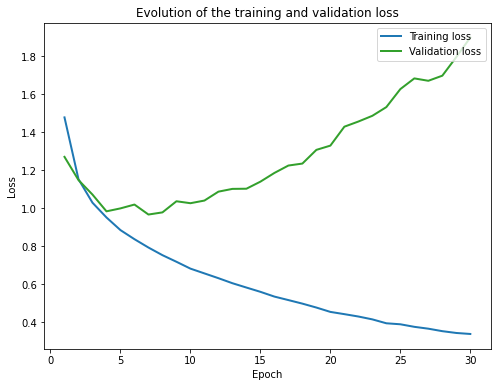

Accuracy of the network on the 40000 train images: 75.28 %
Accuracy of the network on the 10000 validation images: 66.87 %
Accuracy of the network on the 10000 test images: 66.43 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.08 took: 1.83s
Epoch 1, 20% 	 train_loss: 1.75 took: 1.70s
Epoch 1, 30% 	 train_loss: 1.66 took: 1.69s
Epoch 1, 40% 	 train_loss: 1.60 took: 1.66s
Epoch 1, 50% 	 train_loss: 1.51 took: 1.67s
Epoch 1, 60% 	 train_loss: 1.51 took: 1.66s
Epoch 1, 70% 	 train_loss: 1.45 took: 1.70s
Epoch 1, 80% 	 train_loss: 1.41 took: 1.71s
Epoch 1, 90% 	 train_loss: 1.40 took: 1.67s
Validation loss = 1.36
Epoch 2, 10% 	 train_loss: 1.33 took: 1.85s
Epoch 2, 20% 	 train_loss: 1.33 took: 1.67s
Epoch 2, 30% 	 train_loss: 1.27 took: 1.74s
Epoch 2, 40% 	 train_loss: 1.27 took: 1.78s
Epoch 2, 50% 	 train_loss: 1.2

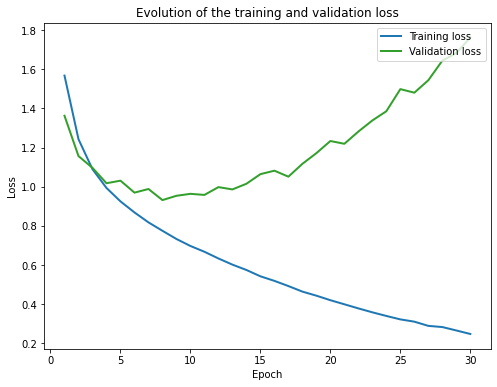

Accuracy of the network on the 40000 train images: 76.11 %
Accuracy of the network on the 10000 validation images: 68.06 %
Accuracy of the network on the 10000 test images: 67.71 %


############################################################ batch_size=16 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 16
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.42 took: 1.83s
Epoch 1, 20% 	 train_loss: 2.05 took: 1.69s
Epoch 1, 30% 	 train_loss: 1.95 took: 1.63s
Epoch 1, 40% 	 train_loss: 1.91 took: 1.71s
Epoch 1, 50% 	 train_loss: 1.85 took: 1.68s
Epoch 1, 60% 	 train_loss: 1.77 took: 1.71s
Epoch 1, 70% 	 train_loss: 1.75 took: 1.71s
Epoch 1, 80% 	 train_loss: 1.72 took: 1.70s
Epoch 1, 90% 	 train_loss: 1.66 took: 1.68s
Validation loss = 1.64
Epoch 2, 10% 	 train_loss: 1.62 took: 1.90s
Epoch 2, 20% 	 train_loss: 1.61 took: 1.71s
Epoch 2, 30% 	 train_loss: 1.58 took: 1.72s
Epoch 2, 40% 	 train_loss: 1.57 took: 1.67s
Epoch 2, 50% 	 train_loss: 1.5

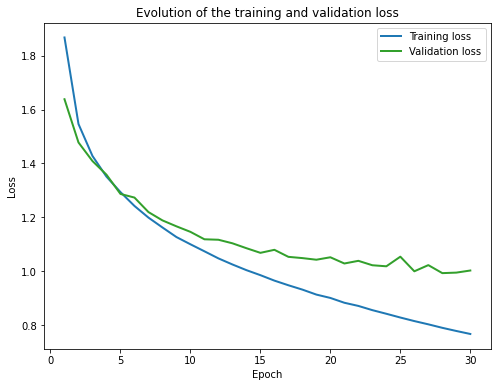

Accuracy of the network on the 40000 train images: 73.83 %
Accuracy of the network on the 10000 validation images: 65.89 %
Accuracy of the network on the 10000 test images: 66.34 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.20 took: 1.47s
Epoch 1, 20% 	 train_loss: 1.88 took: 1.23s
Epoch 1, 30% 	 train_loss: 1.70 took: 1.21s
Epoch 1, 40% 	 train_loss: 1.64 took: 1.23s
Epoch 1, 50% 	 train_loss: 1.53 took: 1.25s
Epoch 1, 60% 	 train_loss: 1.52 took: 1.29s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.21s
Epoch 1, 80% 	 train_loss: 1.42 took: 1.22s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.20s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.32 took: 1.41s
Epoch 2, 20% 	 train_loss: 1.31 took: 1.21s
Epoch 2, 30% 	 train_loss: 1.29 took: 1.19s
Epoch 2, 40% 	 train_loss: 1.27 took: 1.18s
Epoch 2, 50% 	 train_loss: 1.27 

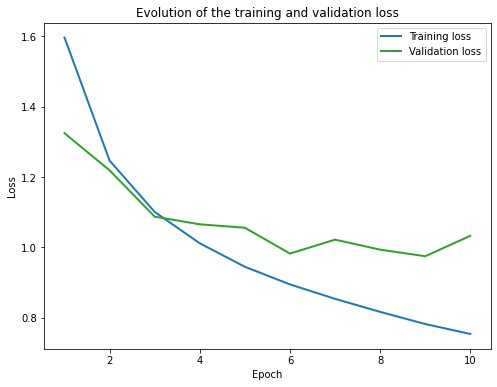

Accuracy of the network on the 40000 train images: 74.29 %
Accuracy of the network on the 10000 validation images: 66.52 %
Accuracy of the network on the 10000 test images: 65.96 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.22 took: 1.41s
Epoch 1, 20% 	 train_loss: 1.88 took: 1.19s
Epoch 1, 30% 	 train_loss: 1.75 took: 1.19s
Epoch 1, 40% 	 train_loss: 1.70 took: 1.14s
Epoch 1, 50% 	 train_loss: 1.62 took: 1.17s
Epoch 1, 60% 	 train_loss: 1.57 took: 1.22s
Epoch 1, 70% 	 train_loss: 1.53 took: 1.18s
Epoch 1, 80% 	 train_loss: 1.48 took: 1.18s
Epoch 1, 90% 	 train_loss: 1.47 took: 1.18s
Validation loss = 1.44
Epoch 2, 10% 	 train_loss: 1.41 took: 1.37s
Epoch 2, 20% 	 train_loss: 1.39 took: 1.16s
Epoch 2, 30% 	 train_loss: 1.37 took: 1.16s
Epoch 2, 40% 	 train_loss: 1.33 took: 1.17s
Epoch 2, 50% 	 train_loss: 1.3

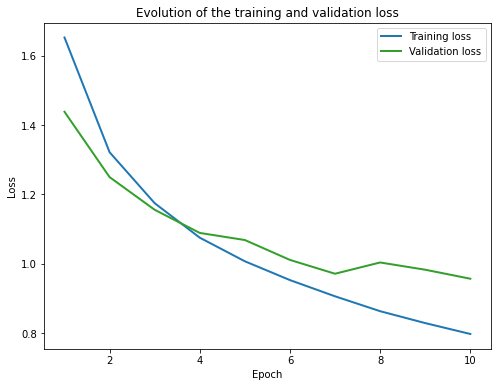

Accuracy of the network on the 10000 validation images: 66.98 %
Accuracy of the network on the 10000 test images: 66.40 %


############################################################ batch_size=32 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.55 took: 1.35s
Epoch 1, 20% 	 train_loss: 2.12 took: 1.14s
Epoch 1, 30% 	 train_loss: 1.99 took: 1.14s
Epoch 1, 40% 	 train_loss: 1.95 took: 1.16s
Epoch 1, 50% 	 train_loss: 1.90 took: 1.17s
Epoch 1, 60% 	 train_loss: 1.87 took: 1.20s
Epoch 1, 70% 	 train_loss: 1.85 took: 1.22s
Epoch 1, 80% 	 train_loss: 1.79 took: 1.17s
Epoch 1, 90% 	 train_loss: 1.77 took: 1.18s
Validation loss = 1.71
Epoch 2, 10% 	 train_loss: 1.70 took: 1.36s
Epoch 2, 20% 	 train_loss: 1.69 took: 1.17s
Epoch 2, 30% 	 train_loss: 1.64 took: 1.16s
Epoch 2, 40% 	 train_loss: 1.66 took: 1.19s
Epoch 2, 50% 	 train_loss: 1.62 took: 1.18s
Epoch 2, 60% 	 train_loss: 1.61 took: 1.16s
E

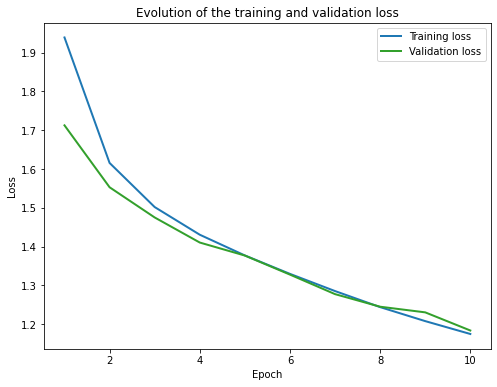

Accuracy of the network on the 40000 train images: 60.23 %
Accuracy of the network on the 10000 validation images: 59.20 %
Accuracy of the network on the 10000 test images: 58.00 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.13 took: 1.37s
Epoch 1, 20% 	 train_loss: 1.74 took: 1.17s
Epoch 1, 30% 	 train_loss: 1.64 took: 1.19s
Epoch 1, 40% 	 train_loss: 1.56 took: 1.19s
Epoch 1, 50% 	 train_loss: 1.47 took: 1.23s
Epoch 1, 60% 	 train_loss: 1.42 took: 1.22s
Epoch 1, 70% 	 train_loss: 1.42 took: 1.23s
Epoch 1, 80% 	 train_loss: 1.40 took: 1.22s
Epoch 1, 90% 	 train_loss: 1.38 took: 1.21s
Validation loss = 1.32
Epoch 2, 10% 	 train_loss: 1.28 took: 1.37s
Epoch 2, 20% 	 train_loss: 1.29 took: 1.22s
Epoch 2, 30% 	 train_loss: 1.25 took: 1.22s
Epoch 2, 40% 	 train_loss: 1.23 took: 1.18s
Epoch 2, 50% 	 train_loss: 1.24 

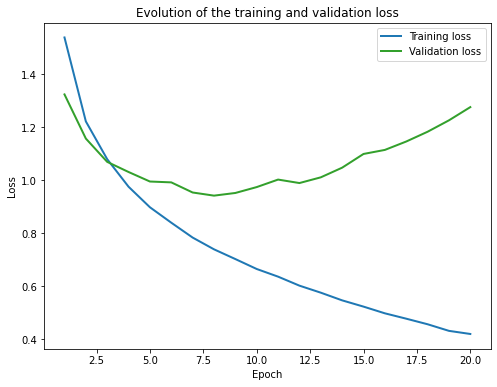

Accuracy of the network on the 40000 train images: 77.09 %
Accuracy of the network on the 10000 validation images: 68.03 %
Accuracy of the network on the 10000 test images: 67.97 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.28 took: 1.35s
Epoch 1, 20% 	 train_loss: 1.93 took: 1.14s
Epoch 1, 30% 	 train_loss: 1.79 took: 1.15s
Epoch 1, 40% 	 train_loss: 1.70 took: 1.15s
Epoch 1, 50% 	 train_loss: 1.64 took: 1.19s
Epoch 1, 60% 	 train_loss: 1.56 took: 1.19s
Epoch 1, 70% 	 train_loss: 1.54 took: 1.19s
Epoch 1, 80% 	 train_loss: 1.50 took: 1.18s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.19s
Validation loss = 1.43
Epoch 2, 10% 	 train_loss: 1.40 took: 1.39s
Epoch 2, 20% 	 train_loss: 1.40 took: 1.17s
Epoch 2, 30% 	 train_loss: 1.38 took: 1.17s
Epoch 2, 40% 	 train_loss: 1.42 took: 1.15s
Epoch 2, 50% 	 train_loss: 1.3

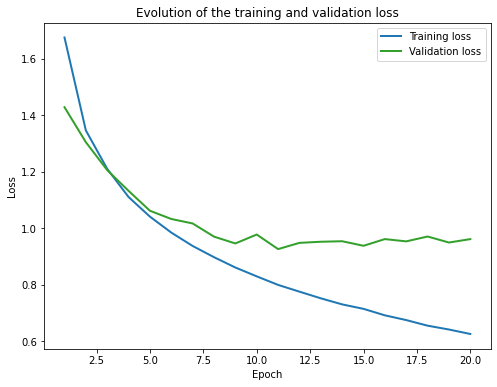

Accuracy of the network on the 40000 train images: 74.44 %
Accuracy of the network on the 10000 validation images: 68.30 %
Accuracy of the network on the 10000 test images: 68.06 %


############################################################ batch_size=32 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.57 took: 1.40s
Epoch 1, 20% 	 train_loss: 2.13 took: 1.20s
Epoch 1, 30% 	 train_loss: 2.05 took: 1.19s
Epoch 1, 40% 	 train_loss: 1.98 took: 1.18s
Epoch 1, 50% 	 train_loss: 1.91 took: 1.19s
Epoch 1, 60% 	 train_loss: 1.87 took: 1.20s
Epoch 1, 70% 	 train_loss: 1.86 took: 1.18s
Epoch 1, 80% 	 train_loss: 1.81 took: 1.19s
Epoch 1, 90% 	 train_loss: 1.79 took: 1.20s
Validation loss = 1.73
Epoch 2, 10% 	 train_loss: 1.74 took: 1.40s
Epoch 2, 20% 	 train_loss: 1.68 took: 1.19s
Epoch 2, 30% 	 train_loss: 1.70 took: 1.20s
Epoch 2, 40% 	 train_loss: 1.65 took: 1.19s
Epoch 2, 50% 	 train_loss: 1.6

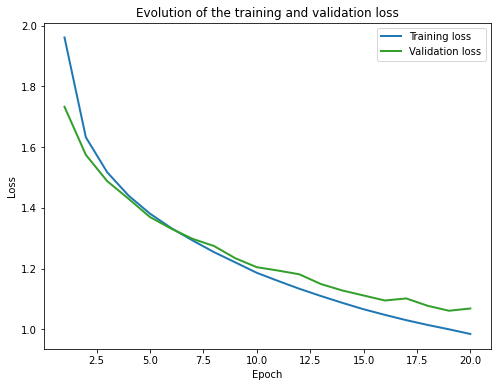

Accuracy of the network on the 40000 train images: 65.86 %
Accuracy of the network on the 10000 validation images: 62.65 %
Accuracy of the network on the 10000 test images: 62.96 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.09 took: 1.37s
Epoch 1, 20% 	 train_loss: 1.72 took: 1.17s
Epoch 1, 30% 	 train_loss: 1.62 took: 1.20s
Epoch 1, 40% 	 train_loss: 1.53 took: 1.16s
Epoch 1, 50% 	 train_loss: 1.49 took: 1.19s
Epoch 1, 60% 	 train_loss: 1.45 took: 1.19s
Epoch 1, 70% 	 train_loss: 1.39 took: 1.21s
Epoch 1, 80% 	 train_loss: 1.38 took: 1.19s
Epoch 1, 90% 	 train_loss: 1.39 took: 1.19s
Validation loss = 1.31
Epoch 2, 10% 	 train_loss: 1.29 took: 1.37s
Epoch 2, 20% 	 train_loss: 1.27 took: 1.18s
Epoch 2, 30% 	 train_loss: 1.27 took: 1.19s
Epoch 2, 40% 	 train_loss: 1.22 took: 1.18s
Epoch 2, 50% 	 train_loss: 1.22 

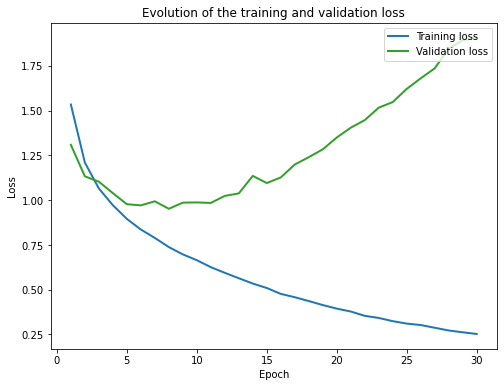

Accuracy of the network on the 40000 train images: 76.99 %
Accuracy of the network on the 10000 validation images: 67.46 %
Accuracy of the network on the 10000 test images: 67.20 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.19 took: 1.36s
Epoch 1, 20% 	 train_loss: 1.89 took: 1.18s
Epoch 1, 30% 	 train_loss: 1.78 took: 1.22s
Epoch 1, 40% 	 train_loss: 1.69 took: 1.21s
Epoch 1, 50% 	 train_loss: 1.64 took: 1.19s
Epoch 1, 60% 	 train_loss: 1.56 took: 1.23s
Epoch 1, 70% 	 train_loss: 1.55 took: 1.18s
Epoch 1, 80% 	 train_loss: 1.52 took: 1.19s
Epoch 1, 90% 	 train_loss: 1.45 took: 1.20s
Validation loss = 1.44
Epoch 2, 10% 	 train_loss: 1.41 took: 1.37s
Epoch 2, 20% 	 train_loss: 1.37 took: 1.18s
Epoch 2, 30% 	 train_loss: 1.39 took: 1.18s
Epoch 2, 40% 	 train_loss: 1.34 took: 1.19s
Epoch 2, 50% 	 train_loss: 1.3

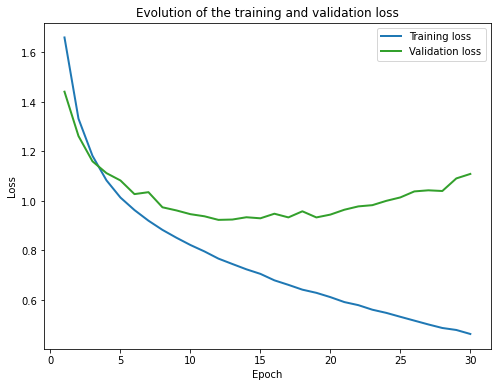

Accuracy of the network on the 40000 train images: 75.49 %
Accuracy of the network on the 10000 validation images: 68.30 %
Accuracy of the network on the 10000 test images: 68.28 %


############################################################ batch_size=32 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 32
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.59 took: 1.38s
Epoch 1, 20% 	 train_loss: 2.11 took: 1.20s
Epoch 1, 30% 	 train_loss: 2.03 took: 1.15s
Epoch 1, 40% 	 train_loss: 1.95 took: 1.17s
Epoch 1, 50% 	 train_loss: 1.92 took: 1.19s
Epoch 1, 60% 	 train_loss: 1.89 took: 1.20s
Epoch 1, 70% 	 train_loss: 1.83 took: 1.19s
Epoch 1, 80% 	 train_loss: 1.83 took: 1.16s
Epoch 1, 90% 	 train_loss: 1.80 took: 1.19s
Validation loss = 1.74
Epoch 2, 10% 	 train_loss: 1.73 took: 1.36s
Epoch 2, 20% 	 train_loss: 1.70 took: 1.17s
Epoch 2, 30% 	 train_loss: 1.70 took: 1.19s
Epoch 2, 40% 	 train_loss: 1.67 took: 1.18s
Epoch 2, 50% 	 train_loss: 1.6

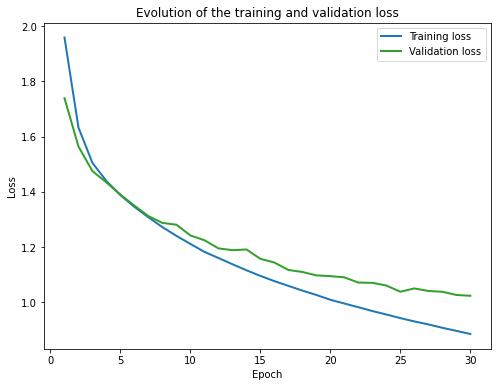

Accuracy of the network on the 40000 train images: 70.30 %
Accuracy of the network on the 10000 validation images: 64.71 %
Accuracy of the network on the 10000 test images: 64.60 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.19 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.85 took: 1.00s
Epoch 1, 30% 	 train_loss: 1.70 took: 1.00s
Epoch 1, 40% 	 train_loss: 1.59 took: 0.99s
Epoch 1, 50% 	 train_loss: 1.55 took: 0.99s
Epoch 1, 60% 	 train_loss: 1.47 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.46 took: 1.01s
Epoch 1, 80% 	 train_loss: 1.41 took: 1.00s
Epoch 1, 90% 	 train_loss: 1.40 took: 1.00s
Validation loss = 1.38
Epoch 2, 10% 	 train_loss: 1.33 took: 1.21s
Epoch 2, 20% 	 train_loss: 1.30 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.24 took: 1.03s
Epoch 2, 40% 	 train_loss: 1.27 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.28 

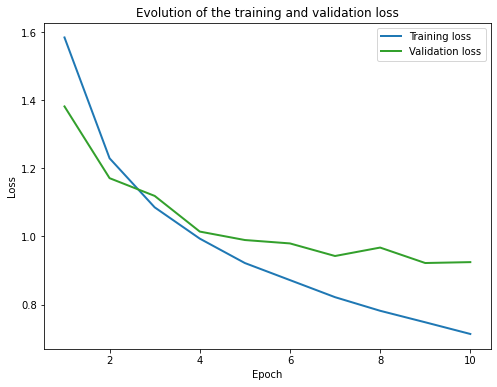

Accuracy of the network on the 40000 train images: 76.94 %
Accuracy of the network on the 10000 validation images: 68.78 %
Accuracy of the network on the 10000 test images: 68.32 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.31 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.95 took: 1.00s
Epoch 1, 30% 	 train_loss: 1.82 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.72 took: 1.00s
Epoch 1, 50% 	 train_loss: 1.66 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.61 took: 1.00s
Epoch 1, 70% 	 train_loss: 1.56 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.53 took: 1.03s
Epoch 1, 90% 	 train_loss: 1.53 took: 0.99s
Validation loss = 1.48
Epoch 2, 10% 	 train_loss: 1.47 took: 1.26s
Epoch 2, 20% 	 train_loss: 1.42 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.45 took: 1.01s
Epoch 2, 40% 	 train_loss: 1.41 took: 1.00s
Epoch 2, 50% 	 train_loss: 1.4

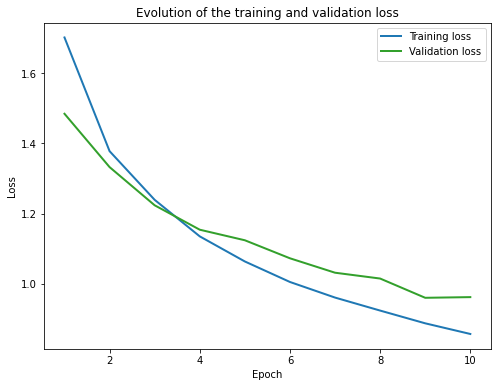

Accuracy of the network on the 40000 train images: 71.20 %
Accuracy of the network on the 10000 validation images: 66.49 %
Accuracy of the network on the 10000 test images: 66.45 %


############################################################ batch_size=48 || n_epochs=10 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 10
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.72 took: 1.23s
Epoch 1, 20% 	 train_loss: 2.21 took: 1.00s
Epoch 1, 30% 	 train_loss: 2.08 took: 1.05s
Epoch 1, 40% 	 train_loss: 2.00 took: 1.01s
Epoch 1, 50% 	 train_loss: 1.95 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.92 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.89 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.86 took: 1.03s
Epoch 1, 90% 	 train_loss: 1.87 took: 1.02s
Validation loss = 1.79
Epoch 2, 10% 	 train_loss: 1.80 took: 1.26s
Epoch 2, 20% 	 train_loss: 1.79 took: 1.03s
Epoch 2, 30% 	 train_loss: 1.74 took: 1.03s
Epoch 2, 40% 	 train_loss: 1.76 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.7

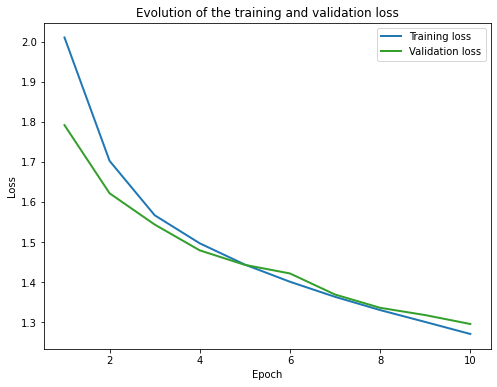

Accuracy of the network on the 40000 train images: 56.00 %
Accuracy of the network on the 10000 validation images: 54.42 %
Accuracy of the network on the 10000 test images: 54.67 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.19 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.82 took: 1.04s
Epoch 1, 30% 	 train_loss: 1.67 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.58 took: 1.03s
Epoch 1, 50% 	 train_loss: 1.53 took: 1.04s
Epoch 1, 60% 	 train_loss: 1.51 took: 1.06s
Epoch 1, 70% 	 train_loss: 1.43 took: 1.04s
Epoch 1, 80% 	 train_loss: 1.39 took: 1.02s
Epoch 1, 90% 	 train_loss: 1.38 took: 1.04s
Validation loss = 1.34
Epoch 2, 10% 	 train_loss: 1.32 took: 1.26s
Epoch 2, 20% 	 train_loss: 1.28 took: 1.04s
Epoch 2, 30% 	 train_loss: 1.28 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.28 took: 1.06s
Epoch 2, 50% 	 train_loss: 1.24 

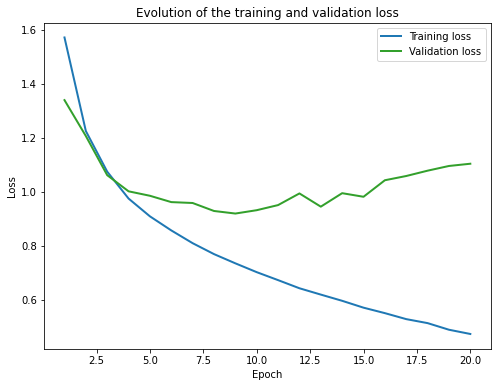

Accuracy of the network on the 40000 train images: 76.92 %
Accuracy of the network on the 10000 validation images: 69.03 %
Accuracy of the network on the 10000 test images: 68.42 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.25 took: 1.27s
Epoch 1, 20% 	 train_loss: 1.91 took: 1.02s
Epoch 1, 30% 	 train_loss: 1.80 took: 1.03s
Epoch 1, 40% 	 train_loss: 1.69 took: 1.05s
Epoch 1, 50% 	 train_loss: 1.63 took: 1.01s
Epoch 1, 60% 	 train_loss: 1.59 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.56 took: 1.03s
Epoch 1, 80% 	 train_loss: 1.49 took: 1.01s
Epoch 1, 90% 	 train_loss: 1.46 took: 1.04s
Validation loss = 1.42
Epoch 2, 10% 	 train_loss: 1.42 took: 1.24s
Epoch 2, 20% 	 train_loss: 1.44 took: 1.06s
Epoch 2, 30% 	 train_loss: 1.39 took: 1.02s
Epoch 2, 40% 	 train_loss: 1.34 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.3

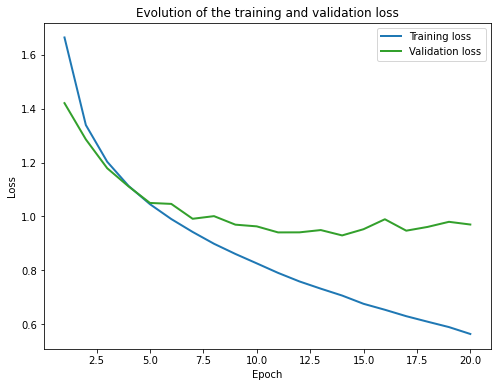

Accuracy of the network on the 40000 train images: 77.23 %
Accuracy of the network on the 10000 validation images: 68.59 %
Accuracy of the network on the 10000 test images: 68.39 %


############################################################ batch_size=48 || n_epochs=20 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 20
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.72 took: 1.24s
Epoch 1, 20% 	 train_loss: 2.24 took: 1.02s
Epoch 1, 30% 	 train_loss: 2.12 took: 1.03s
Epoch 1, 40% 	 train_loss: 2.04 took: 1.00s
Epoch 1, 50% 	 train_loss: 1.97 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.90 took: 1.03s
Epoch 1, 70% 	 train_loss: 1.86 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.87 took: 1.03s
Epoch 1, 90% 	 train_loss: 1.81 took: 1.01s
Validation loss = 1.78
Epoch 2, 10% 	 train_loss: 1.78 took: 1.24s
Epoch 2, 20% 	 train_loss: 1.72 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.72 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.72 took: 1.01s
Epoch 2, 50% 	 train_loss: 1.7

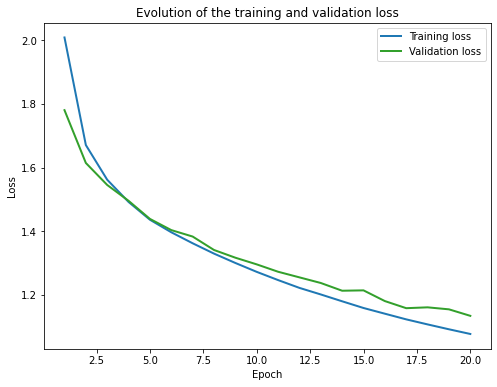

Accuracy of the network on the 40000 train images: 63.26 %
Accuracy of the network on the 10000 validation images: 60.54 %
Accuracy of the network on the 10000 test images: 60.38 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.001
Epoch 1, 10% 	 train_loss: 2.18 took: 1.26s
Epoch 1, 20% 	 train_loss: 1.83 took: 1.00s
Epoch 1, 30% 	 train_loss: 1.67 took: 1.04s
Epoch 1, 40% 	 train_loss: 1.58 took: 1.03s
Epoch 1, 50% 	 train_loss: 1.57 took: 1.03s
Epoch 1, 60% 	 train_loss: 1.53 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.47 took: 1.02s
Epoch 1, 80% 	 train_loss: 1.43 took: 1.03s
Epoch 1, 90% 	 train_loss: 1.40 took: 1.07s
Validation loss = 1.37
Epoch 2, 10% 	 train_loss: 1.31 took: 1.27s
Epoch 2, 20% 	 train_loss: 1.33 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.32 took: 1.05s
Epoch 2, 40% 	 train_loss: 1.28 took: 1.03s
Epoch 2, 50% 	 train_loss: 1.28 

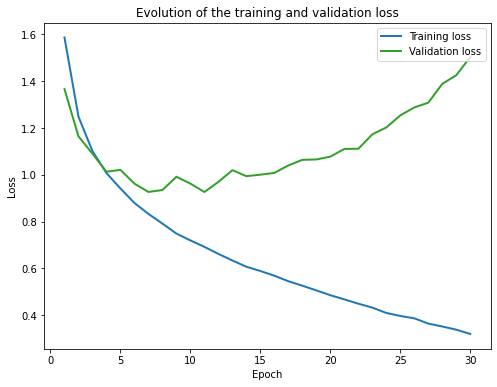

Accuracy of the network on the 40000 train images: 78.67 %
Accuracy of the network on the 10000 validation images: 68.36 %
Accuracy of the network on the 10000 test images: 68.65 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0005
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0005
Epoch 1, 10% 	 train_loss: 2.30 took: 1.23s
Epoch 1, 20% 	 train_loss: 1.98 took: 0.99s
Epoch 1, 30% 	 train_loss: 1.79 took: 0.99s
Epoch 1, 40% 	 train_loss: 1.70 took: 1.05s
Epoch 1, 50% 	 train_loss: 1.66 took: 1.00s
Epoch 1, 60% 	 train_loss: 1.57 took: 1.00s
Epoch 1, 70% 	 train_loss: 1.54 took: 1.00s
Epoch 1, 80% 	 train_loss: 1.57 took: 1.02s
Epoch 1, 90% 	 train_loss: 1.51 took: 1.02s
Validation loss = 1.46
Epoch 2, 10% 	 train_loss: 1.45 took: 1.21s
Epoch 2, 20% 	 train_loss: 1.46 took: 1.01s
Epoch 2, 30% 	 train_loss: 1.42 took: 1.04s
Epoch 2, 40% 	 train_loss: 1.35 took: 1.02s
Epoch 2, 50% 	 train_loss: 1.3

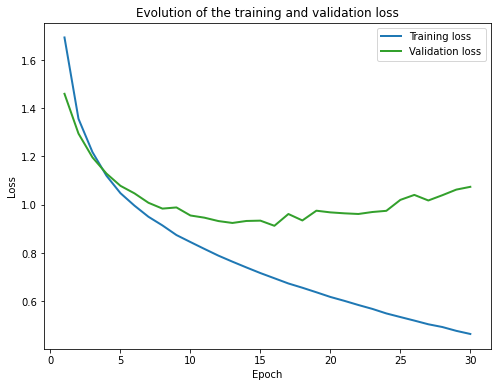

Accuracy of the network on the 40000 train images: 77.95 %
Accuracy of the network on the 10000 validation images: 69.02 %
Accuracy of the network on the 10000 test images: 68.37 %


############################################################ batch_size=48 || n_epochs=30 || learning_rate=0.0001
===== HYPERPARAMETERS =====
batch_size= 48
n_epochs= 30
learning_rate= 0.0001
Epoch 1, 10% 	 train_loss: 2.68 took: 1.22s
Epoch 1, 20% 	 train_loss: 2.21 took: 0.99s
Epoch 1, 30% 	 train_loss: 2.11 took: 1.01s
Epoch 1, 40% 	 train_loss: 2.04 took: 1.03s
Epoch 1, 50% 	 train_loss: 1.97 took: 0.98s
Epoch 1, 60% 	 train_loss: 1.92 took: 1.01s
Epoch 1, 70% 	 train_loss: 1.92 took: 0.97s
Epoch 1, 80% 	 train_loss: 1.89 took: 0.98s
Epoch 1, 90% 	 train_loss: 1.90 took: 1.00s
Validation loss = 1.82
Epoch 2, 10% 	 train_loss: 1.83 took: 1.22s
Epoch 2, 20% 	 train_loss: 1.80 took: 1.00s
Epoch 2, 30% 	 train_loss: 1.79 took: 1.02s
Epoch 2, 40% 	 train_loss: 1.78 took: 1.00s
Epoch 2, 50% 	 train_loss: 1.7

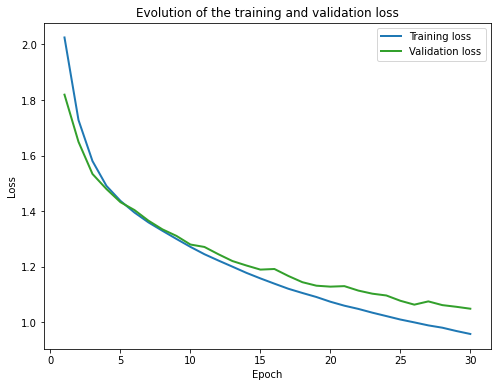

Accuracy of the network on the 40000 train images: 67.47 %
Accuracy of the network on the 10000 validation images: 63.80 %
Accuracy of the network on the 10000 test images: 63.69 %


In [ ]:
batch_size_param = [16,32,48]
n_epochs_param = [10,20,30]
learning_rate_param = [0.001,0.0005,0.0001]

for batch_size in batch_size_param:
  for n_epochs in n_epochs_param:
    for learning_rate in learning_rate_param:
      print('\n\n############################################################ batch_size={} || n_epochs={} || learning_rate={}'.format(batch_size, n_epochs,learning_rate))
      net = MyConvolutionalNetwork2()
      train_history, val_history = train(net, batch_size=batch_size, n_epochs=n_epochs, learning_rate=learning_rate)
      plot_losses(train_history, val_history)
      compute_accuracy(net)


**In this set of test, we've got the best score 68,79% on the test dataset with the hyperparameter configuration of "*batch_size=16*, *n_epochs=20*, *learning_rate=0.0005*", and with the same configuration, the best validation score 69,18% is obtained**

**The following illustrates the loss evolution curves when training the best scoring model**

Text(0.5, 1.0, 'Evolution of the training and validation loss')

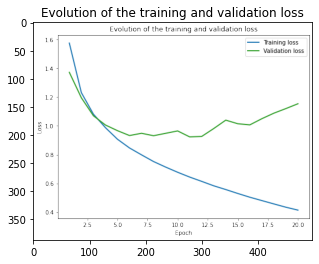

In [ ]:
# im=plt.imread('double convolutional layer #2.png') 
# plt.imshow(im)
# plt.title('Evolution of the training and validation loss')

<font size=5> **The best scoring result among all experiences is 68,79% on the test dataset, obtained with training configuration : "*batch_size=16*, *n_epochs=20*, *learning_rate=0.0005*" on a double layer machine**</font>